In [1]:
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer
from sklearn import preprocessing


#read in the file using pandas an encoding of ISO-8859-1
df = pd.read_csv("https://raw.githubusercontent.com/ggotoo/Artificial-Intelligence/main/AI_Condensed_Data_Useful_Data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QKEY              10260 non-null  float64
 1   TECH1_W99         5153 non-null   object 
 2   CNCEXC_W99        10260 non-null  object 
 3   EXCITEOE_W99_OE1  1853 non-null   object 
 4   EXCITEOE_W99_OE2  337 non-null    object 
 5   EXCITEOE_W99_OE3  59 non-null     object 
 6   ALGFAIR_W99       10260 non-null  object 
 7   DISCRIM1_a_W99    10260 non-null  object 
 8   DISCRIM1_b_W99    10260 non-null  object 
 9   DISCRIM1_c_W99    10260 non-null  object 
 10  DISCRIM1_d_W99    10260 non-null  object 
 11  DISCRIM1_e_W99    10260 non-null  object 
 12  DISCRIM1_f_W99    10260 non-null  object 
 13  F_AGECAT          10260 non-null  object 
 14  F_GENDER          10260 non-null  object 
 15  F_EDUCCAT2        10260 non-null  object 
 16  F_RACETHNMOD      10260 non-null  object

In [3]:
#Check to see if there are any missing values
df.isnull().sum()/100

QKEY                  0.00
TECH1_W99            51.07
CNCEXC_W99            0.00
EXCITEOE_W99_OE1     84.07
EXCITEOE_W99_OE2     99.23
EXCITEOE_W99_OE3    102.01
ALGFAIR_W99           0.00
DISCRIM1_a_W99        0.00
DISCRIM1_b_W99        0.00
DISCRIM1_c_W99        0.00
DISCRIM1_d_W99        0.00
DISCRIM1_e_W99        0.00
DISCRIM1_f_W99        0.00
F_AGECAT              0.00
F_GENDER              0.00
F_EDUCCAT2            0.00
F_RACETHNMOD          0.00
F_CITIZEN             0.00
DCARS1_W99           51.07
DCARS2_W99           51.07
DCARS3_W99           51.07
DCARS4_a_W99         51.07
DCARS4_b_W99         51.07
DCARS4_c_W99         51.07
DCARS4_d_W99         51.07
DCARS5_W99           51.07
DCARS6_W99           51.07
DCARS7_W99           51.07
DCARS8_a_W99         51.07
DCARS8_b_W99         51.07
DCARS8_c_W99         51.07
DCARS8_d_W99         51.07
DCARS9_W99           51.07
DCARS10_W99          51.07
DCARS11_a_W99        51.07
DCARS11_b_W99        51.07
DCARS11_c_W99        51.07
D

In [4]:
threshold = len(df) * 0.05
threshold

513.0

In [5]:
cols_to_drop = df.columns[df.isna().sum() <= threshold]
cols_to_drop

Index(['QKEY', 'CNCEXC_W99', 'ALGFAIR_W99', 'DISCRIM1_a_W99', 'DISCRIM1_b_W99',
       'DISCRIM1_c_W99', 'DISCRIM1_d_W99', 'DISCRIM1_e_W99', 'DISCRIM1_f_W99',
       'F_AGECAT', 'F_GENDER', 'F_EDUCCAT2', 'F_RACETHNMOD', 'F_CITIZEN',
       'F_MARITAL', 'F_RELIG', 'F_PARTY_FINAL', 'F_REG', 'F_INC_TIER2'],
      dtype='object')

In [6]:
df.dropna(subset=cols_to_drop, inplace=True)

In [7]:
cols_with_missing_values = df.columns[df.isna().sum() > 0]
print(cols_with_missing_values)

Index(['TECH1_W99', 'EXCITEOE_W99_OE1', 'EXCITEOE_W99_OE2', 'EXCITEOE_W99_OE3',
       'DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99',
       'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99',
       'DCARS6_W99', 'DCARS7_W99', 'DCARS8_a_W99', 'DCARS8_b_W99',
       'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99', 'DCARS10_W99',
       'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99',
       'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99',
       'DCARS13_d_W99'],
      dtype='object')


In [8]:
df.isna().sum()/100

QKEY                 0.00
TECH1_W99           48.93
CNCEXC_W99           0.00
EXCITEOE_W99_OE1    81.51
EXCITEOE_W99_OE2    95.39
EXCITEOE_W99_OE3    98.08
ALGFAIR_W99          0.00
DISCRIM1_a_W99       0.00
DISCRIM1_b_W99       0.00
DISCRIM1_c_W99       0.00
DISCRIM1_d_W99       0.00
DISCRIM1_e_W99       0.00
DISCRIM1_f_W99       0.00
F_AGECAT             0.00
F_GENDER             0.00
F_EDUCCAT2           0.00
F_RACETHNMOD         0.00
F_CITIZEN            0.00
DCARS1_W99          48.93
DCARS2_W99          48.93
DCARS3_W99          48.93
DCARS4_a_W99        48.93
DCARS4_b_W99        48.93
DCARS4_c_W99        48.93
DCARS4_d_W99        48.93
DCARS5_W99          48.93
DCARS6_W99          48.93
DCARS7_W99          48.93
DCARS8_a_W99        48.93
DCARS8_b_W99        48.93
DCARS8_c_W99        48.93
DCARS8_d_W99        48.93
DCARS9_W99          48.93
DCARS10_W99         48.93
DCARS11_a_W99       48.93
DCARS11_b_W99       48.93
DCARS11_c_W99       48.93
DCARS11_d_W99       48.93
DCARS12_W99 

In [9]:
imputer = SimpleImputer (strategy='most_frequent')
imputer.fit_transform(df)

array([[100260.0, 'Mostly positive', 'Equally concerned and excited',
        ..., 'Republican',
        'You are ABSOLUTELY CERTAIN that you are registered to vote at your current address',
        'Middle income'],
       [100314.0, 'Mostly positive', 'More excited than concerned', ...,
        'Republican',
        'You are ABSOLUTELY CERTAIN that you are registered to vote at your current address',
        'Middle income'],
       [100363.0, 'Mostly positive', 'Equally concerned and excited',
        ..., 'Democrat',
        'You are ABSOLUTELY CERTAIN that you are registered to vote at your current address',
        'Upper income'],
       ...,
       [202000000000.0, 'Mostly positive', 'More concerned than excited',
        ..., 'Independent',
        'You are ABSOLUTELY CERTAIN that you are registered to vote at your current address',
        'Lower income'],
       [202000000000.0, 'Mostly positive', 'More excited than concerned',
        ..., 'Republican',
        'You are ABS

In [10]:
#The above dendogram shows that the columns correlated with each other are EXCITOE_ columns which I will merge together. The Discrim variable's missing variables are not correlated  with each other and so I will not merge them but rather analyse them separately.
#first I will inspect the three columns to see if they can be merged together
#columns_to_inspect = ['EXCITEOE_W99_OE3', 'EXCITEOE_W99_OE2', 'EXCITEOE_W99_OE1']

#print("First few rows of the columns to inspect:")
#print(df[columns_to_inspect].head())

#print("Information about the columns:")
#print(df[columns_to_inspect].info())

# Check for unique values in each column
#for column in columns_to_inspect:
#    print(f"Unique values in {column}:")
#    print(df[column].unique())

# Check for missing values in each column
#print("Missing values in each column:")
#print(df[columns_to_inspect].isnull().sum())

# Check if merging the columns can help fill in the gaps
#merged_column = df[columns_to_inspect].bfill(axis=1).iloc[:, 0]
#print("Merged column with backfill (first few rows):")
#print(merged_column.head())

# Merge the columns using backfill (or forward fill if appropriate)
#df['Merged_EXCITOE_W99'] = df[columns_to_inspect].bfill(axis=1).iloc[:, 0]

# Display the merged column
#print("First few rows of the merged column:")
#print(df[['Merged_EXCITOE_W99']].head())

In [11]:
df_dropped = df.drop(columns=["EXCITEOE_W99_OE1","EXCITEOE_W99_OE2","EXCITEOE_W99_OE3"])

In [12]:
df_dropped.head()

QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0              NaN  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0              NaN  Equally concerned and excited  Not possible   
4  100637.0              NaN  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ...           DCARS12_W99 DCARS13_a_W99 DCARS13_b_W99  \
0       Not sure  ...                   NaN           NaN           NaN   
1      Very well  ...  Somewhat comfortable      Not sure        Oppose   
2  Somewhat well  ...      Very comfortable         Favor      Not sure   
3       Not sure  ...                   NaN           NaN           NaN   
4       Not sure  ...                   NaN           NaN           NaN   

  DCARS13_c_W99 DCARS13_d_W99           F_MARITAL                F_RELIG  \
0           NaN           NaN  Never been married  Nothing in particular   
1         Favor         Favor            Divorced             Protestant   
2         Favor         Favor             Married         Roman Catholic   
3           NaN           NaN             Married             Protestant   
4           NaN           NaN             Married             Protestant   

  F_PARTY_FINAL                                              F_REG  \
0    Republican  You are ABSOLUTELY CERTAIN that you are regist...   
1    Republican  You are ABSOLUTELY CERTAIN that you are regist...   
2      Democrat  You are ABSOLUTELY CERTAIN that you are regist...   
3    Republican  You are ABSOLUTELY CERTAIN that you are regist...   
4   Independent  You are ABSOLUTELY CERTAIN that you are regist...   

     F_INC_TIER2  
0  Middle income  
1  Middle income  
2   Upper income  
3   Upper income  
4   Lower income  

[5 rows x 45 columns]

In [13]:
df_dropped["F_MARITAL"].unique()

array(['Never been married', 'Divorced', 'Married', 'Widowed',
       'Living with a partner', 'Separated', 'Refused'], dtype=object)

In [14]:
df_dropped.isna().sum()/100

QKEY               0.00
TECH1_W99         48.93
CNCEXC_W99         0.00
ALGFAIR_W99        0.00
DISCRIM1_a_W99     0.00
DISCRIM1_b_W99     0.00
DISCRIM1_c_W99     0.00
DISCRIM1_d_W99     0.00
DISCRIM1_e_W99     0.00
DISCRIM1_f_W99     0.00
F_AGECAT           0.00
F_GENDER           0.00
F_EDUCCAT2         0.00
F_RACETHNMOD       0.00
F_CITIZEN          0.00
DCARS1_W99        48.93
DCARS2_W99        48.93
DCARS3_W99        48.93
DCARS4_a_W99      48.93
DCARS4_b_W99      48.93
DCARS4_c_W99      48.93
DCARS4_d_W99      48.93
DCARS5_W99        48.93
DCARS6_W99        48.93
DCARS7_W99        48.93
DCARS8_a_W99      48.93
DCARS8_b_W99      48.93
DCARS8_c_W99      48.93
DCARS8_d_W99      48.93
DCARS9_W99        48.93
DCARS10_W99       48.93
DCARS11_a_W99     48.93
DCARS11_b_W99     48.93
DCARS11_c_W99     48.93
DCARS11_d_W99     48.93
DCARS12_W99       48.93
DCARS13_a_W99     48.93
DCARS13_b_W99     48.93
DCARS13_c_W99     48.93
DCARS13_d_W99     48.93
F_MARITAL          0.00
F_RELIG         

In [15]:
columns_to_impute = [
    'TECH1_W99','DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99', 'DCARS4_b_W99',
    'DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99',
    'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99',
    'DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99',
    'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99'
]

# Initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the specified columns
df_dropped[columns_to_impute] = imputer.fit_transform(df_dropped[columns_to_impute])

# Save the cleaned dataset
df_dropped.to_csv('https://raw.githubusercontent.com/ggotoo/Artificial-Intelligence/main/AI_Condensed_Data_Useful_Data.csv', index=False)

# Optional: Display the first few rows of the updated dataframe
df_dropped.head()

QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0  Mostly positive  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0  Mostly positive  Equally concerned and excited  Not possible   
4  100637.0  Mostly positive  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ...           DCARS12_W99 DCARS13_a_W99 DCARS13_b_W99  \
0       Not sure  ...  Somewhat comfortable         Favor        Oppose   
1      Very well  ...  Somewhat comfortable      Not sure        Oppose   
2  Somewhat well  ...      Very comfortable         Favor      Not sure   
3       Not sure  ...  Somewhat comfortable         Favor        Oppose   
4       Not sure  ...  Somewhat comfortable         Favor        Oppose   

  DCARS13_c_W99 DCARS13_d_W99           F_MARITAL                F_RELIG  \
0        Oppose         Favor  Never been married  Nothing in particular   
1         Favor         Favor            Divorced             Protestant   
2         Favor         Favor             Married         Roman Catholic   
3        Oppose         Favor             Married             Protestant   
4        Oppose         Favor             Married             Protestant   

  F_PARTY_FINAL                                              F_REG  \
0    Republican  You are ABSOLUTELY CERTAIN that you are regist...   
1    Republican  You are ABSOLUTELY CERTAIN that you are regist...   
2      Democrat  You are ABSOLUTELY CERTAIN that you are regist...   
3    Republican  You are ABSOLUTELY CERTAIN that you are regist...   
4   Independent  You are ABSOLUTELY CERTAIN that you are regist...   

     F_INC_TIER2  
0  Middle income  
1  Middle income  
2   Upper income  
3   Upper income  
4   Lower income  

[5 rows x 45 columns]

In [16]:
df_dropped.isna().sum()/100

QKEY              0.0
TECH1_W99         0.0
CNCEXC_W99        0.0
ALGFAIR_W99       0.0
DISCRIM1_a_W99    0.0
DISCRIM1_b_W99    0.0
DISCRIM1_c_W99    0.0
DISCRIM1_d_W99    0.0
DISCRIM1_e_W99    0.0
DISCRIM1_f_W99    0.0
F_AGECAT          0.0
F_GENDER          0.0
F_EDUCCAT2        0.0
F_RACETHNMOD      0.0
F_CITIZEN         0.0
DCARS1_W99        0.0
DCARS2_W99        0.0
DCARS3_W99        0.0
DCARS4_a_W99      0.0
DCARS4_b_W99      0.0
DCARS4_c_W99      0.0
DCARS4_d_W99      0.0
DCARS5_W99        0.0
DCARS6_W99        0.0
DCARS7_W99        0.0
DCARS8_a_W99      0.0
DCARS8_b_W99      0.0
DCARS8_c_W99      0.0
DCARS8_d_W99      0.0
DCARS9_W99        0.0
DCARS10_W99       0.0
DCARS11_a_W99     0.0
DCARS11_b_W99     0.0
DCARS11_c_W99     0.0
DCARS11_d_W99     0.0
DCARS12_W99       0.0
DCARS13_a_W99     0.0
DCARS13_b_W99     0.0
DCARS13_c_W99     0.0
DCARS13_d_W99     0.0
F_MARITAL         0.0
F_RELIG           0.0
F_PARTY_FINAL     0.0
F_REG             0.0
F_INC_TIER2       0.0
dtype: flo

In [17]:
#SHOW unique values in F_GENDER_W99
print(df_dropped['F_GENDER'].unique())

['A man' 'A woman' 'In some other way' 'Refused']


In [18]:
# Define the value to be replaced and the new value
other_value = ['In some other way']

# Replace the values in the 'F_GENDER' column
df_dropped['F_GENDER'] = df_dropped['F_GENDER'].replace(other_value, 'Other')

In [19]:
df_dropped.isna().sum()/100

QKEY              0.0
TECH1_W99         0.0
CNCEXC_W99        0.0
ALGFAIR_W99       0.0
DISCRIM1_a_W99    0.0
DISCRIM1_b_W99    0.0
DISCRIM1_c_W99    0.0
DISCRIM1_d_W99    0.0
DISCRIM1_e_W99    0.0
DISCRIM1_f_W99    0.0
F_AGECAT          0.0
F_GENDER          0.0
F_EDUCCAT2        0.0
F_RACETHNMOD      0.0
F_CITIZEN         0.0
DCARS1_W99        0.0
DCARS2_W99        0.0
DCARS3_W99        0.0
DCARS4_a_W99      0.0
DCARS4_b_W99      0.0
DCARS4_c_W99      0.0
DCARS4_d_W99      0.0
DCARS5_W99        0.0
DCARS6_W99        0.0
DCARS7_W99        0.0
DCARS8_a_W99      0.0
DCARS8_b_W99      0.0
DCARS8_c_W99      0.0
DCARS8_d_W99      0.0
DCARS9_W99        0.0
DCARS10_W99       0.0
DCARS11_a_W99     0.0
DCARS11_b_W99     0.0
DCARS11_c_W99     0.0
DCARS11_d_W99     0.0
DCARS12_W99       0.0
DCARS13_a_W99     0.0
DCARS13_b_W99     0.0
DCARS13_c_W99     0.0
DCARS13_d_W99     0.0
F_MARITAL         0.0
F_RELIG           0.0
F_PARTY_FINAL     0.0
F_REG             0.0
F_INC_TIER2       0.0
dtype: flo

In [20]:
df_dropped.head()

QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0  Mostly positive  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0  Mostly positive  Equally concerned and excited  Not possible   
4  100637.0  Mostly positive  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ...           DCARS12_W99 DCARS13_a_W99 DCARS13_b_W99  \
0       Not sure  ...  Somewhat comfortable         Favor        Oppose   
1      Very well  ...  Somewhat comfortable      Not sure        Oppose   
2  Somewhat well  ...      Very comfortable         Favor      Not sure   
3       Not sure  ...  Somewhat comfortable         Favor        Oppose   
4       Not sure  ...  Somewhat comfortable         Favor        Oppose   

  DCARS13_c_W99 DCARS13_d_W99           F_MARITAL                F_RELIG  \
0        Oppose         Favor  Never been married  Nothing in particular   
1         Favor         Favor            Divorced             Protestant   
2         Favor         Favor             Married         Roman Catholic   
3        Oppose         Favor             Married             Protestant   
4        Oppose         Favor             Married             Protestant   

  F_PARTY_FINAL                                              F_REG  \
0    Republican  You are ABSOLUTELY CERTAIN that you are regist...   
1    Republican  You are ABSOLUTELY CERTAIN that you are regist...   
2      Democrat  You are ABSOLUTELY CERTAIN that you are regist...   
3    Republican  You are ABSOLUTELY CERTAIN that you are regist...   
4   Independent  You are ABSOLUTELY CERTAIN that you are regist...   

     F_INC_TIER2  
0  Middle income  
1  Middle income  
2   Upper income  
3   Upper income  
4   Lower income  

[5 rows x 45 columns]

<Axes: >

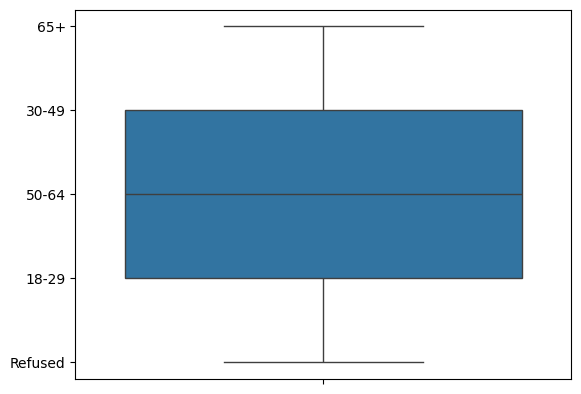

In [21]:
sns.boxplot(df_dropped['F_AGECAT'].unique())

In [22]:
# List of categorical variables
categorical_vars = ['TECH1_W99',	'CNCEXC_W99',	'ALGFAIR_W99',	'DISCRIM1_a_W99',	'DISCRIM1_b_W99',	'DISCRIM1_c_W99',	'DISCRIM1_d_W99',	'DISCRIM1_e_W99',	'DISCRIM1_f_W99',	'F_AGECAT',	'F_GENDER',	'F_EDUCCAT2',	'F_RACETHNMOD',	'F_CITIZEN',	'DCARS1_W99',	'DCARS2_W99',	'DCARS3_W99',	'DCARS4_a_W99',	'DCARS4_b_W99',	'DCARS4_c_W99',	'DCARS4_d_W99',	'DCARS5_W99',	'DCARS6_W99',	'DCARS7_W99',	'DCARS8_a_W99',	'DCARS8_b_W99',	'DCARS8_c_W99',	'DCARS8_d_W99',	'DCARS9_W99',	'DCARS10_W99',	'DCARS11_a_W99',	'DCARS11_b_W99',	'DCARS11_c_W99',	'DCARS11_d_W99',	'DCARS12_W99',	'DCARS13_a_W99',	'DCARS13_b_W99',	'DCARS13_c_W99',	'DCARS13_d_W99',	'F_MARITAL',	'F_RELIG',	'F_PARTY_FINAL',	'F_REG',	'F_INC_TIER2']

#display the data types of the categorical variables
print(df_dropped[categorical_vars].dtypes)


TECH1_W99         object
CNCEXC_W99        object
ALGFAIR_W99       object
DISCRIM1_a_W99    object
DISCRIM1_b_W99    object
DISCRIM1_c_W99    object
DISCRIM1_d_W99    object
DISCRIM1_e_W99    object
DISCRIM1_f_W99    object
F_AGECAT          object
F_GENDER          object
F_EDUCCAT2        object
F_RACETHNMOD      object
F_CITIZEN         object
DCARS1_W99        object
DCARS2_W99        object
DCARS3_W99        object
DCARS4_a_W99      object
DCARS4_b_W99      object
DCARS4_c_W99      object
DCARS4_d_W99      object
DCARS5_W99        object
DCARS6_W99        object
DCARS7_W99        object
DCARS8_a_W99      object
DCARS8_b_W99      object
DCARS8_c_W99      object
DCARS8_d_W99      object
DCARS9_W99        object
DCARS10_W99       object
DCARS11_a_W99     object
DCARS11_b_W99     object
DCARS11_c_W99     object
DCARS11_d_W99     object
DCARS12_W99       object
DCARS13_a_W99     object
DCARS13_b_W99     object
DCARS13_c_W99     object
DCARS13_d_W99     object
F_MARITAL         object


In [23]:
# Define the categorization function with corrections
def categorize_CARS(response):
    response = str(response).strip().lower()
    high_responses = ['a lot', 'definitely want', 'definitely would happen', 'very well', 'very comfortable', 'very positive', 'extremely comfortable', 'more acceptable', 'a major role']
    medium_responses = ['somewhat well', 'probably want', 'probably would happen', 'somewhat comfortable', 'probably not want', 'mostly positive', 'less acceptable', 'a minor role', 'a little', 'not too comfortable']
    low_responses = ['no difference', 'nothing at all', 'definitely not want', 'definitely would not happen', 'not too well', 'probably would not happen', 'not at all well', 'not comfortable at all', 'mostly negative', 'very negative', 'no difference', 'no role at all']
    uncertain_responses = ['not sure', 'don\'t know', 'no answer']

    if response in high_responses:
        return 'High'
    elif response in medium_responses:
        return 'Medium'
    elif response in low_responses:
        return 'Low'
    elif response in uncertain_responses:
        return 'Uncertain'
    else:
        return 'Unknown'

# List of columns to categorize
dcars_columns = ['DCARS1_W99', 'DCARS12_W99', 'DCARS11_a_W99',	'DCARS11_b_W99','DCARS11_c_W99',	'DCARS11_d_W99', 'DCARS8_a_W99',	'DCARS8_b_W99',	'DCARS8_c_W99',	'DCARS8_d_W99', 'DCARS4_a_W99',	'DCARS4_b_W99',	'DCARS4_c_W99',	'DCARS4_d_W99', 'DCARS3_W99']

# Check if the columns exist in the DataFrame before applying the function
existing_columns = [col for col in dcars_columns if col in df_dropped.columns]

# Apply the categorization function only to existing columns
df_dropped[existing_columns] = df_dropped[existing_columns].applymap(categorize_CARS)

# Display the first few rows to verify
print(df_dropped.head())

       QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0  Mostly positive  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0  Mostly positive  Equally concerned and excited  Not possible   
4  100637.0  Mostly positive  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ... DCARS12_W99 DCARS13_a_W99 DCARS13_

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_19926/2522239481.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dropped[existing_columns] = df_dropped[existing_columns].applymap(categorize_CARS)


In [24]:
df_dropped.head()

QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0  Mostly positive  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0  Mostly positive  Equally concerned and excited  Not possible   
4  100637.0  Mostly positive  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ... DCARS12_W99 DCARS13_a_W99 DCARS13_b_W99 DCARS13_c_W99  \
0       Not sure  ...      Medium         Favor        Oppose        Oppose   
1      Very well  ...      Medium      Not sure        Oppose         Favor   
2  Somewhat well  ...        High         Favor      Not sure         Favor   
3       Not sure  ...      Medium         Favor        Oppose        Oppose   
4       Not sure  ...      Medium         Favor        Oppose        Oppose   

  DCARS13_d_W99           F_MARITAL                F_RELIG F_PARTY_FINAL  \
0         Favor  Never been married  Nothing in particular    Republican   
1         Favor            Divorced             Protestant    Republican   
2         Favor             Married         Roman Catholic      Democrat   
3         Favor             Married             Protestant    Republican   
4         Favor             Married             Protestant   Independent   

                                               F_REG    F_INC_TIER2  
0  You are ABSOLUTELY CERTAIN that you are regist...  Middle income  
1  You are ABSOLUTELY CERTAIN that you are regist...  Middle income  
2  You are ABSOLUTELY CERTAIN that you are regist...   Upper income  
3  You are ABSOLUTELY CERTAIN that you are regist...   Upper income  
4  You are ABSOLUTELY CERTAIN that you are regist...   Lower income  

[5 rows x 45 columns]

In [25]:
df_dropped['DCARS12_W99'].unique()

array(['Medium', 'High', 'Low', 'Unknown'], dtype=object)

In [26]:
# Convert all values in the categorical columns to strings
for column in categorical_vars:
    df_dropped[column] = df_dropped[column].astype(str)

# Create a mapping dictionary dynamically
mapping_dict = {}
for column in categorical_vars:
    unique_values = sorted(df_dropped[column].unique())
    mapping_dict[column] = {value: idx + 1 for idx, value in enumerate(unique_values)}

# Define a function to map and convert columns
def map_and_convert(df, column, mapping):
    df_dropped[column] = df_dropped[column].map(mapping)
    df_dropped[column] = pd.to_numeric(df[column])

# Loop through the categorical variables and apply the mapping
for column in categorical_vars:
    map_and_convert(df_dropped, column, mapping_dict[column])

# Save the new dataset with the encoded columns
df_dropped.to_csv('https://raw.githubusercontent.com/ggotoo/Artificial-Intelligence/main/AI_Condensed_Data_Useful_Data.csv', index=False)

In [27]:
#display the data types of the categorical variables
#print(df_dropped[categorical_vars].dtypes)

# Convert all values in the categorical columns to strings
#for column in categorical_vars:
#    df_dropped[column] = df_dropped[column].astype(str)

# Create a mapping dictionary dynamically
#mapping_dict = {}
#for column in categorical_vars:
#    unique_values = sorted(df_dropped[column].unique())
#    mapping_dict[column] = {value: idx + 1 for idx, value in enumerate(unique_values)}

# Define a function to map and convert columns
#def map_and_convert(df_dropped, column, mapping):
#    new_column_name = f"{column}_numeric"
#    df_dropped[new_column_name] = df_dropped[column].map(mapping)
#    df_dropped[new_column_name] = pd.to_numeric(df_dropped[new_column_name])

# Loop through the categorical variables and apply the mapping
#for column in categorical_vars:
#    map_and_convert(df_dropped, column, mapping_dict[column])

# Display the first few rows of the dataframe to verify the mapping
#print(df_dropped.head())


In [28]:
df_dropped.head()

QKEY  TECH1_W99  CNCEXC_W99  ALGFAIR_W99  DISCRIM1_a_W99  \
0  100260.0          3           1            1               3   
1  100314.0          3           3            3               6   
2  100363.0          3           1            1               5   
3  100598.0          3           1            1               2   
4  100637.0          3           1            2               2   

   DISCRIM1_b_W99  DISCRIM1_c_W99  DISCRIM1_d_W99  DISCRIM1_e_W99  \
0               6               6               6               2   
1               3               3               2               5   
2               5               5               5               6   
3               2               2               2               2   
4               2               2               2               6   

   DISCRIM1_f_W99  ...  DCARS12_W99  DCARS13_a_W99  DCARS13_b_W99  \
0               2  ...            3              1              3   
1               6  ...            3              2              3   
2               5  ...            1              1              2   
3               2  ...            3              1              3   
4               2  ...            3              1              3   

   DCARS13_c_W99  DCARS13_d_W99  F_MARITAL  F_RELIG  F_PARTY_FINAL  F_REG  \
0              3              1          4        8              4      2   
1              1              1          1       11              4      2   
2              1              1          3       13              1      2   
3              3              1          3       11              4      2   
4              3              1          3       11              2      2   

   F_INC_TIER2  
0            2  
1            2  
2            4  
3            4  
4            1  

[5 rows x 45 columns]

In [29]:
#display the data types of the categorical variables
print(df_dropped[categorical_vars].dtypes)

TECH1_W99         int64
CNCEXC_W99        int64
ALGFAIR_W99       int64
DISCRIM1_a_W99    int64
DISCRIM1_b_W99    int64
DISCRIM1_c_W99    int64
DISCRIM1_d_W99    int64
DISCRIM1_e_W99    int64
DISCRIM1_f_W99    int64
F_AGECAT          int64
F_GENDER          int64
F_EDUCCAT2        int64
F_RACETHNMOD      int64
F_CITIZEN         int64
DCARS1_W99        int64
DCARS2_W99        int64
DCARS3_W99        int64
DCARS4_a_W99      int64
DCARS4_b_W99      int64
DCARS4_c_W99      int64
DCARS4_d_W99      int64
DCARS5_W99        int64
DCARS6_W99        int64
DCARS7_W99        int64
DCARS8_a_W99      int64
DCARS8_b_W99      int64
DCARS8_c_W99      int64
DCARS8_d_W99      int64
DCARS9_W99        int64
DCARS10_W99       int64
DCARS11_a_W99     int64
DCARS11_b_W99     int64
DCARS11_c_W99     int64
DCARS11_d_W99     int64
DCARS12_W99       int64
DCARS13_a_W99     int64
DCARS13_b_W99     int64
DCARS13_c_W99     int64
DCARS13_d_W99     int64
F_MARITAL         int64
F_RELIG           int64
F_PARTY_FINAL   

In [30]:
df_dropped['DCARS12_W99'].unique()

array([3, 1, 2, 4])

In [31]:
df_dropped.describe()

QKEY    TECH1_W99   CNCEXC_W99  ALGFAIR_W99  DISCRIM1_a_W99  \
count  9.864000e+03  9864.000000  9864.000000  9864.000000     9864.000000   
mean   1.728387e+11     2.554035     1.730231     1.989659        3.689680   
std    7.099790e+10     0.804983     0.752106     0.787265        1.767171   
min    1.002600e+05     1.000000     1.000000     1.000000        1.000000   
25%    2.020000e+11     3.000000     1.000000     1.000000        2.000000   
50%    2.020000e+11     3.000000     2.000000     2.000000        3.000000   
75%    2.020000e+11     3.000000     2.000000     3.000000        5.000000   
max    2.020000e+11     4.000000     4.000000     4.000000        6.000000   

       DISCRIM1_b_W99  DISCRIM1_c_W99  DISCRIM1_d_W99  DISCRIM1_e_W99  \
count     9864.000000     9864.000000     9864.000000     9864.000000   
mean         2.815998        2.826845        3.112429        3.787510   
std          1.425960        1.385249        1.550015        1.752234   
min          1.000000        1.000000        1.000000        1.000000   
25%          2.000000        2.000000        2.000000        2.000000   
50%          2.000000        2.000000        2.000000        5.000000   
75%          3.000000        3.000000        5.000000        5.000000   
max          6.000000        6.000000        6.000000        6.000000   

       DISCRIM1_f_W99  ...  DCARS12_W99  DCARS13_a_W99  DCARS13_b_W99  \
count     9864.000000  ...  9864.000000    9864.000000    9864.000000   
mean         3.216951  ...     2.713098       1.465734       2.698398   
std          1.531240  ...     0.638905       0.771489       0.649580   
min          1.000000  ...     1.000000       1.000000       1.000000   
25%          2.000000  ...     3.000000       1.000000       3.000000   
50%          3.000000  ...     3.000000       1.000000       3.000000   
75%          5.000000  ...     3.000000       2.000000       3.000000   
max          6.000000  ...     4.000000       4.000000       4.000000   

       DCARS13_c_W99  DCARS13_d_W99    F_MARITAL      F_RELIG  F_PARTY_FINAL  \
count    9864.000000    9864.000000  9864.000000  9864.000000    9864.000000   
mean        2.544607       1.457117     3.136557     9.490775       2.583435   
std         0.774896       0.766839     1.333137     3.522629       1.433770   
min         1.000000       1.000000     1.000000     1.000000       1.000000   
25%         2.000000       1.000000     3.000000     8.000000       1.000000   
50%         3.000000       1.000000     3.000000    11.000000       2.000000   
75%         3.000000       2.000000     3.000000    11.000000       4.000000   
max         4.000000       4.000000     7.000000    13.000000       5.000000   

             F_REG  F_INC_TIER2  
count  9864.000000  9864.000000  
mean      2.128447     2.343167  
std       0.425090     1.060541  
min       1.000000     1.000000  
25%       2.000000     2.000000  
50%       2.000000     2.000000  
75%       2.000000     3.000000  
max       4.000000     4.000000  

[8 rows x 45 columns]

In [32]:
#identifying the outliers in the data
#df_dropped.describe()

In [33]:
# Function to identify and remove outliers using IQR method
#def remove_outliers(df_dropped):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    #Q1 = df_dropped.quantile(0.25)
    #Q3 = df_dropped.quantile(0.75)
    #IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    #lower_bound = Q1 - 1.5 * IQR
    #upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    #outliers = ((df_dropped < lower_bound) | (df_dropped > upper_bound))
    
    # Remove outliers
    #df_no_outliers = df_dropped[~outliers.any(axis=1)]
    
    #return df_no_outliers



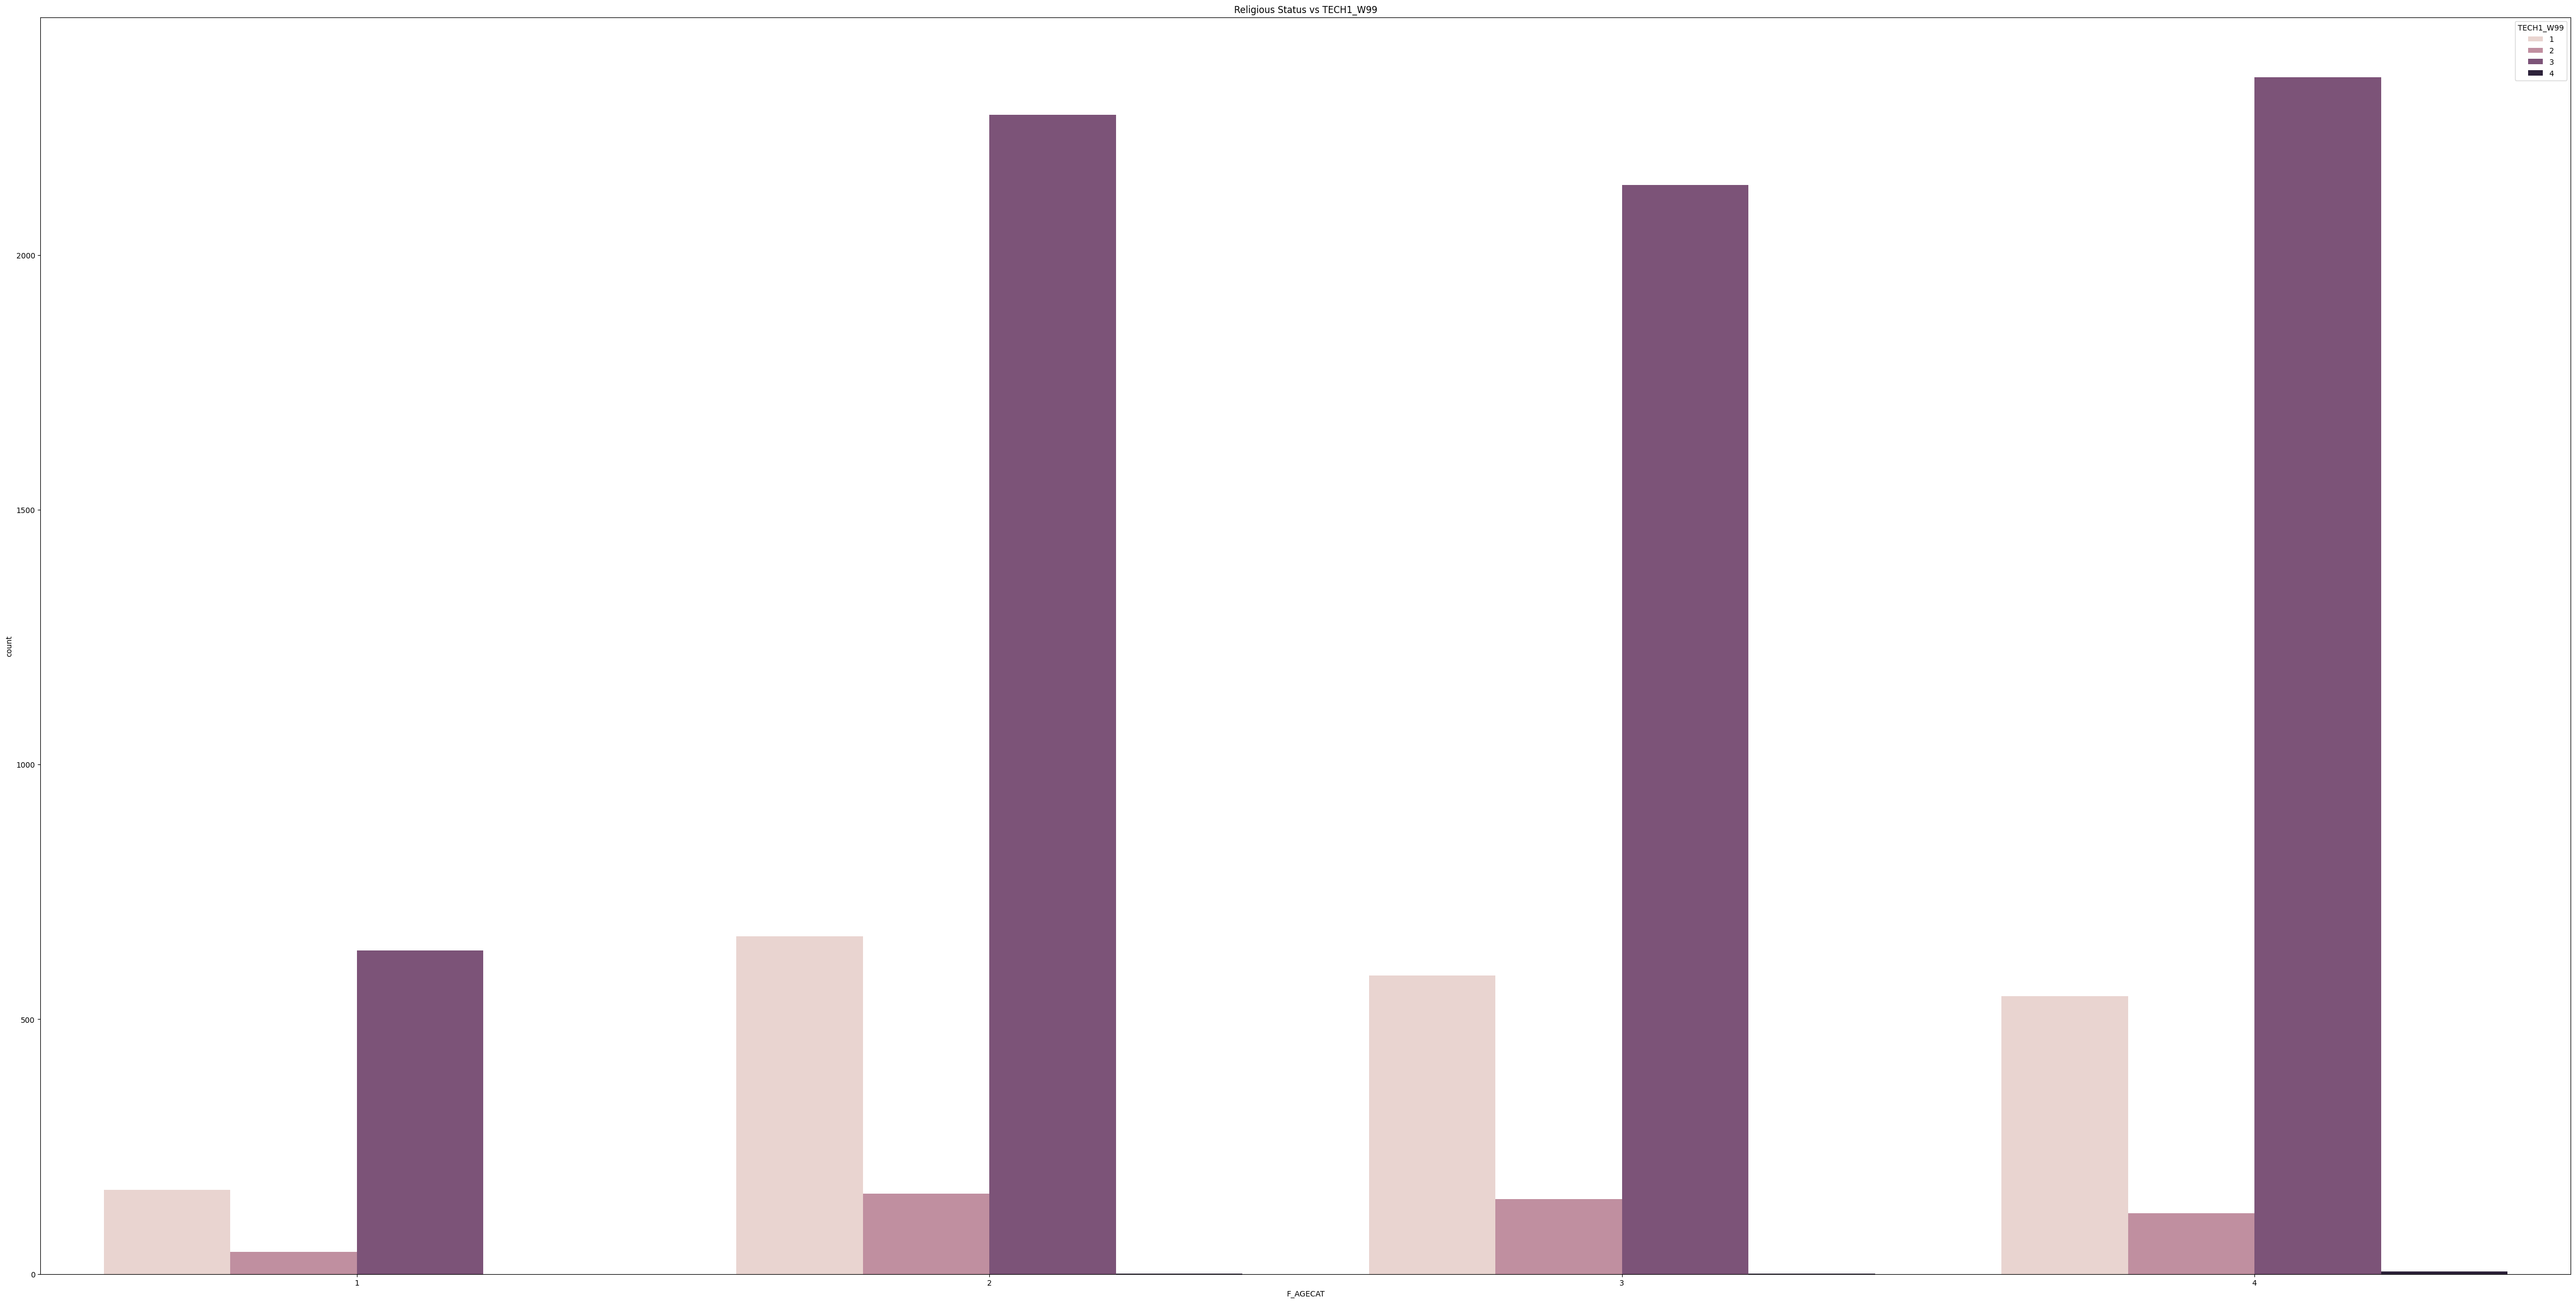

In [34]:
#create a displot of tech1_w99 and the categorical vars
#visualisation of the age and tech1_w99
df_filtered = df_dropped[df_dropped['F_AGECAT'] != 5]
plt.figure(figsize=(60, 30))
sns.countplot(data=df_filtered, x='F_AGECAT', hue='TECH1_W99')
plt.title("Religious Status vs TECH1_W99")
plt.show()

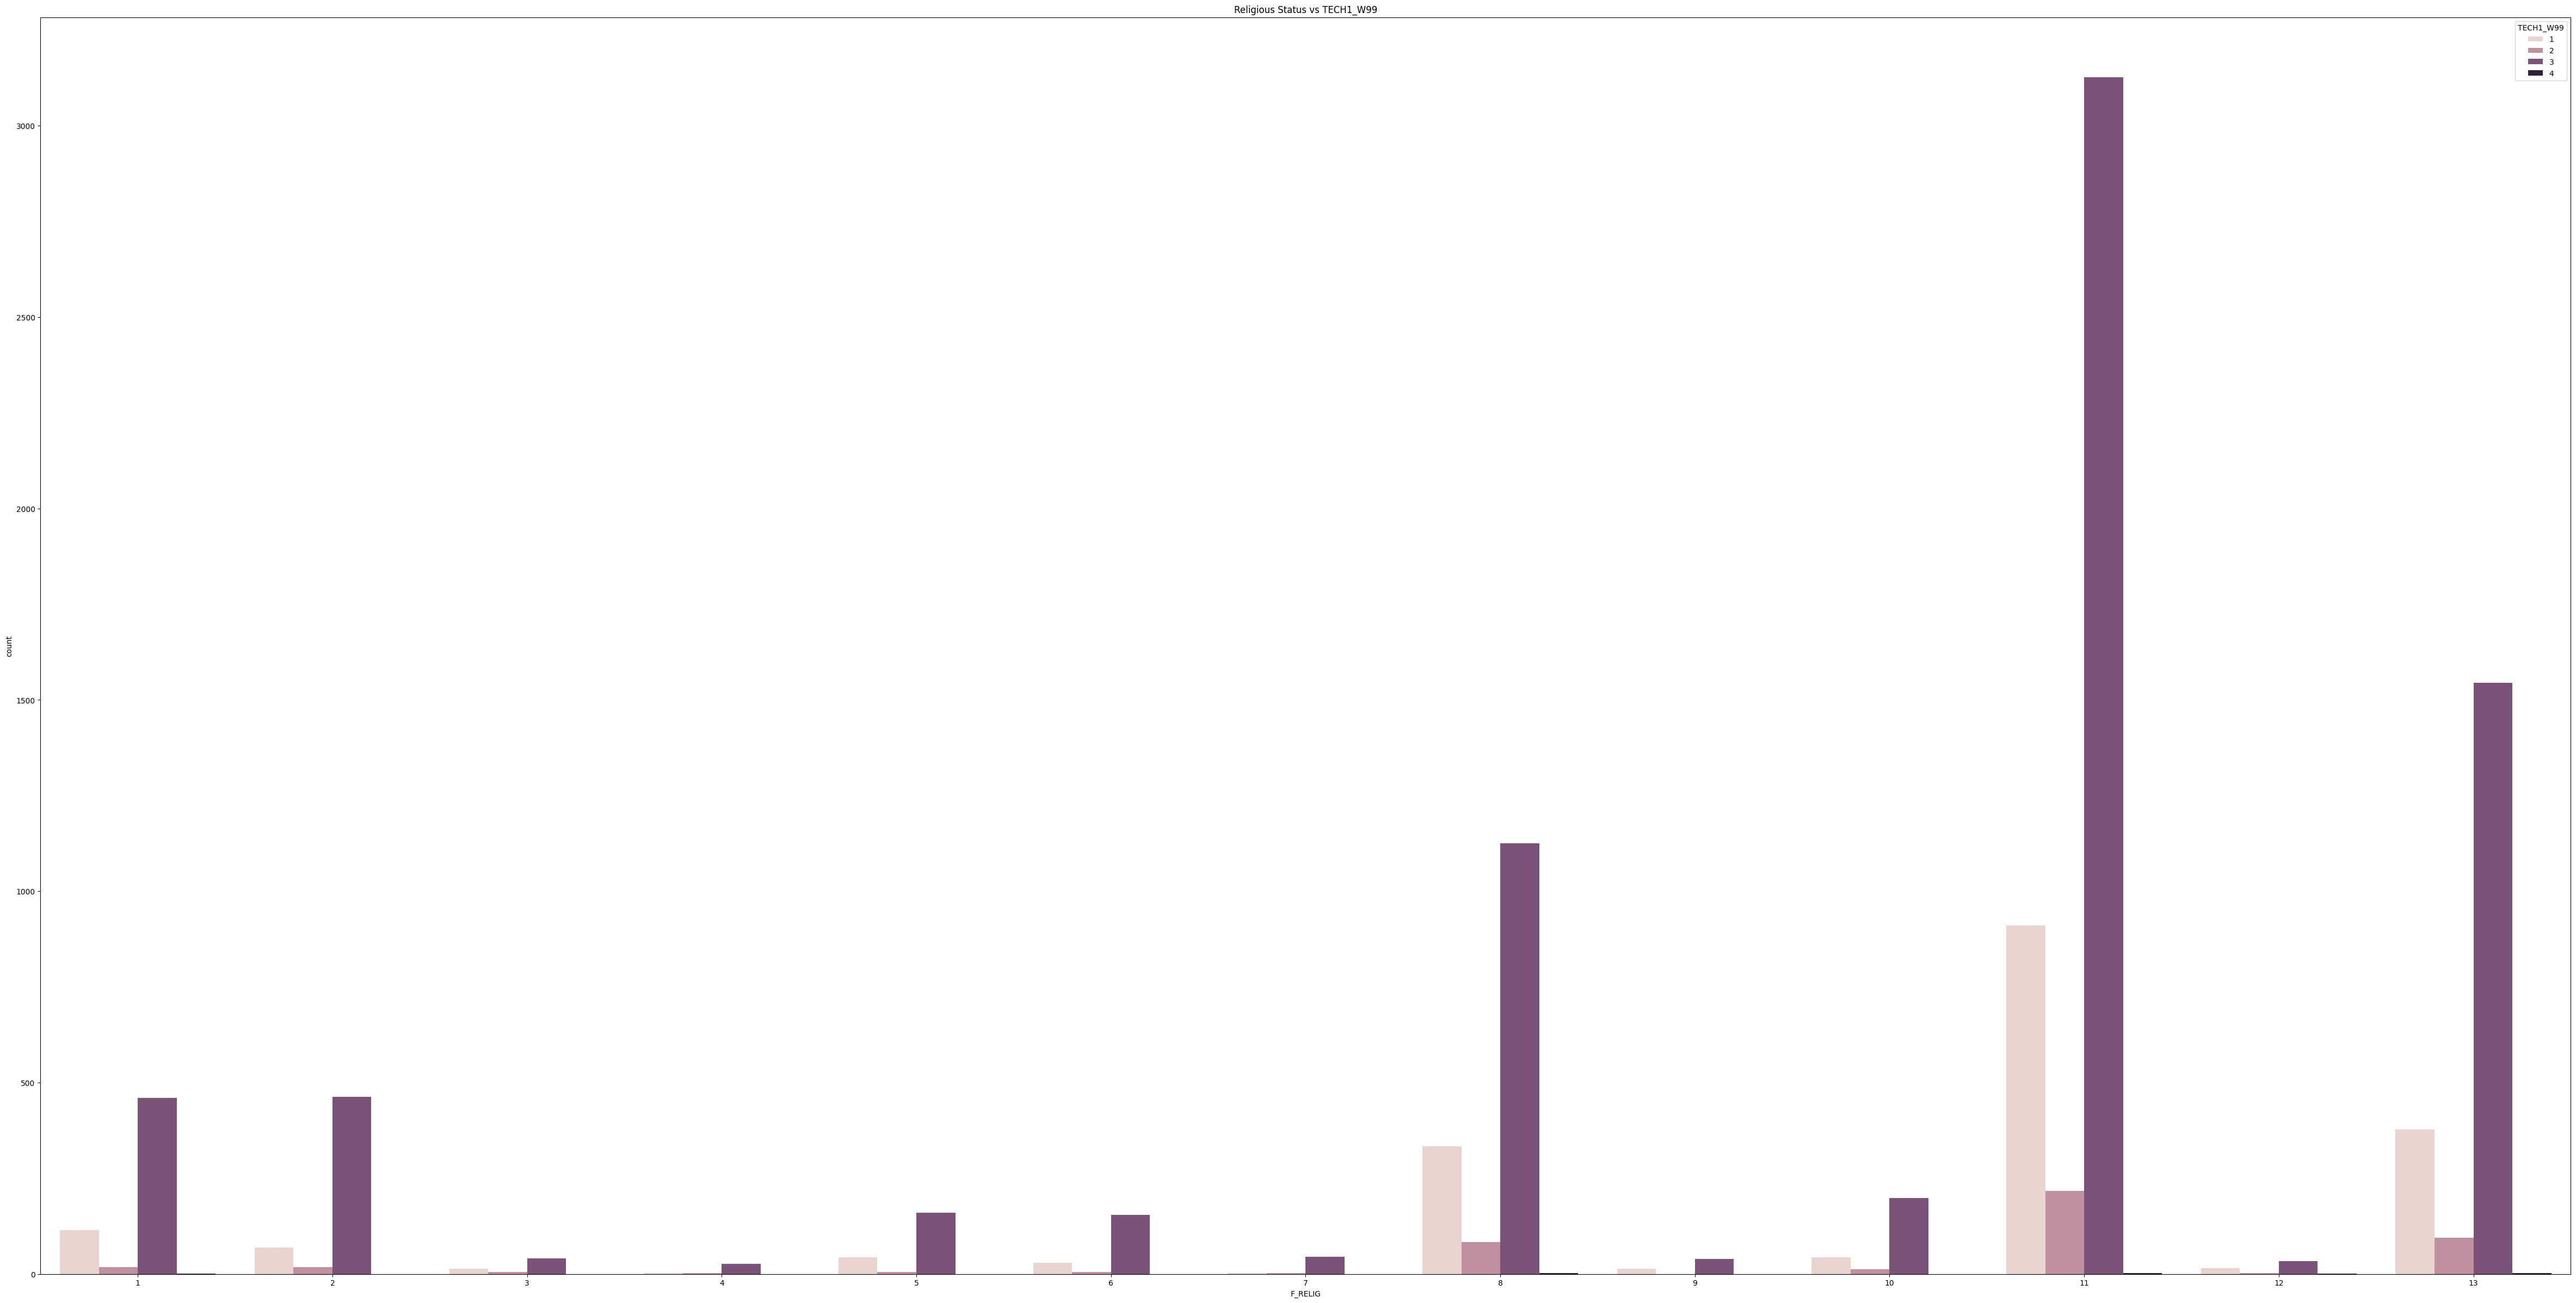

In [35]:
#visualisation of the religous status and tech1_w99
plt.figure(figsize=(60, 30))
sns.countplot(data=df_dropped, x='F_RELIG', hue='TECH1_W99')
plt.title("Religious Status vs TECH1_W99")
plt.show()

In [36]:
df_dropped["F_RELIG"].unique()

array([ 8, 11, 13,  1, 10,  2,  3,  6,  5,  9, 12,  7,  4])

In [37]:

# List of columns to categorize
dcars_columns = [col for col in df_filtered.columns if col.startswith('DCARS')]
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG','F_RACETHNMOD','F_CITIZEN','F_EDUCCAT2','F_MARITAL','F_PARTY_FINAL']



# Create a summary of DCARS responses by demographic groups
summary = df_filtered.groupby(demographic_columns)[dcars_columns].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
print(summary)

                                                                                               DCARS1_W99  \
F_AGECAT F_GENDER F_INC_TIER2 F_REG F_RACETHNMOD F_CITIZEN F_EDUCCAT2 F_MARITAL F_PARTY_FINAL               
1        1        1           1     6            1         7          4         1                       3   
                              2     1            1         1          3         1                       3   
                                                                      4         1                       3   
                                                           2          2         1                       1   
                                                                      4         1                       1   
...                                                                                                   ...   
4        4        3           2     6            1         2          3         2                       1   
                   

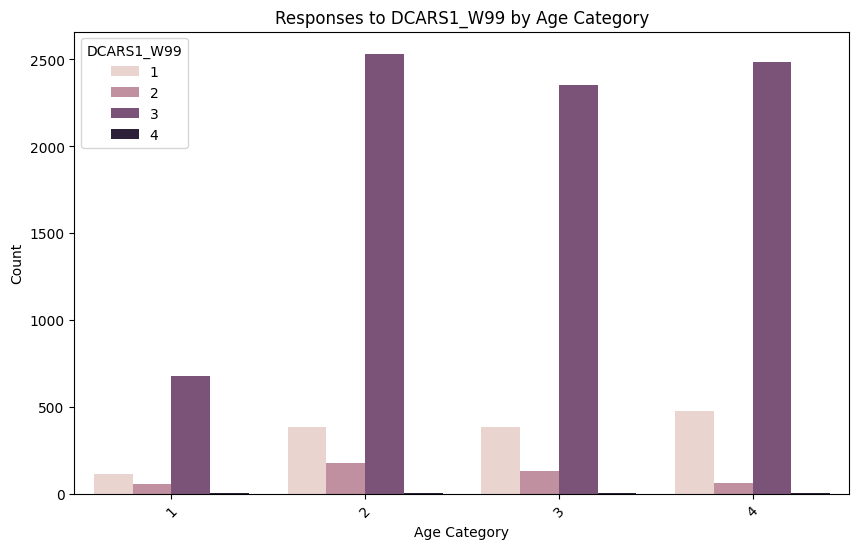

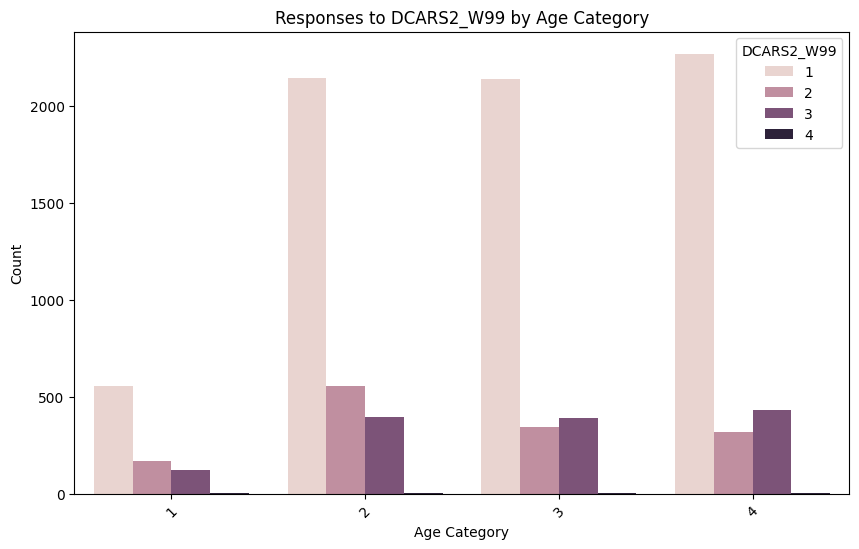

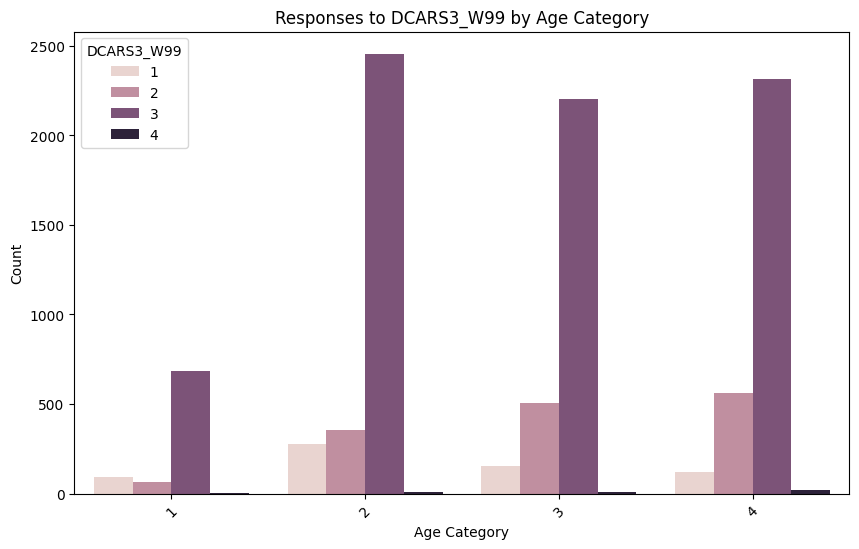

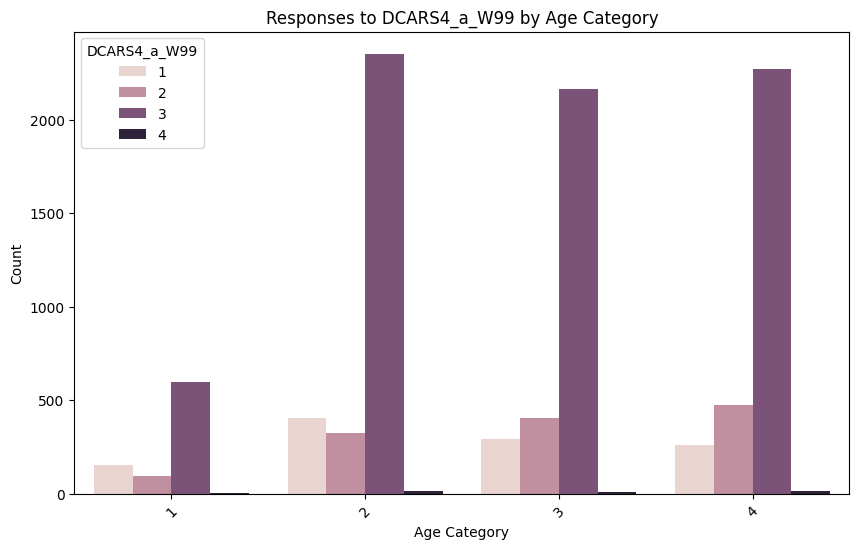

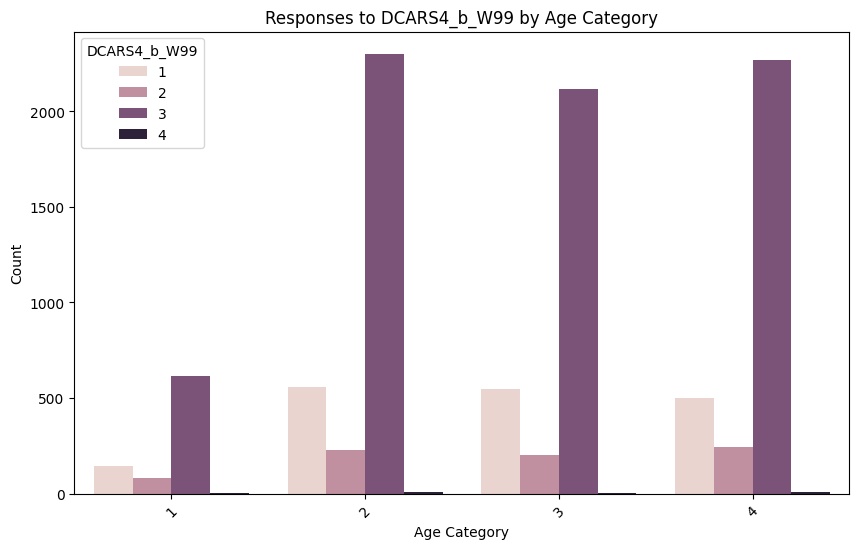

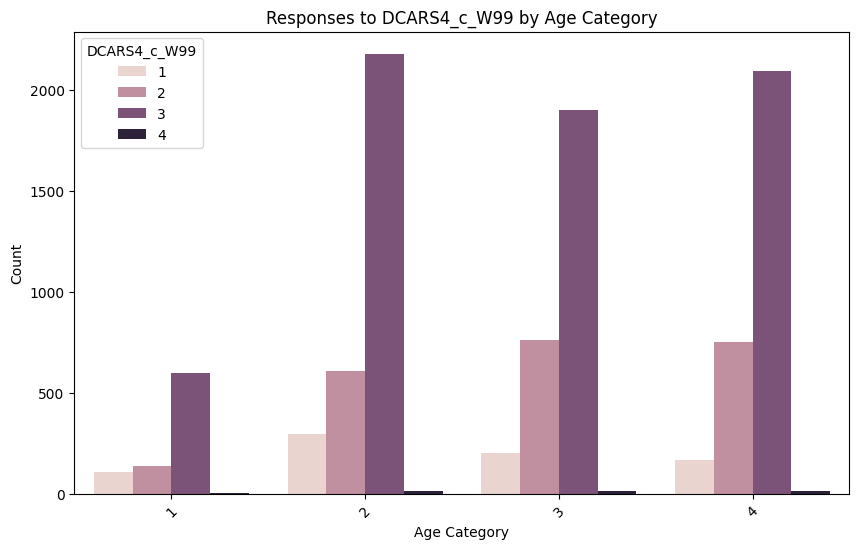

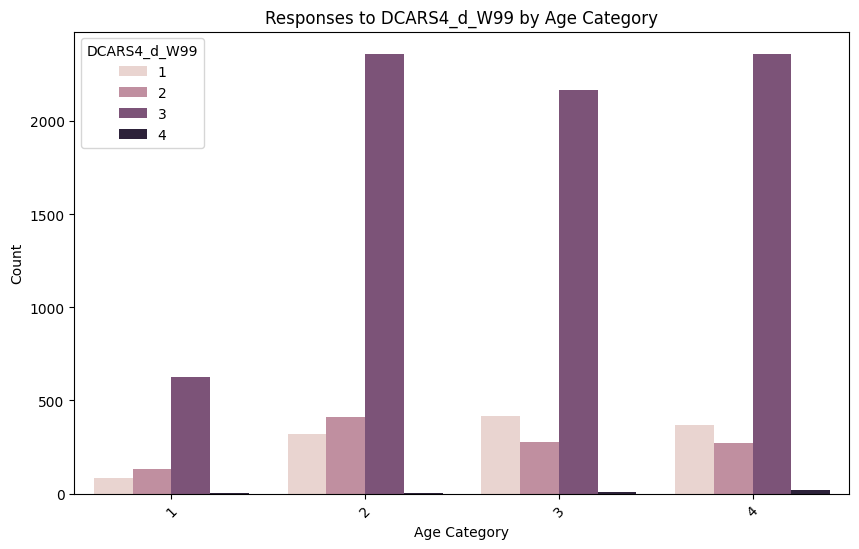

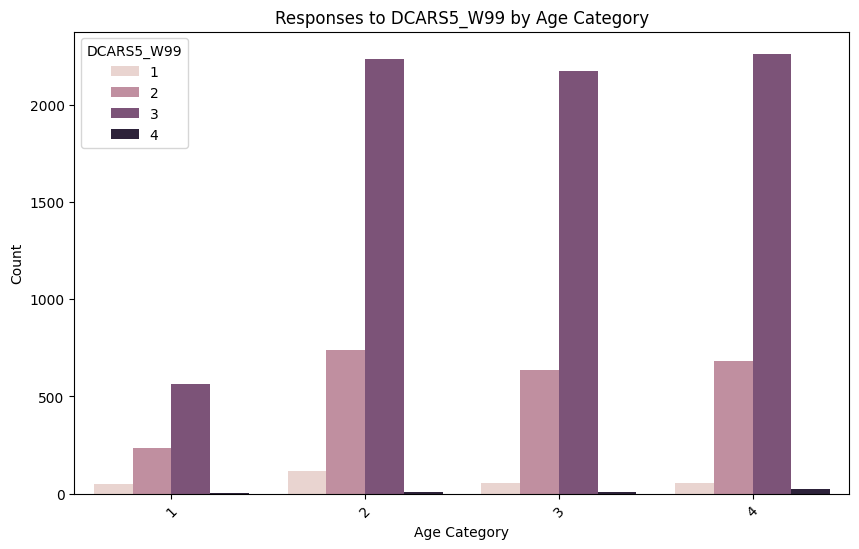

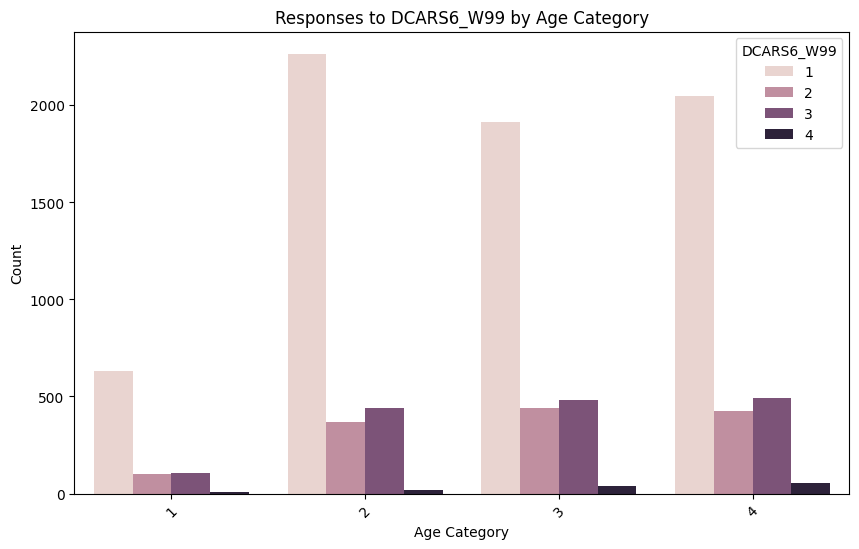

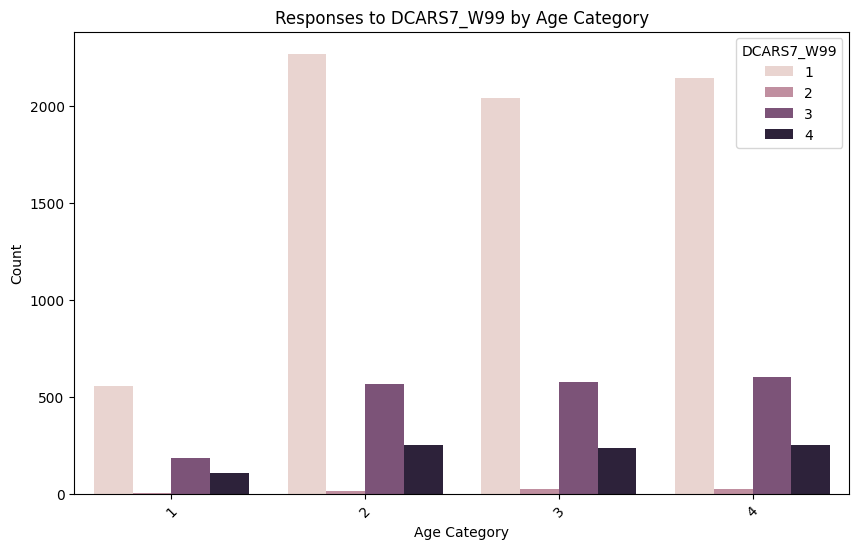

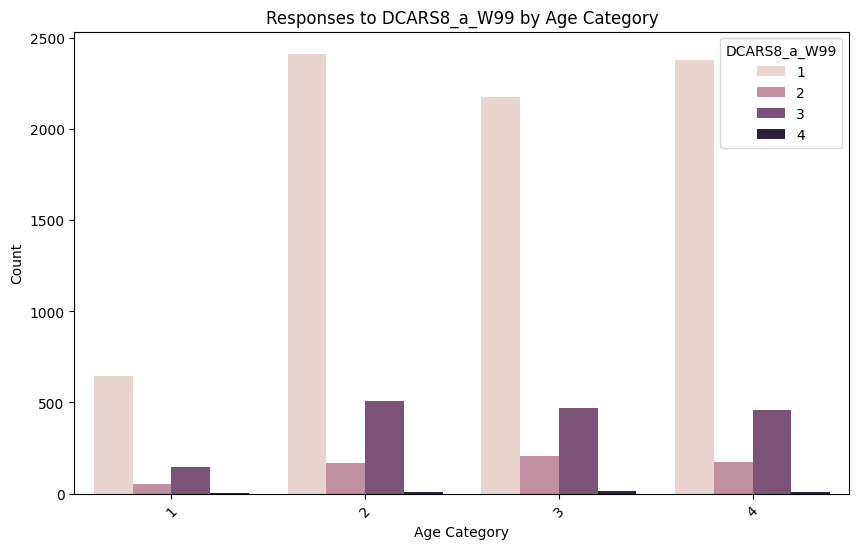

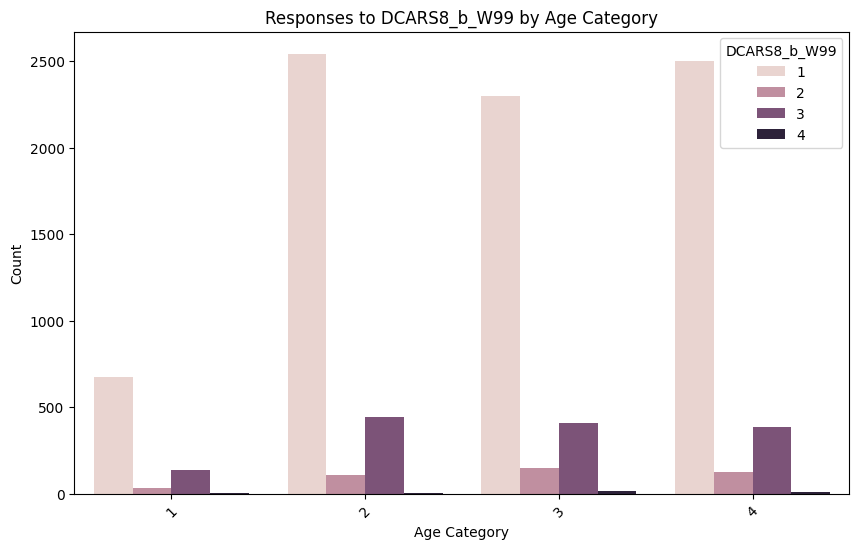

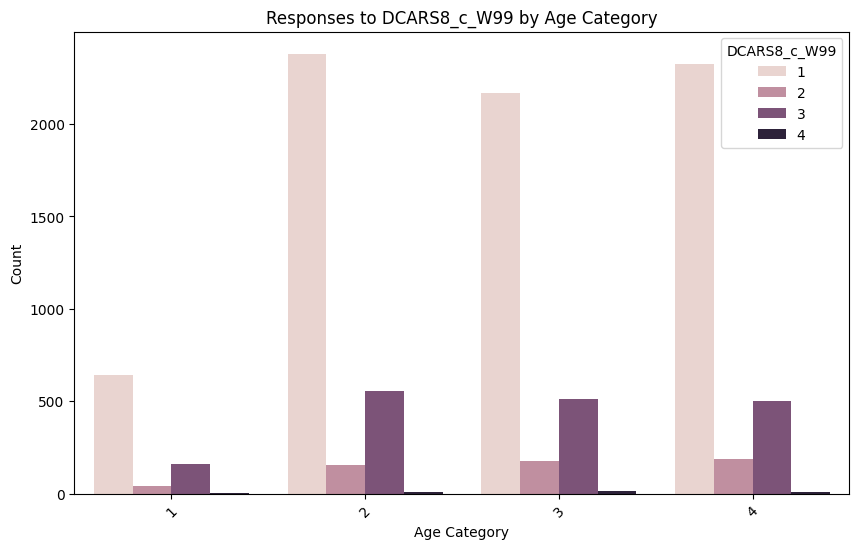

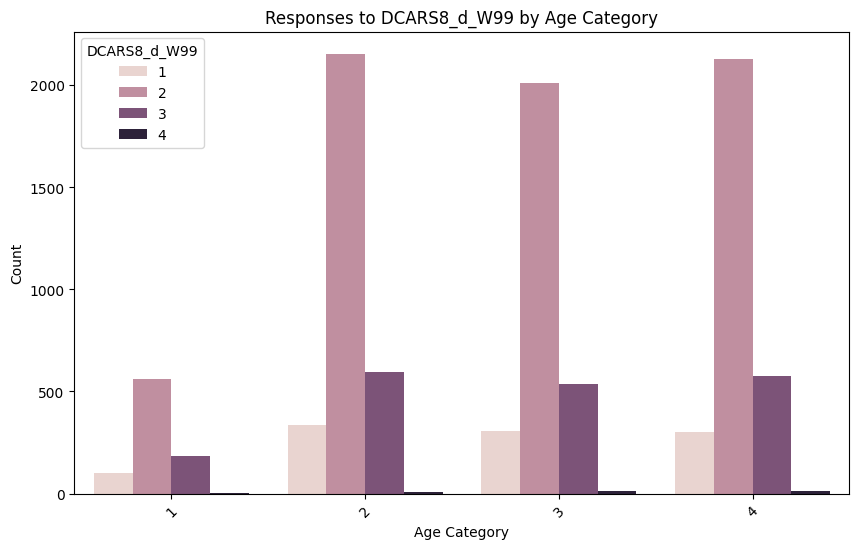

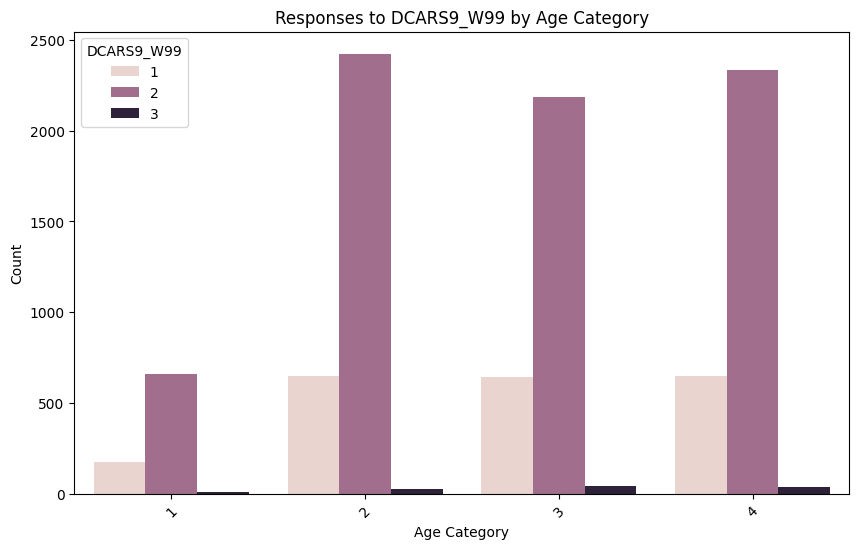

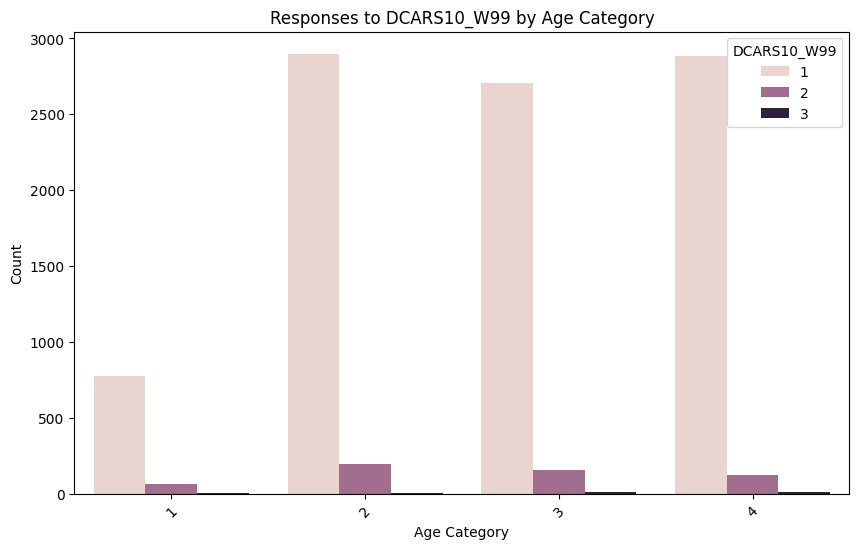

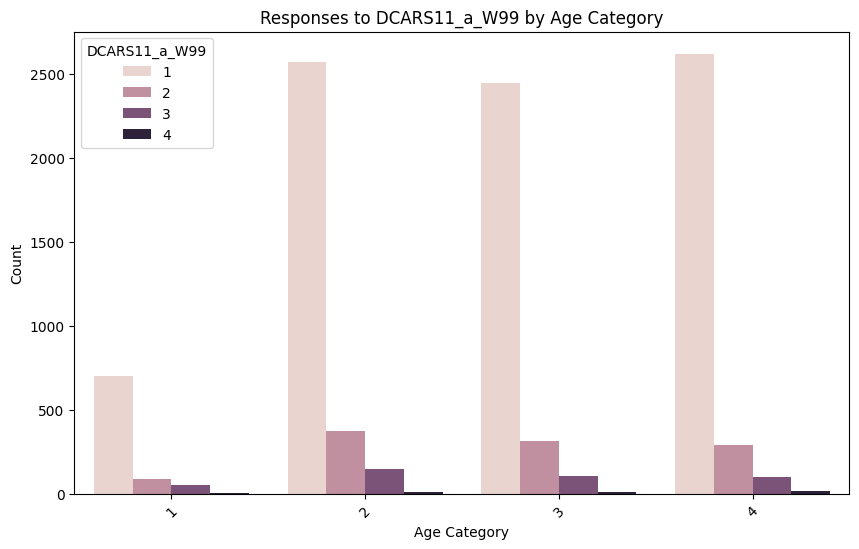

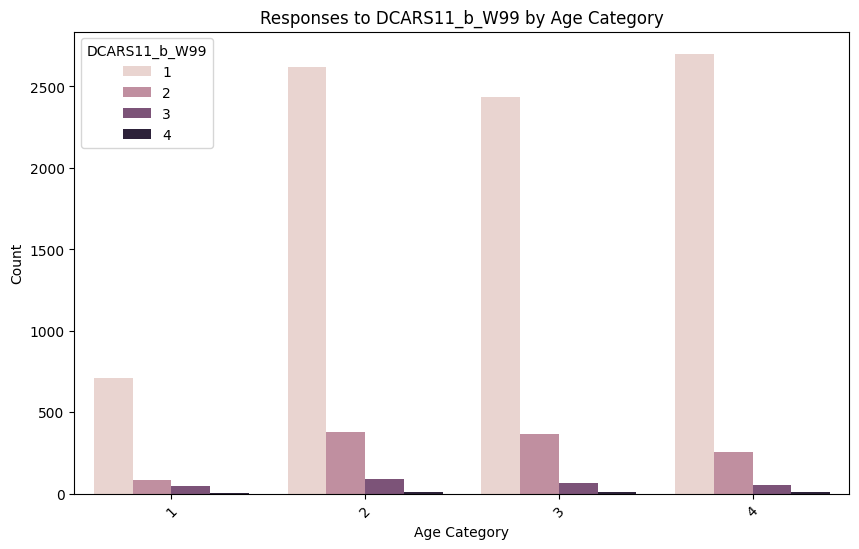

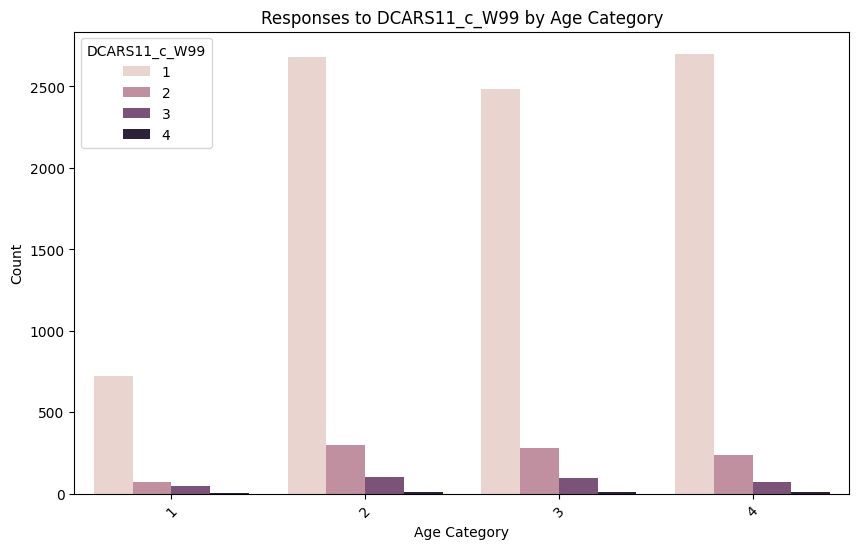

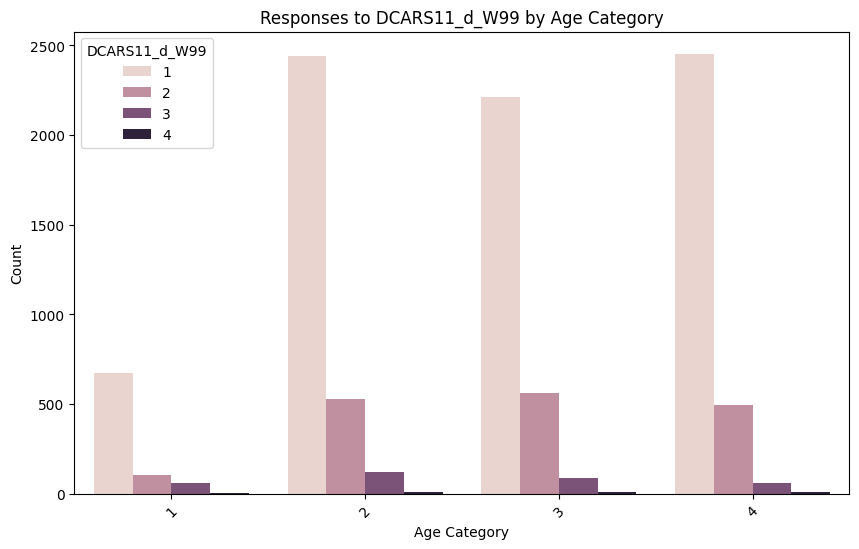

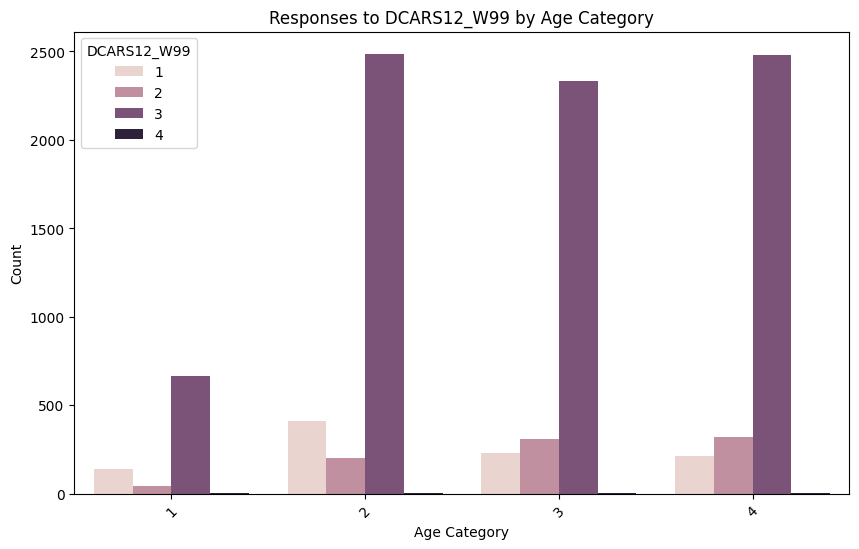

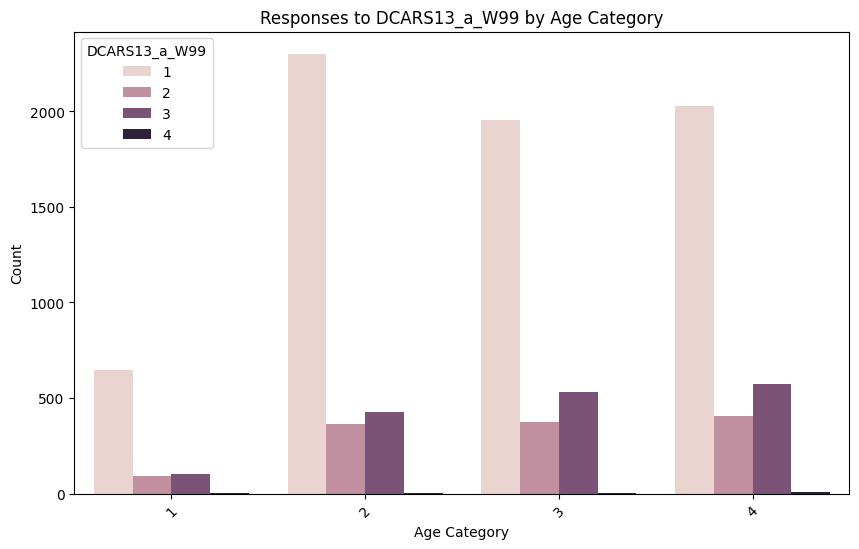

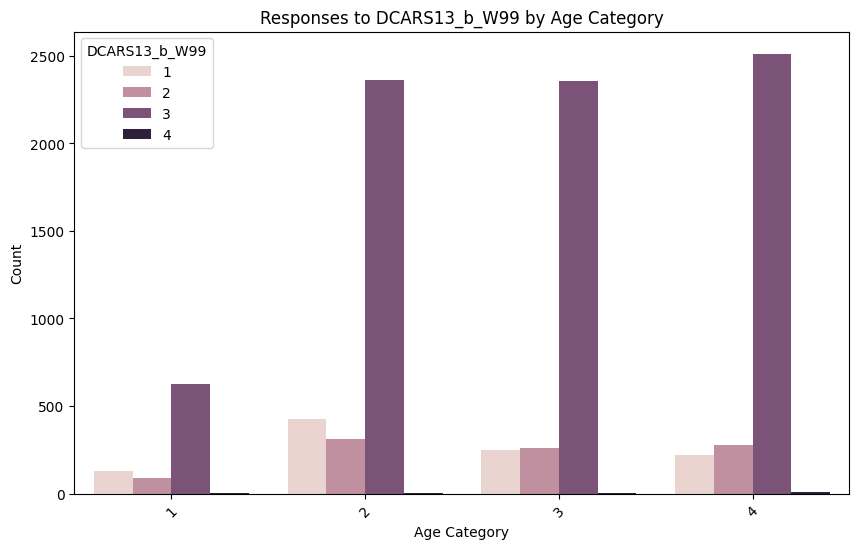

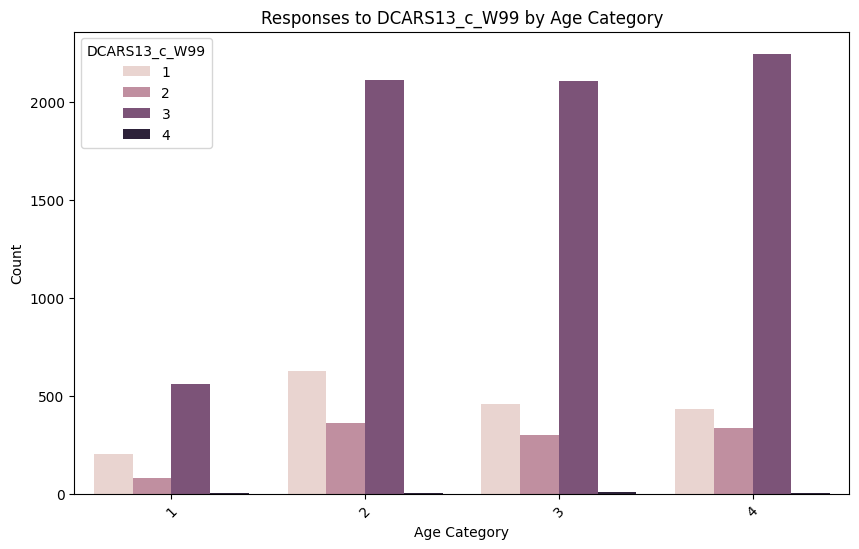

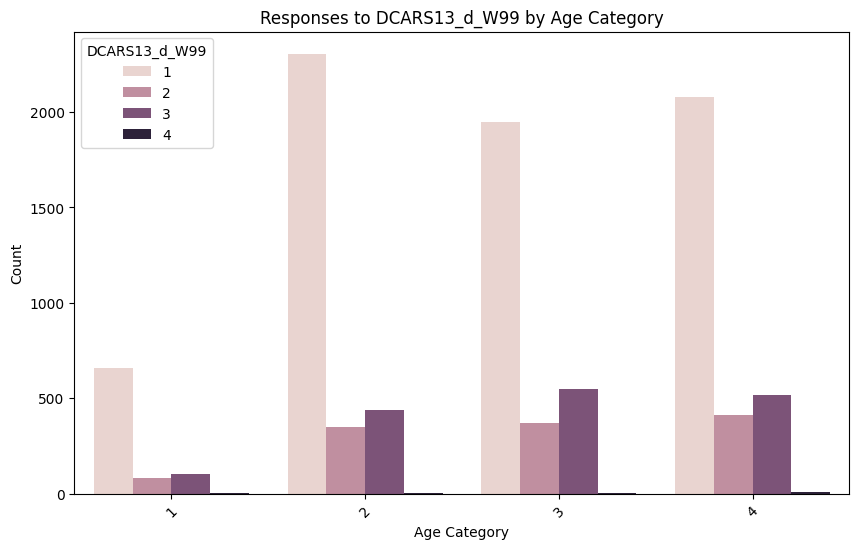

In [38]:
# List of columns to categorize
dcars_columns = [col for col in df_filtered.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x='F_AGECAT', hue=col)
    plt.title(f'Responses to {col} by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


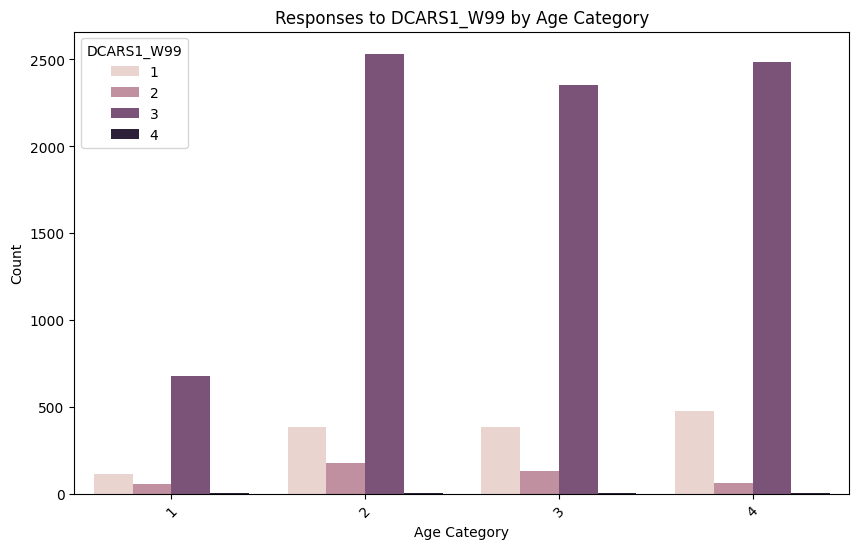

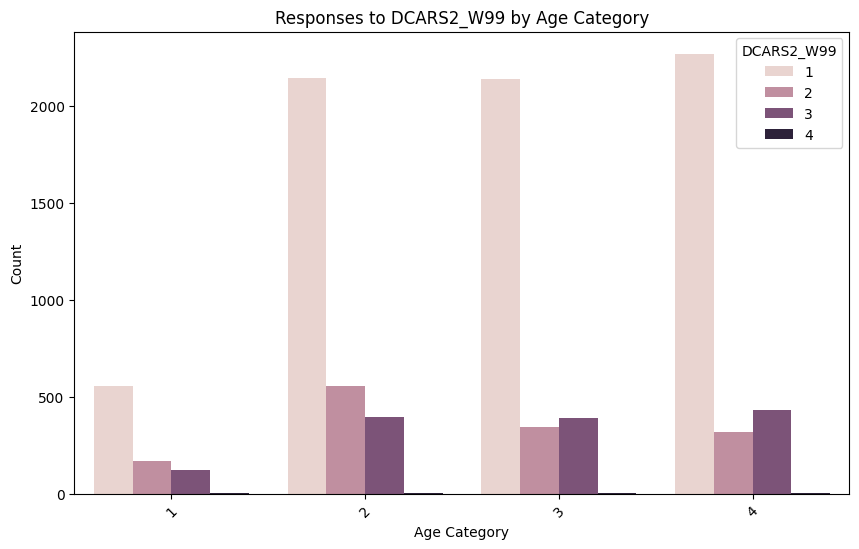

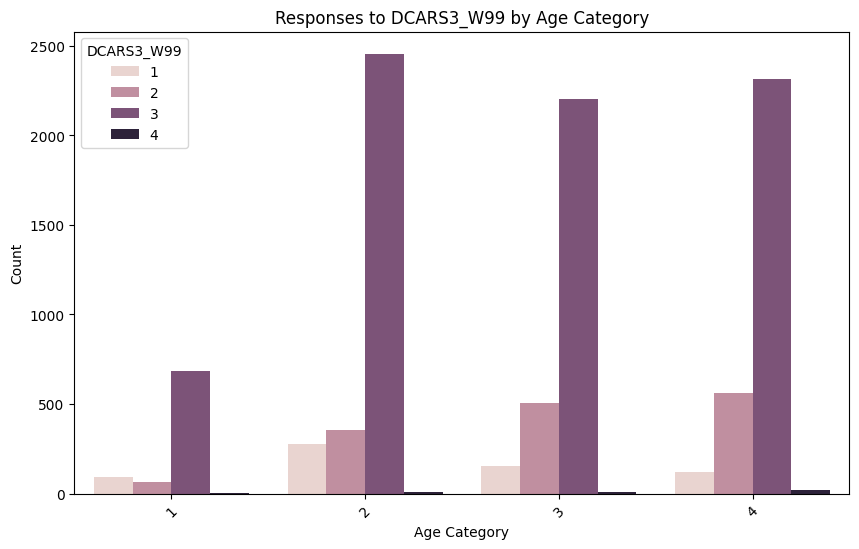

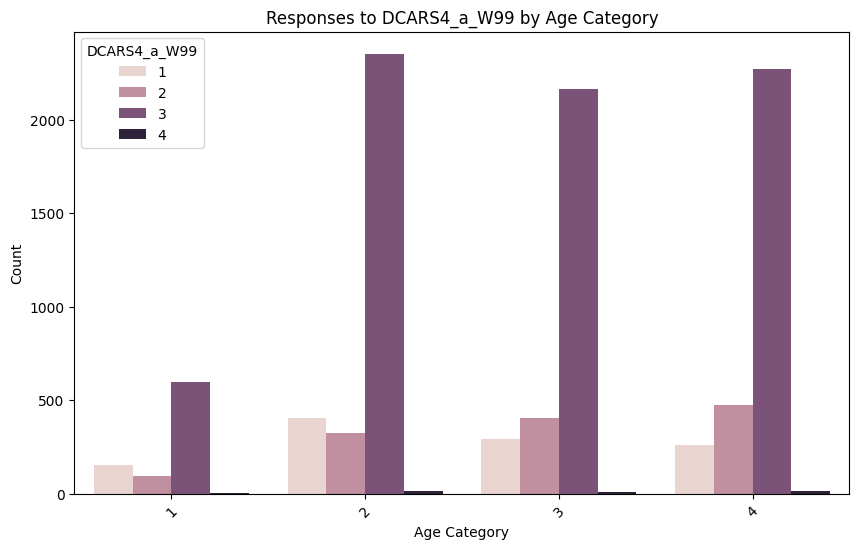

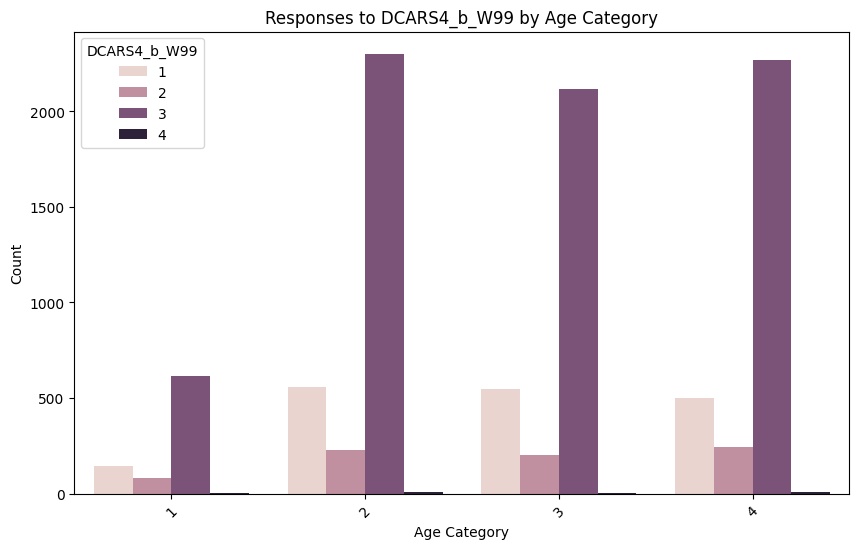

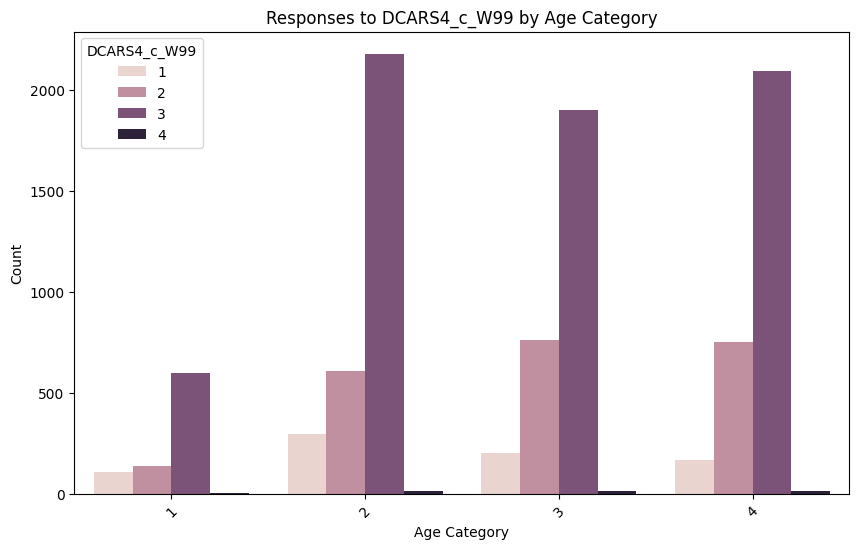

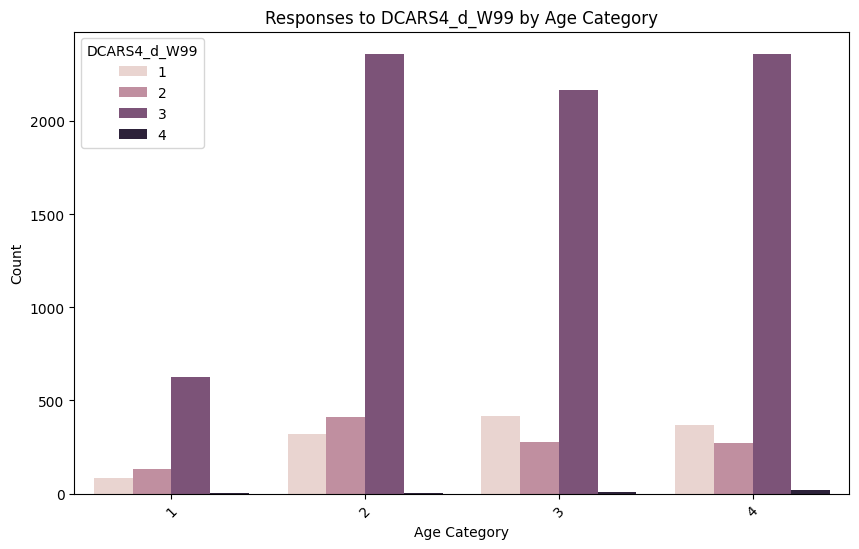

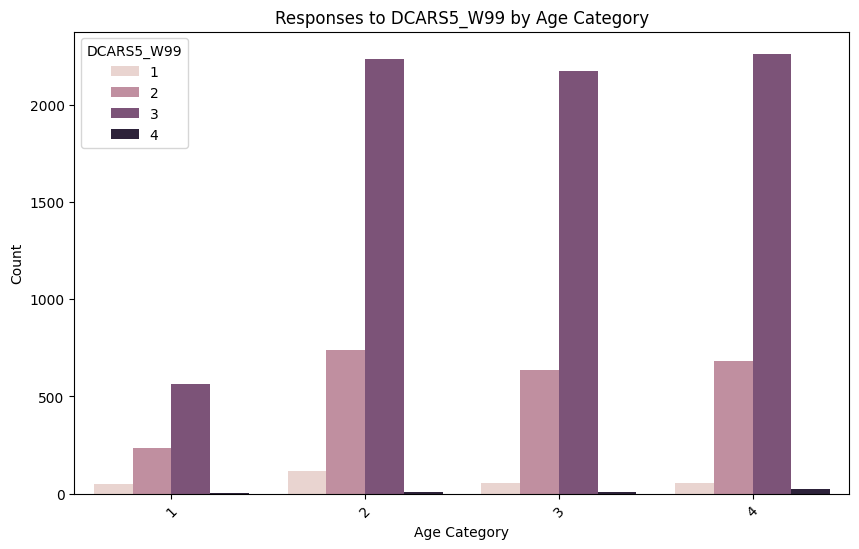

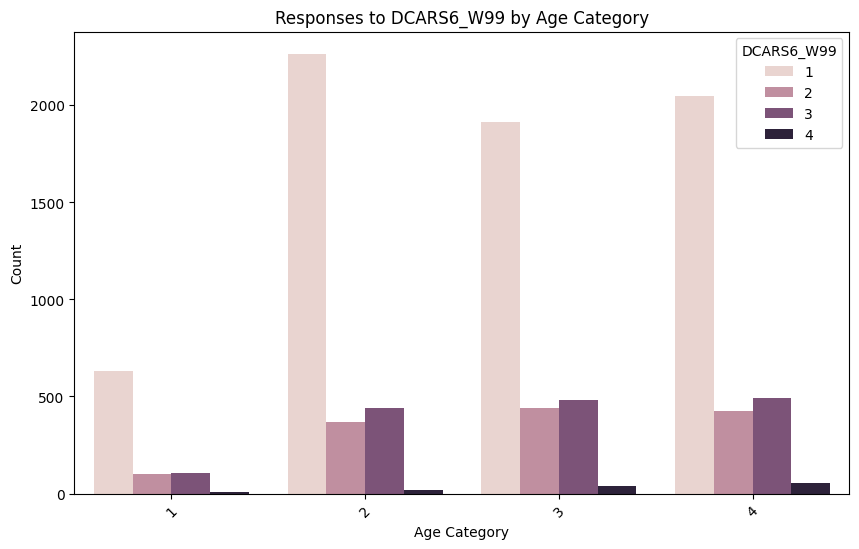

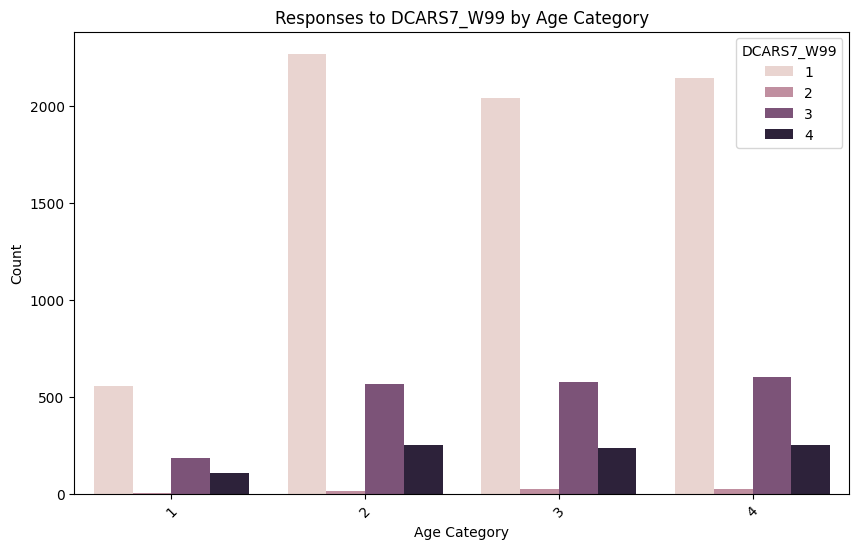

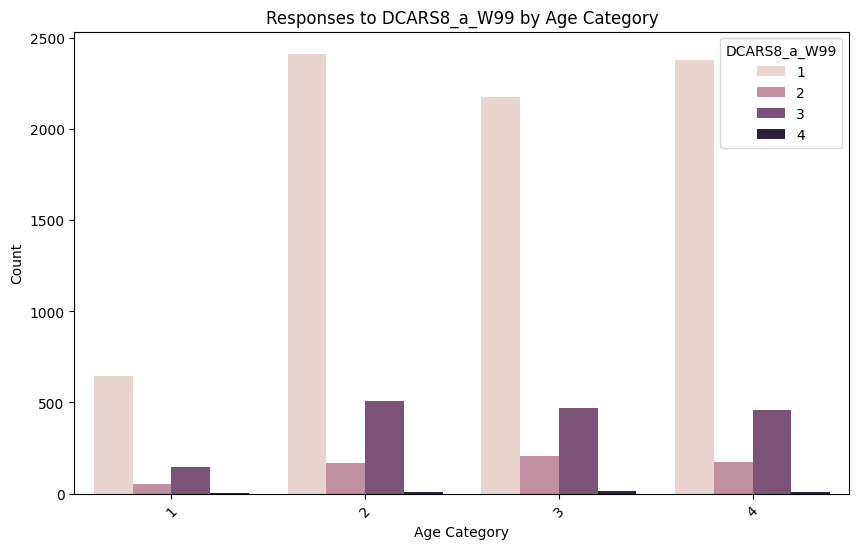

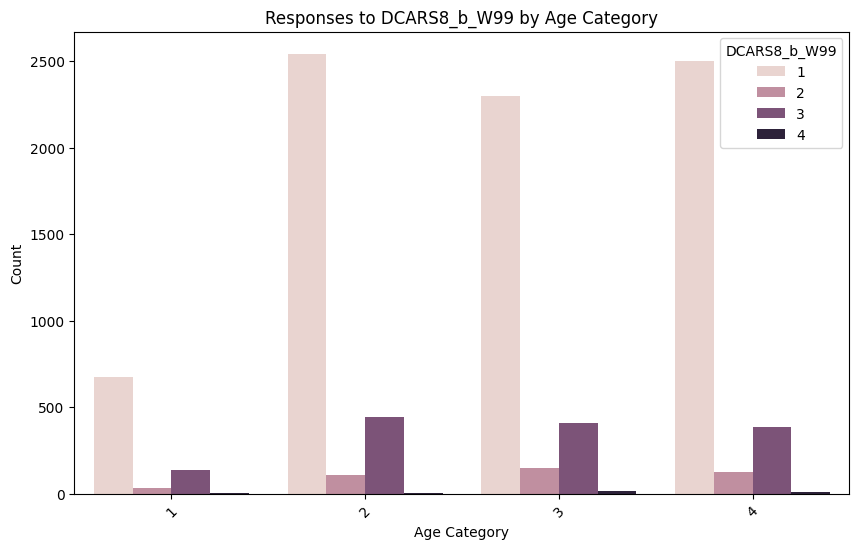

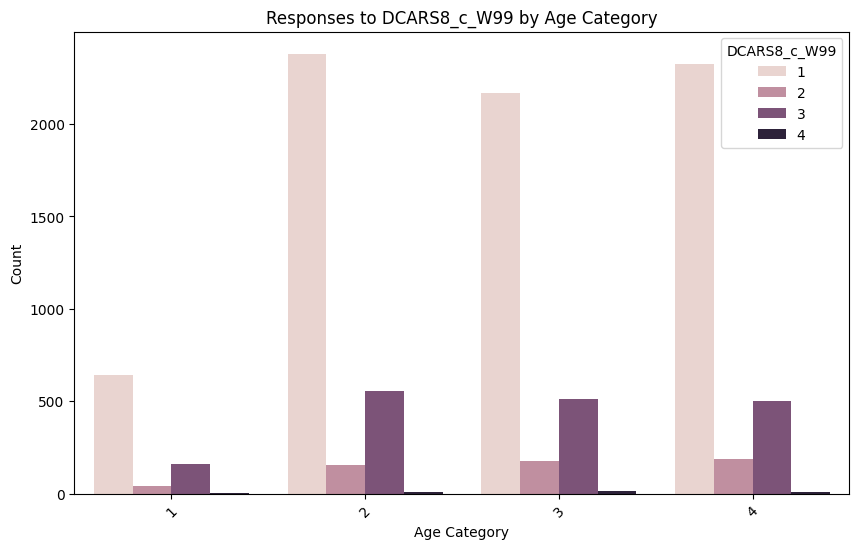

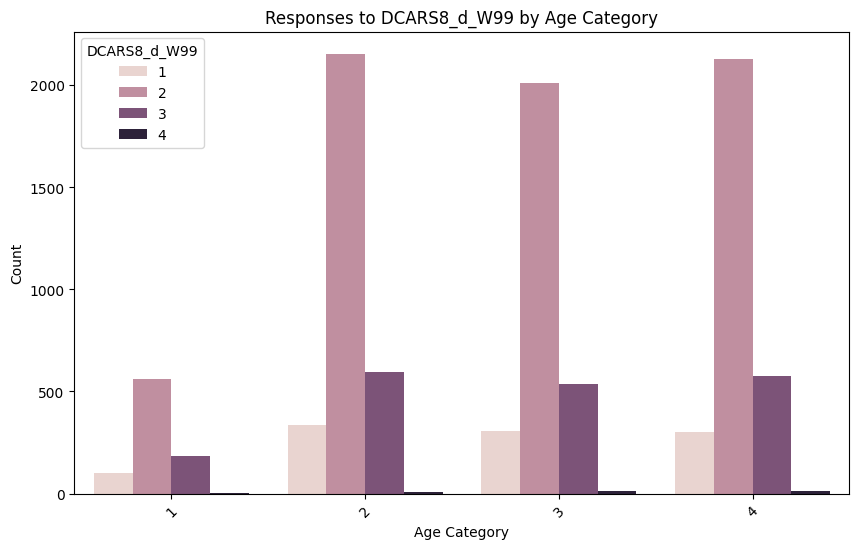

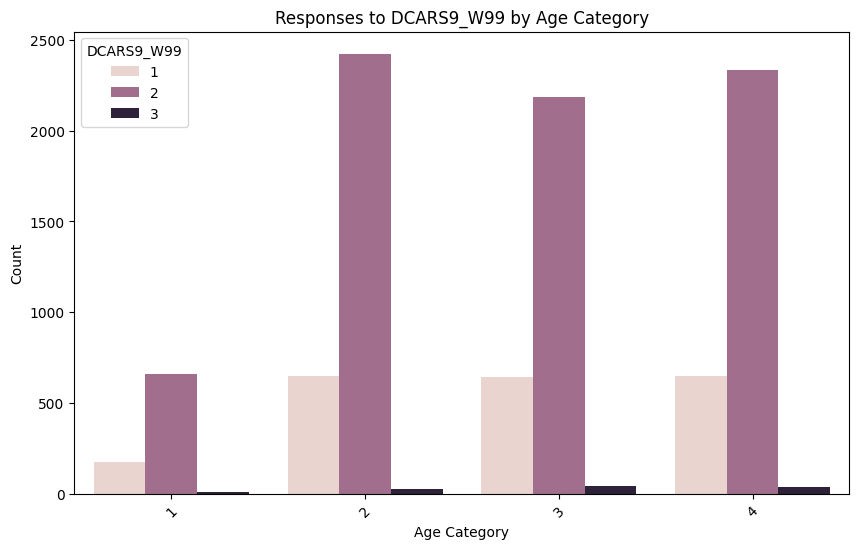

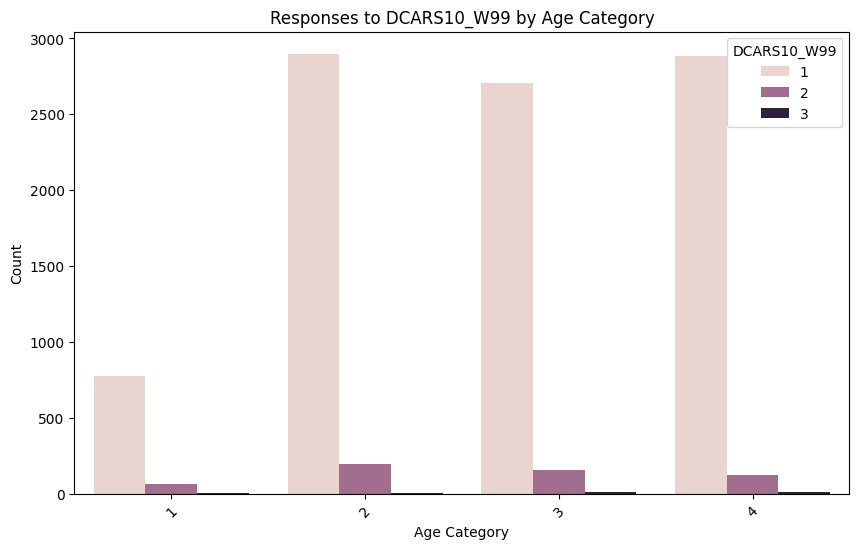

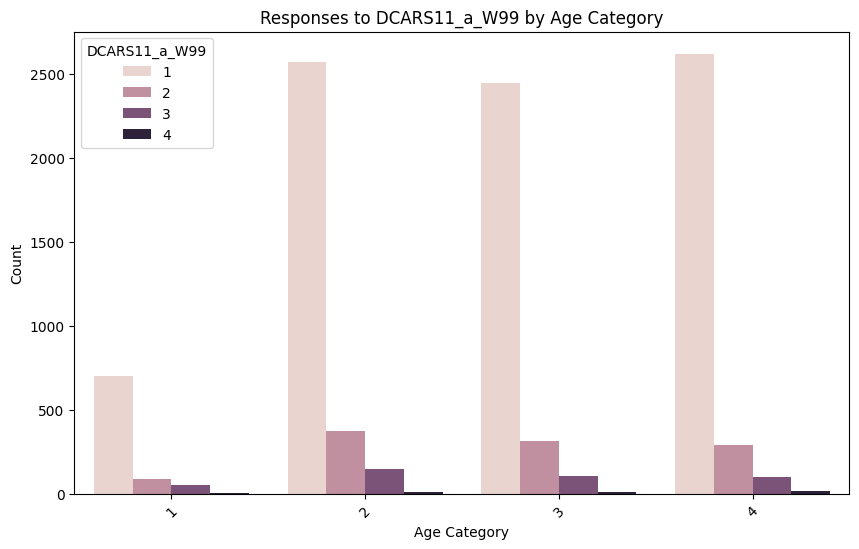

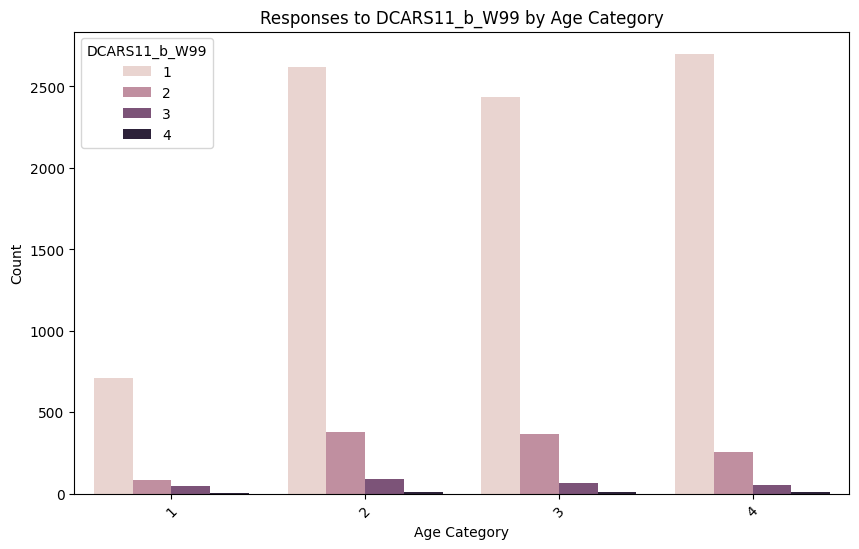

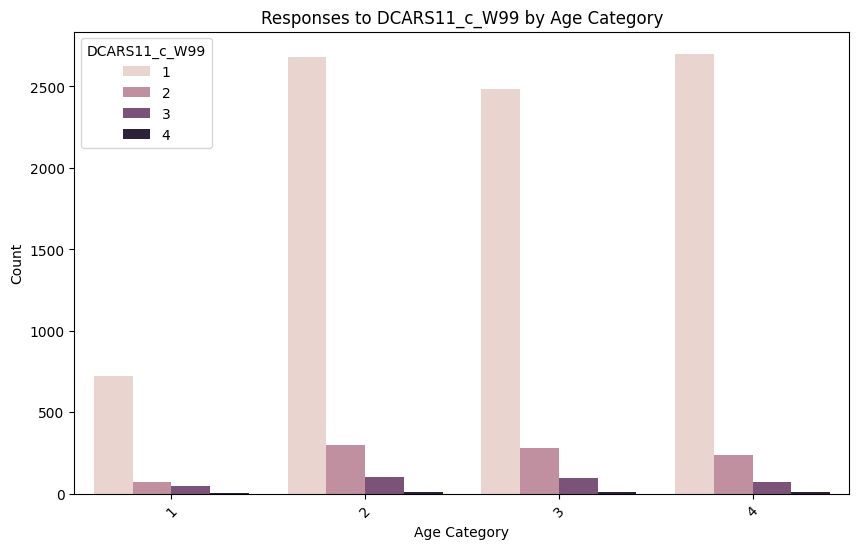

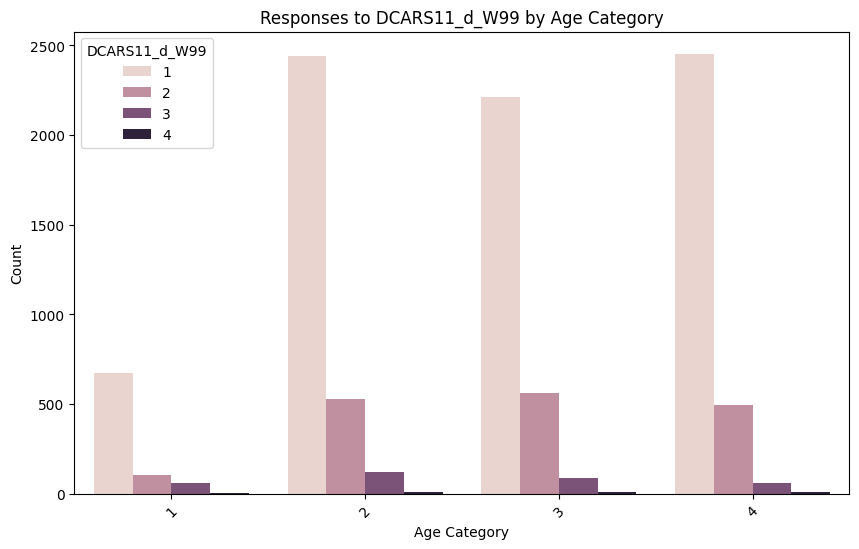

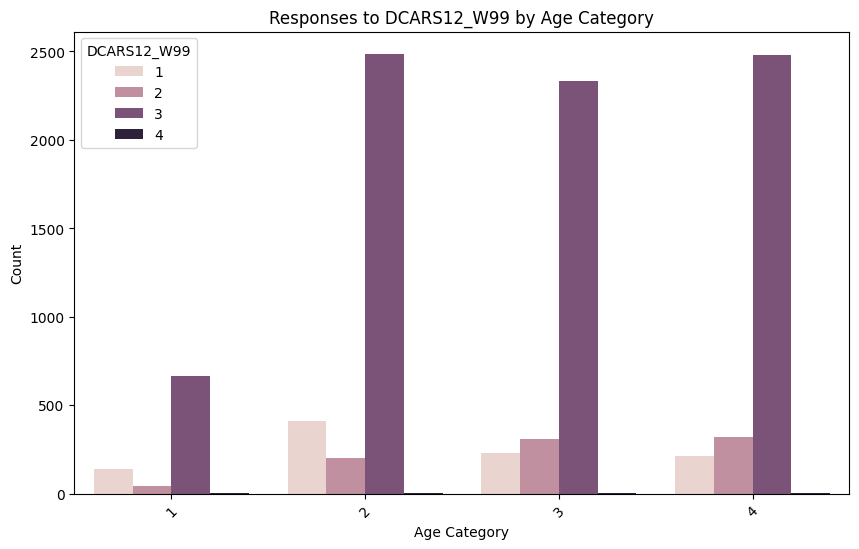

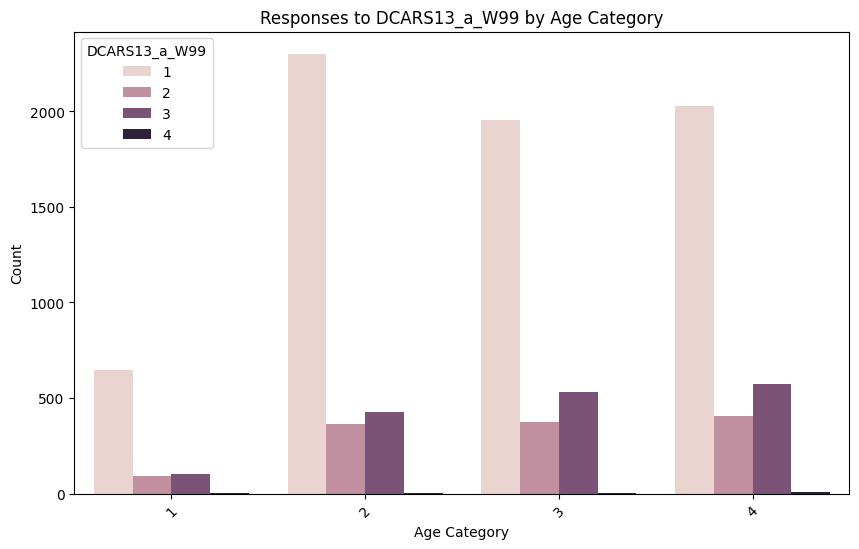

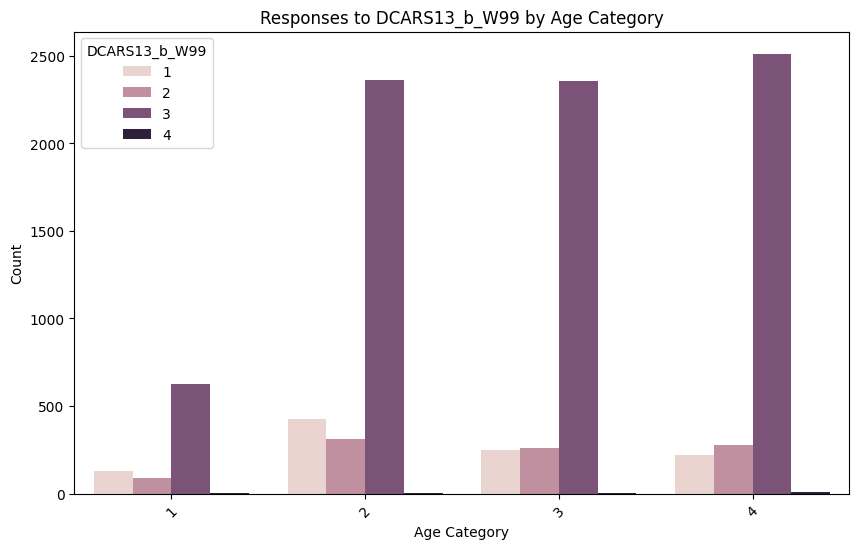

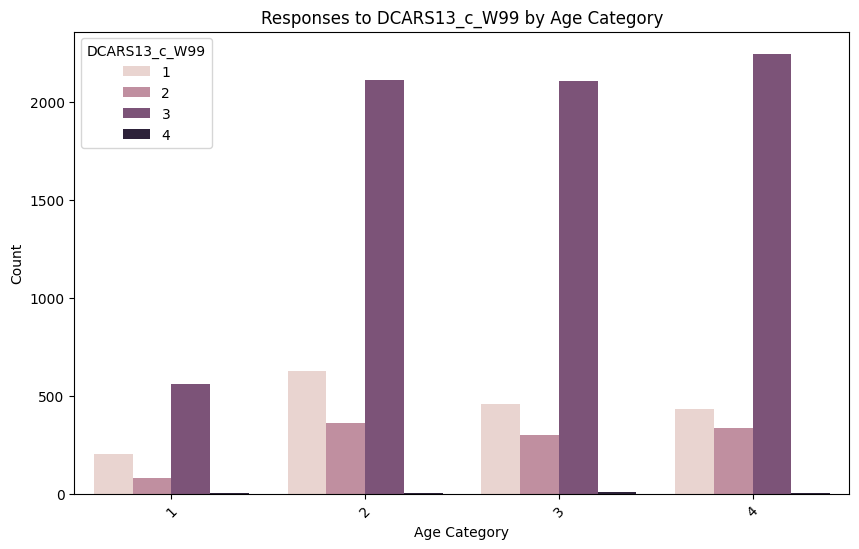

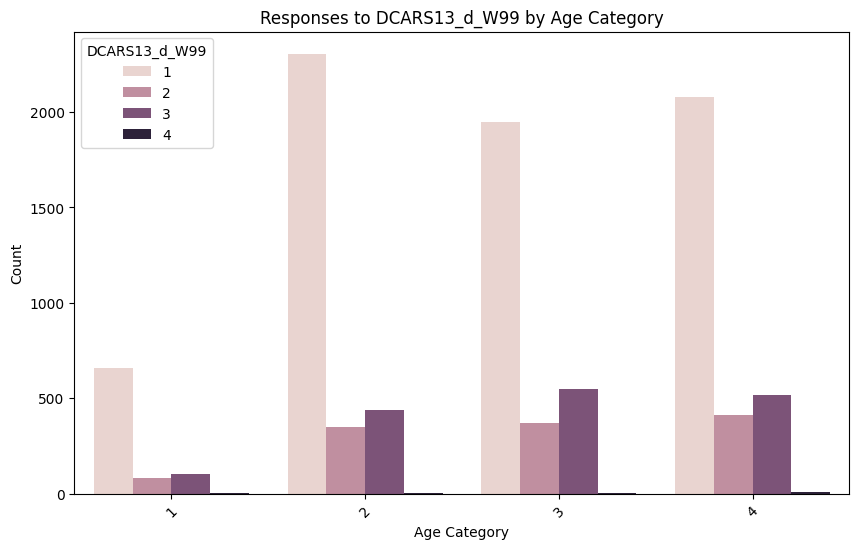

In [39]:
for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x='F_AGECAT', hue=col)
    plt.title(f'Responses to {col} by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


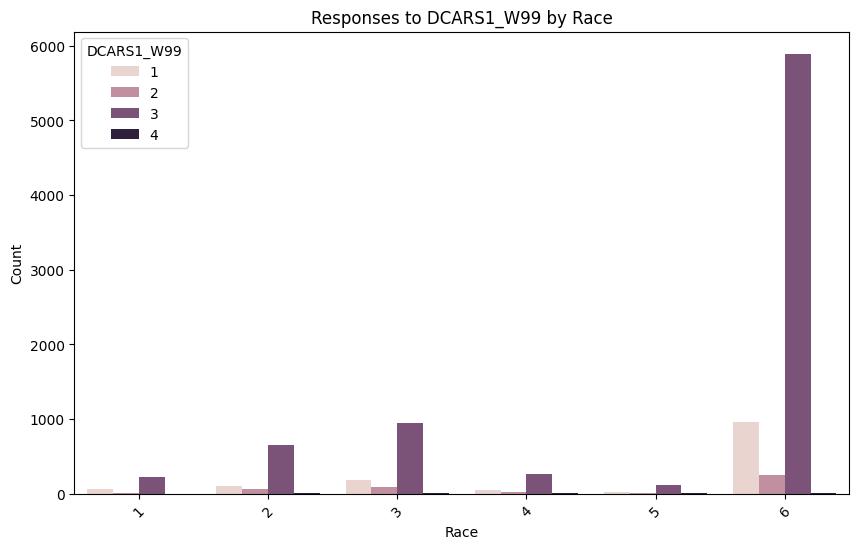

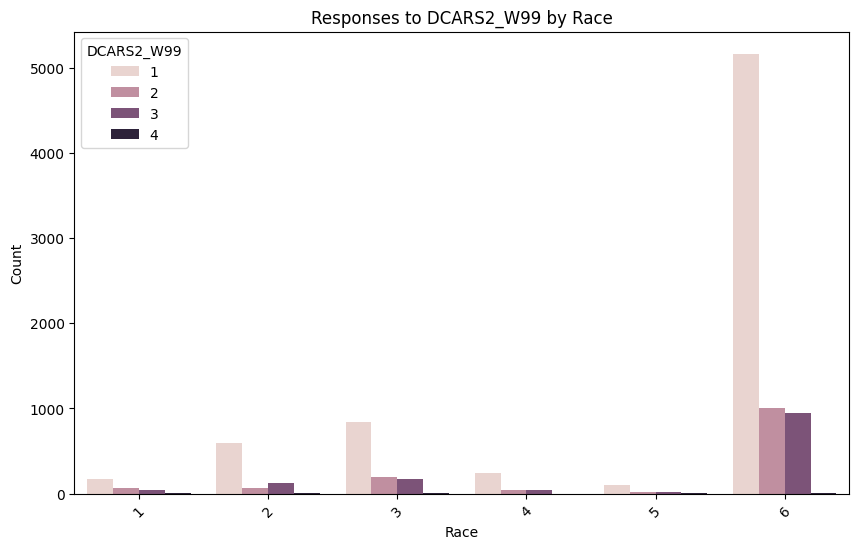

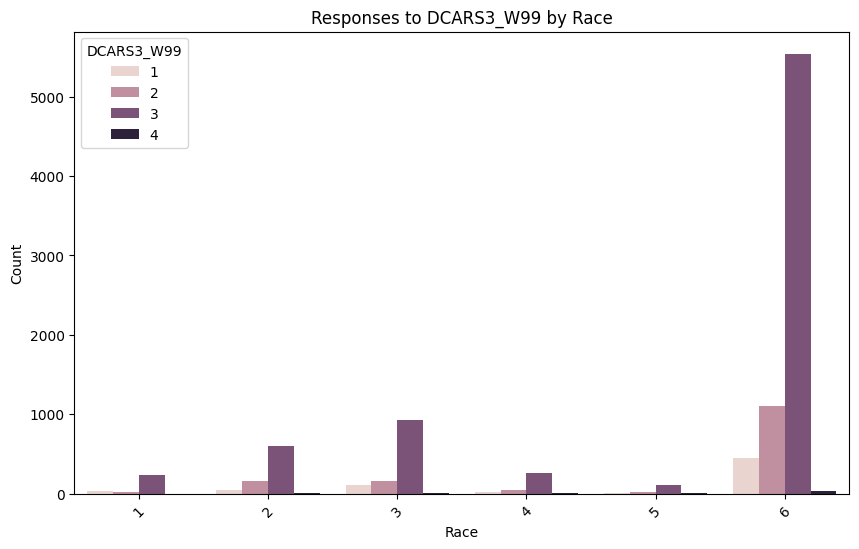

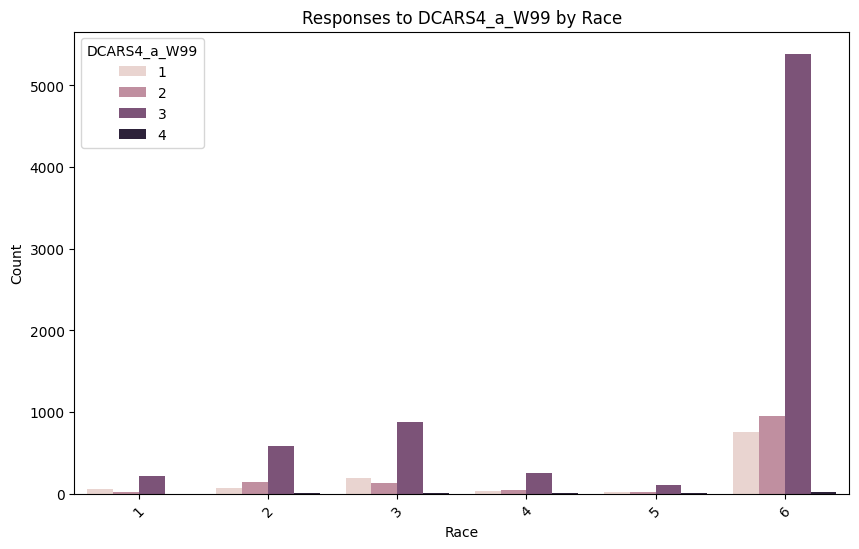

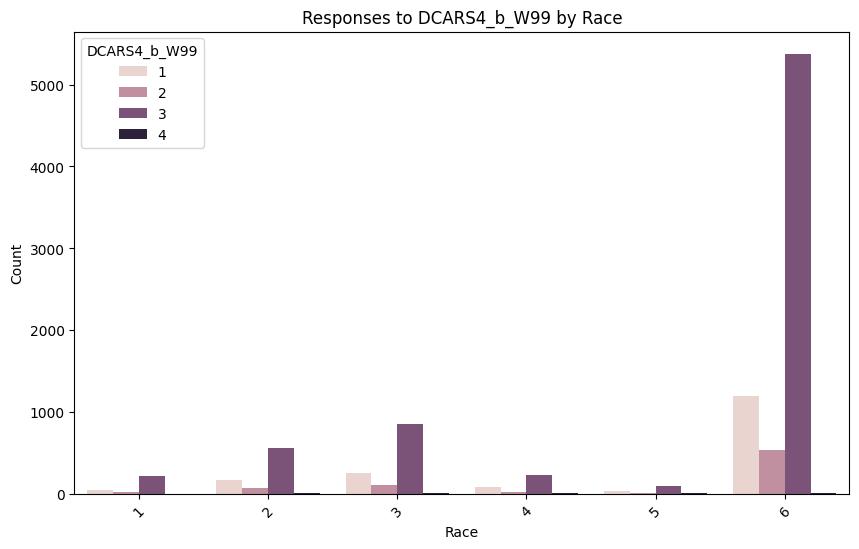

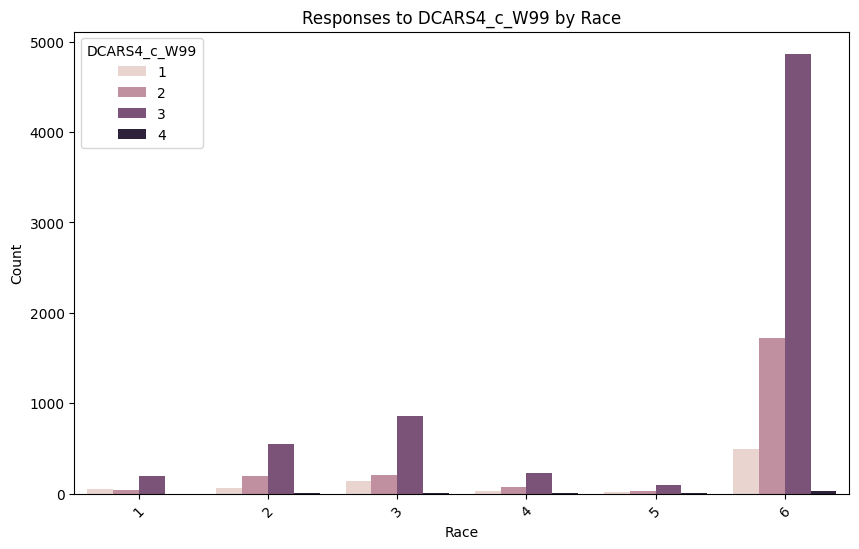

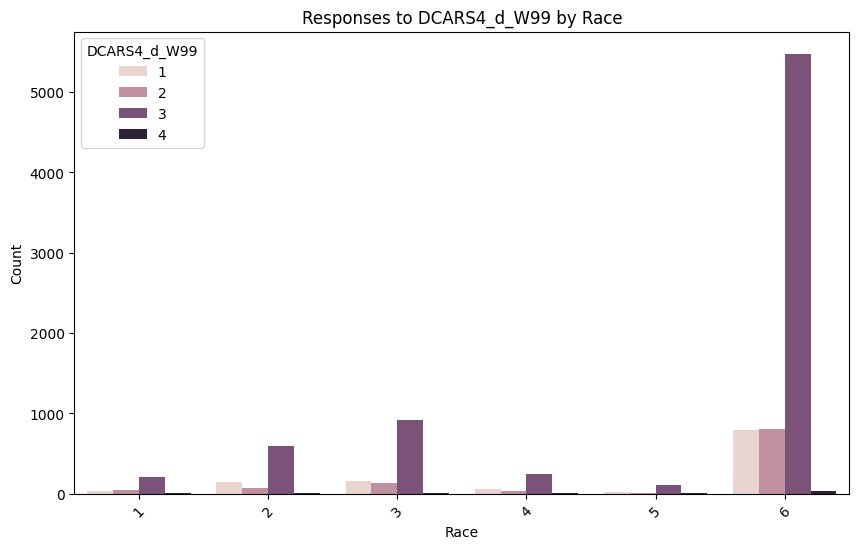

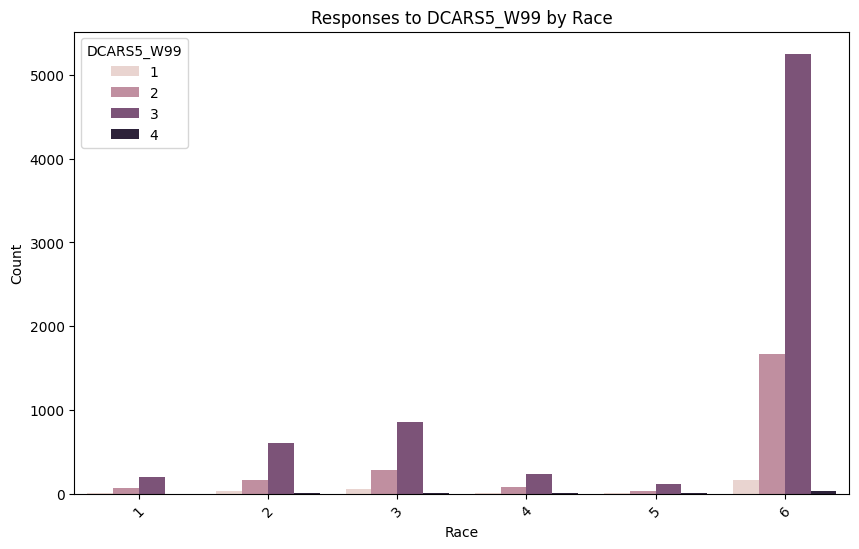

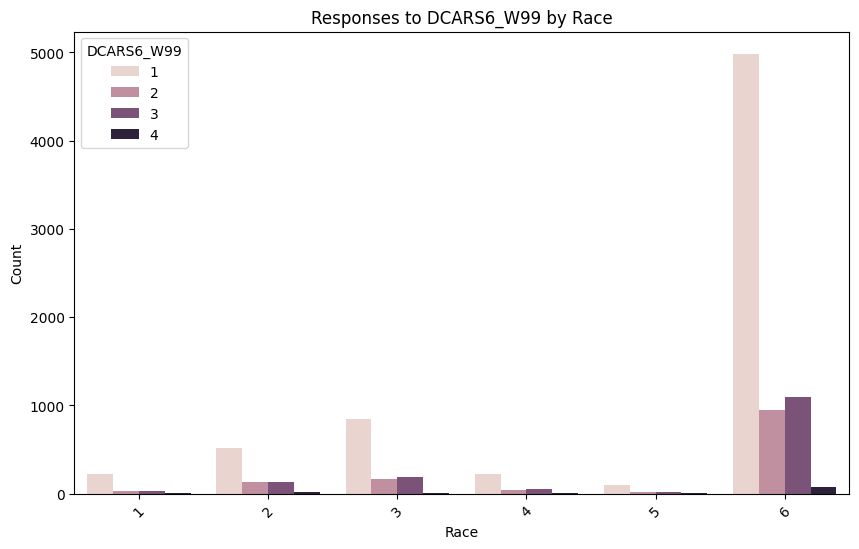

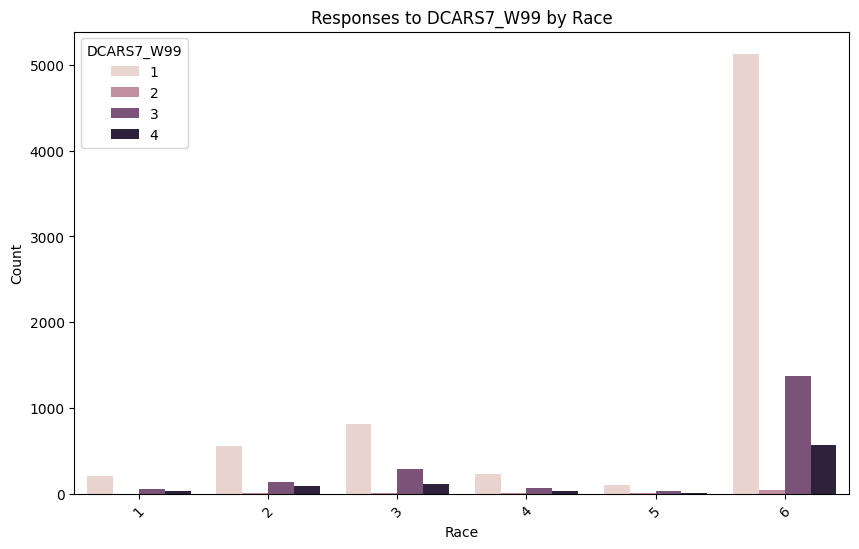

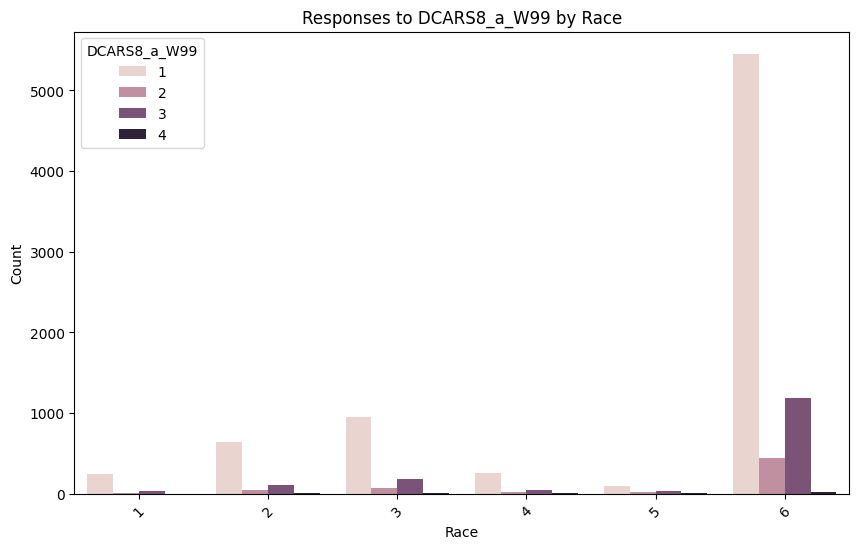

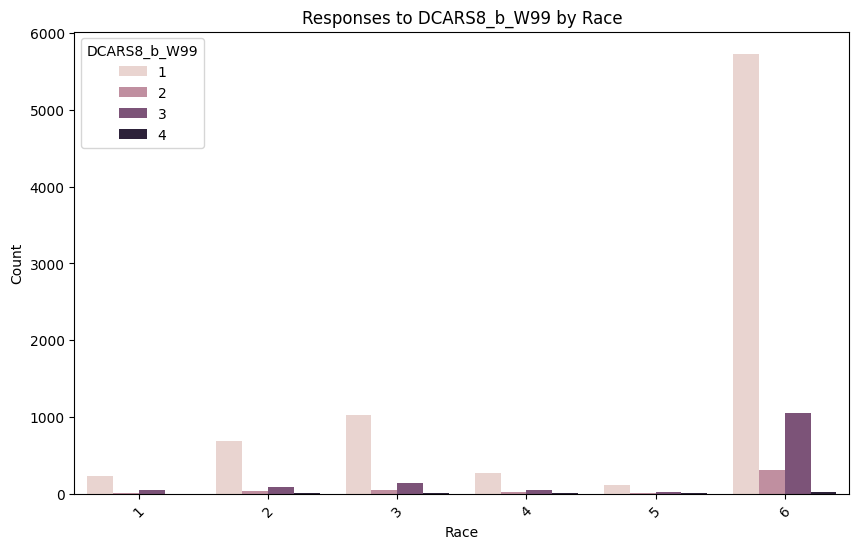

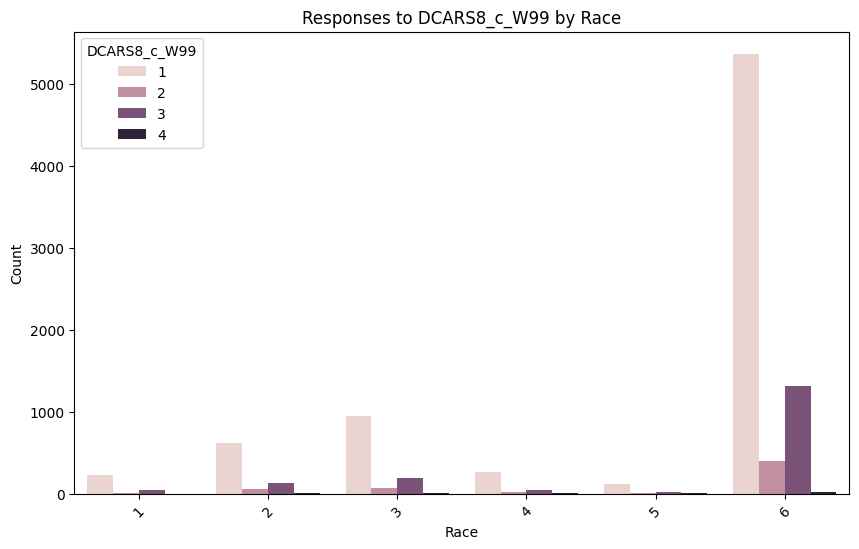

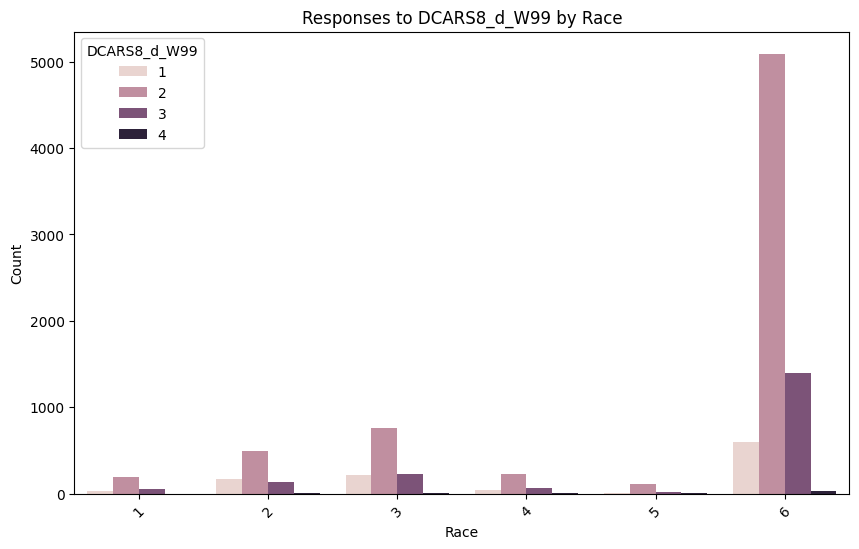

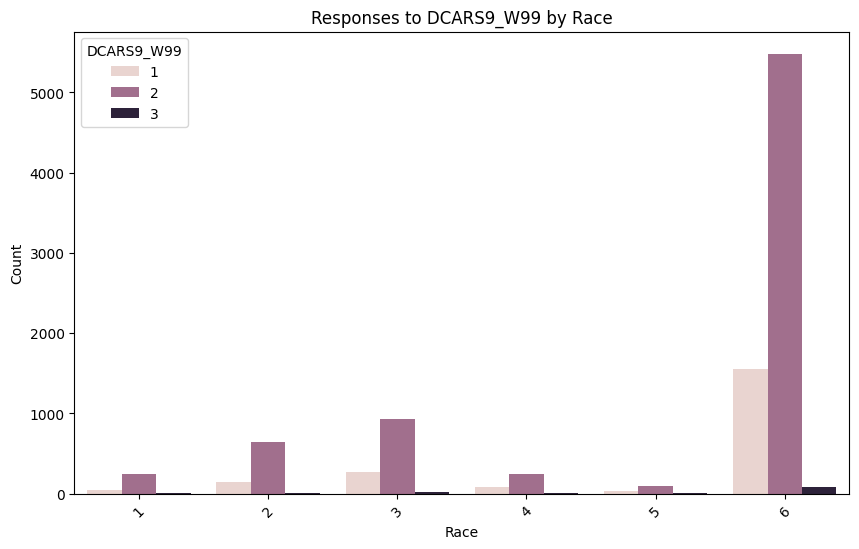

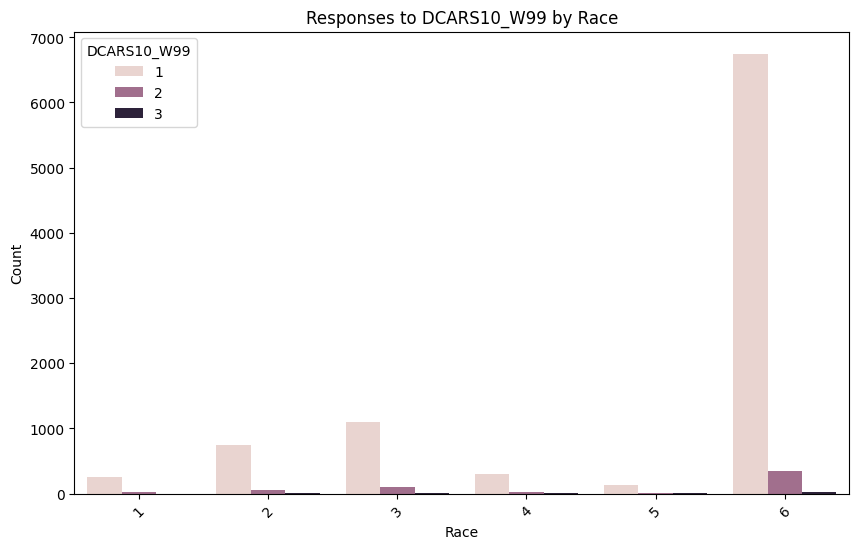

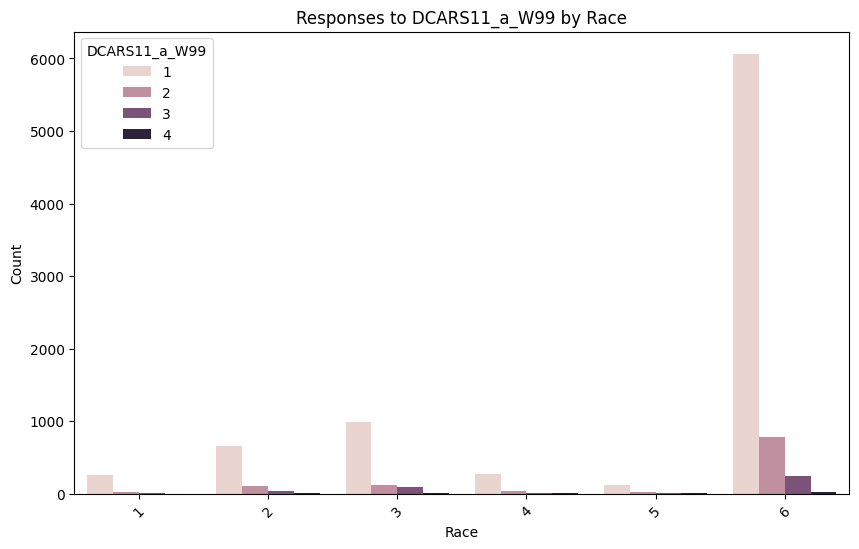

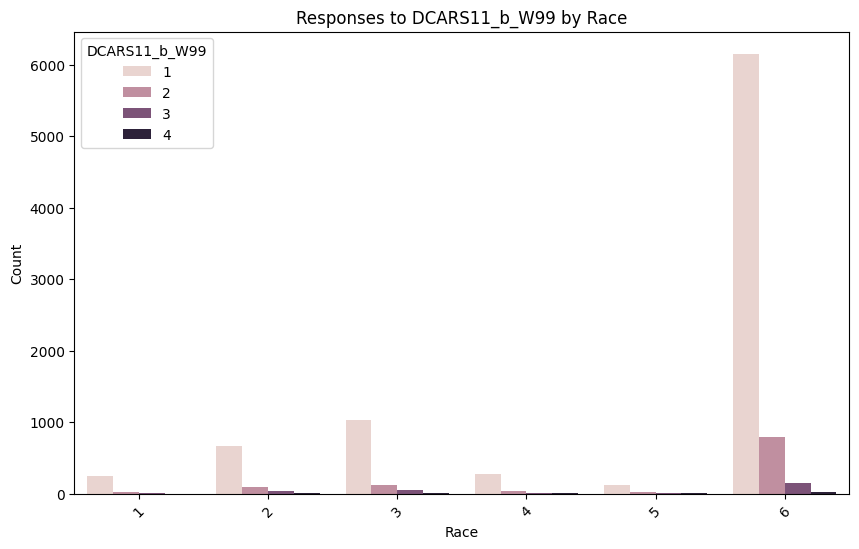

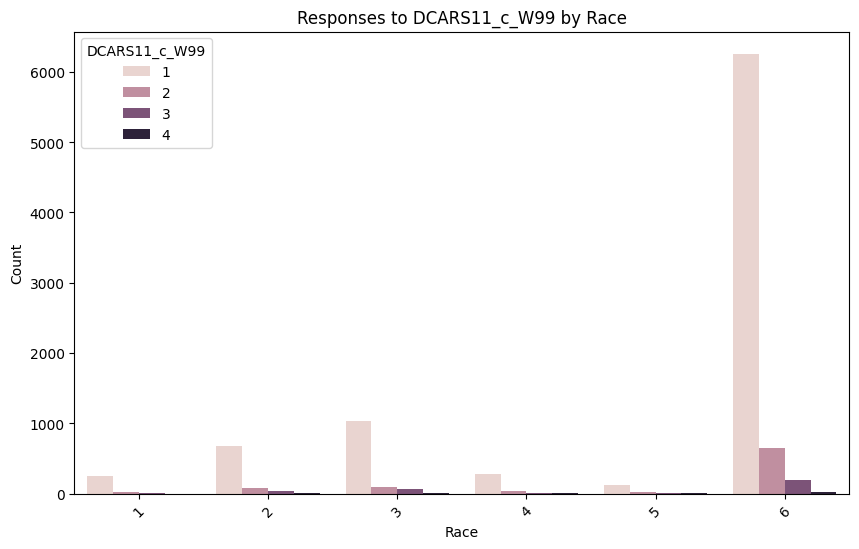

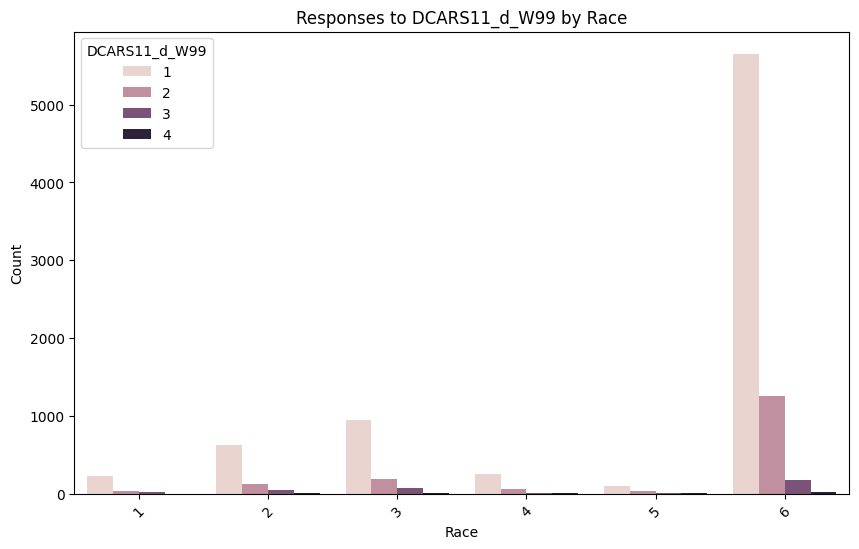

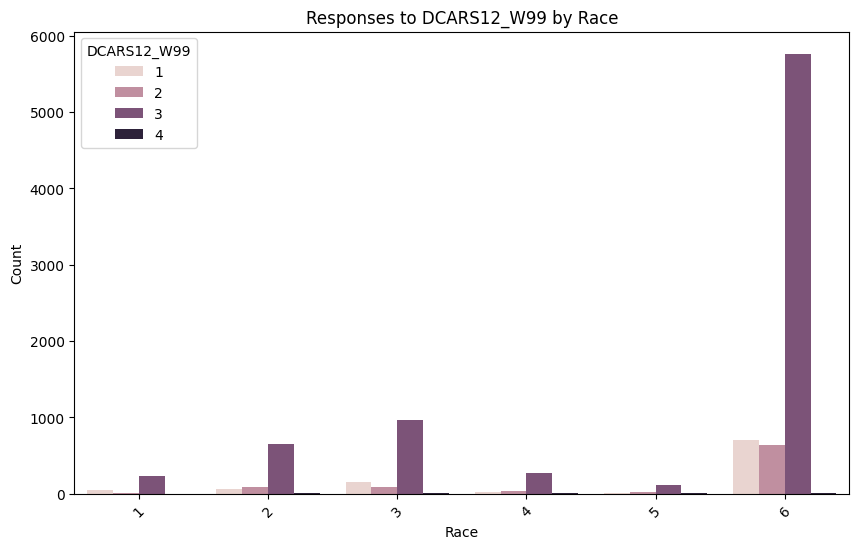

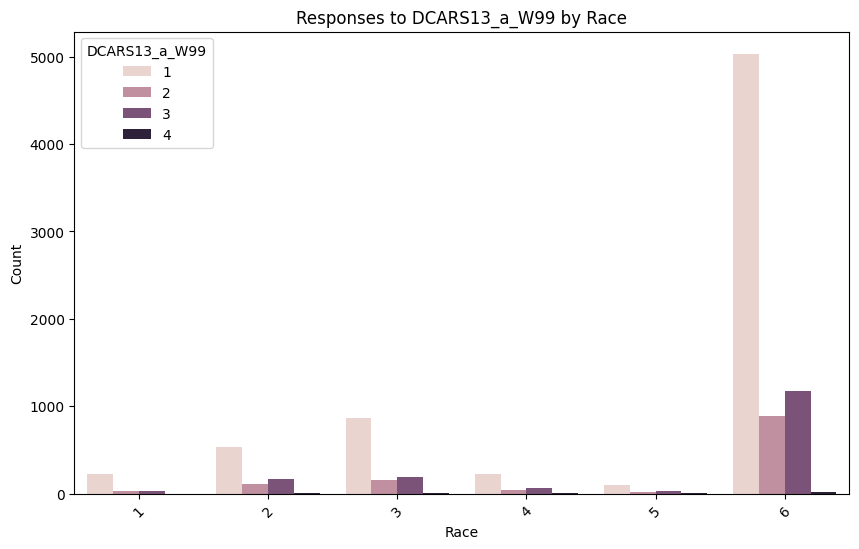

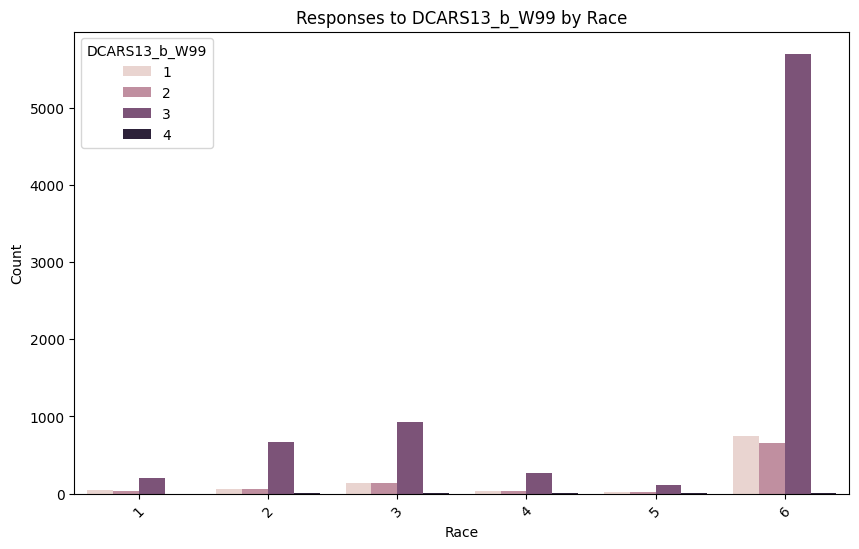

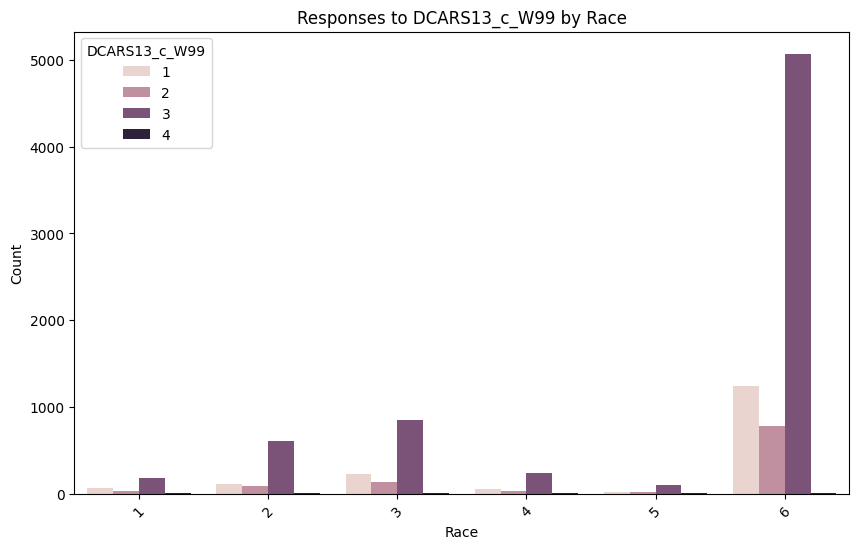

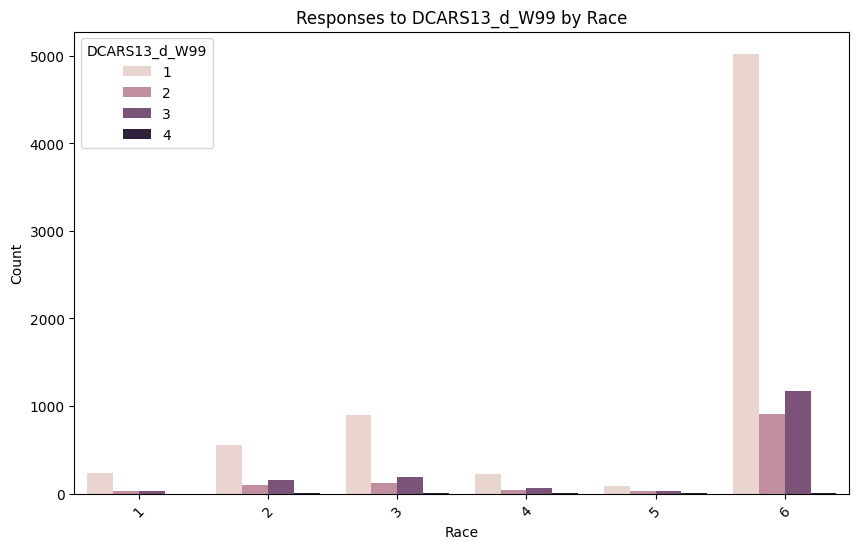

In [40]:

# List of columns to categorize
dcars_columns = [col for col in df_dropped.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_RACETHNMOD', hue=col)
    plt.title(f'Responses to {col} by Race')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


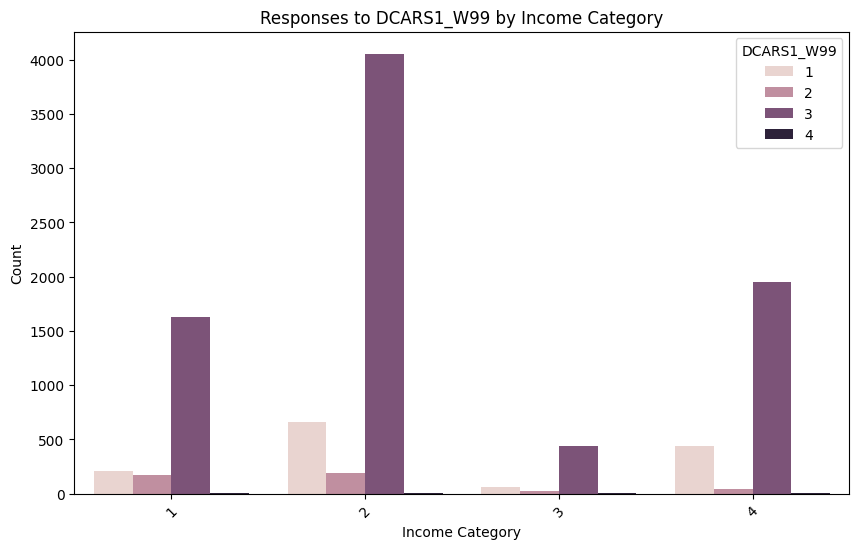

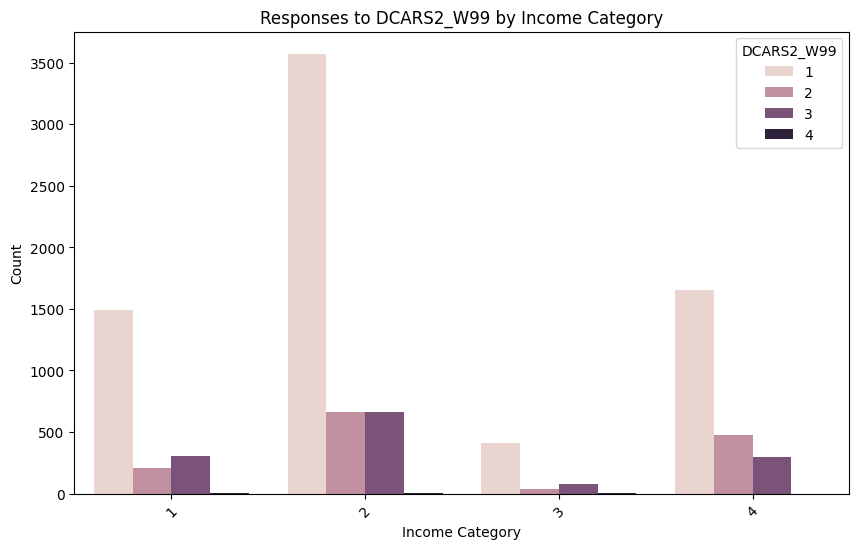

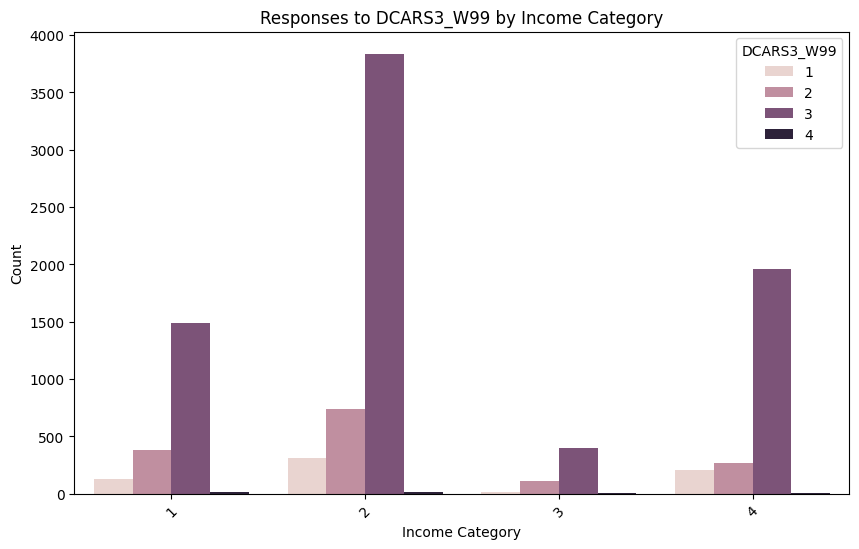

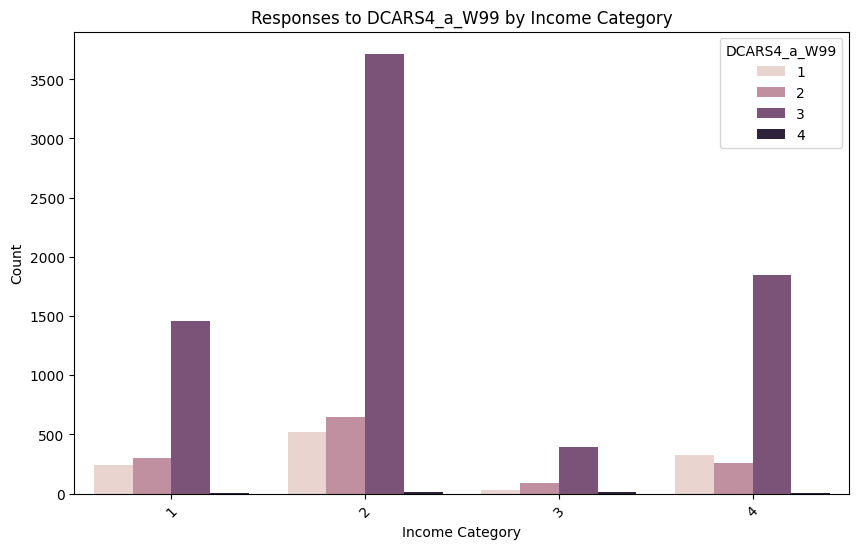

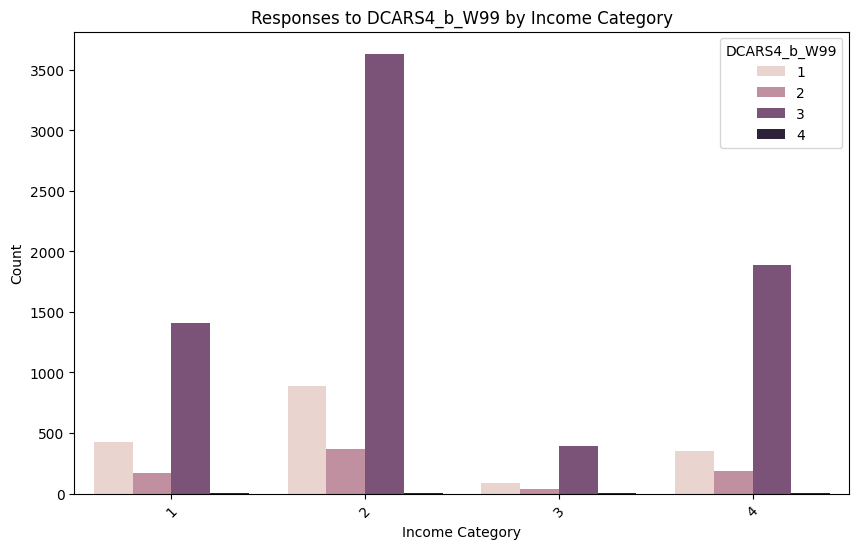

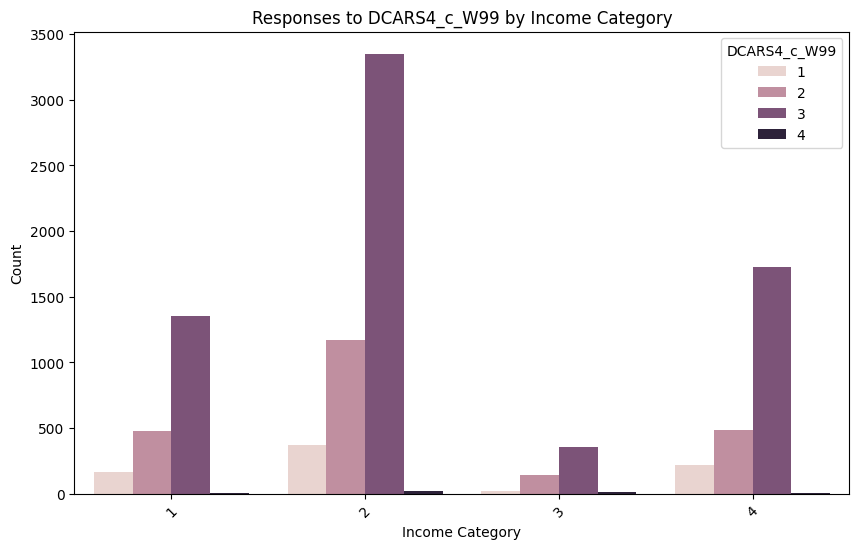

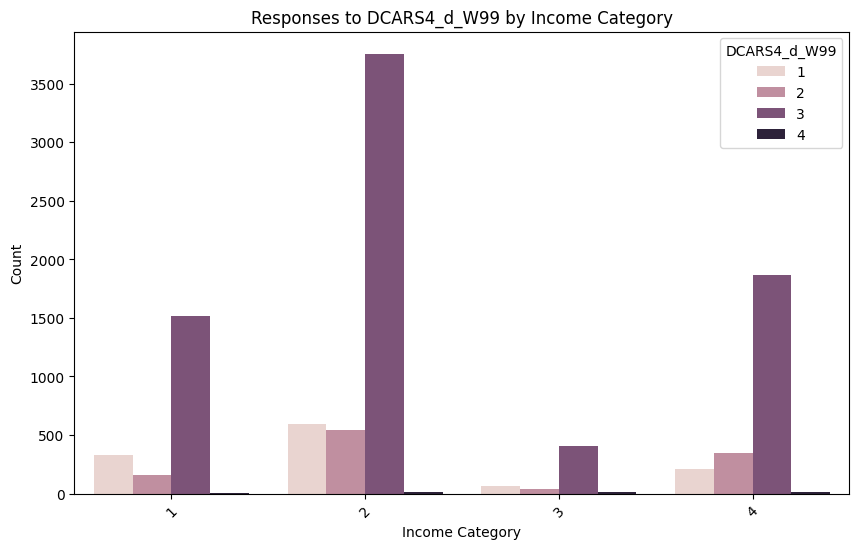

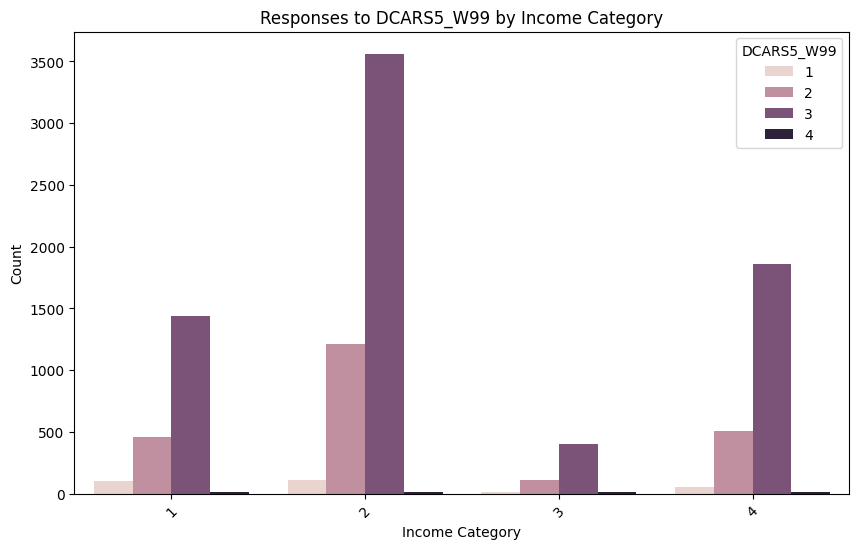

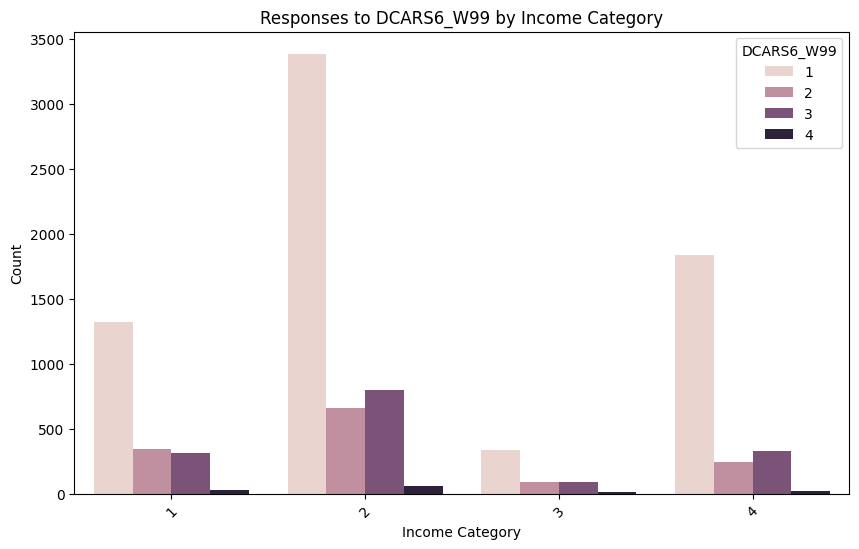

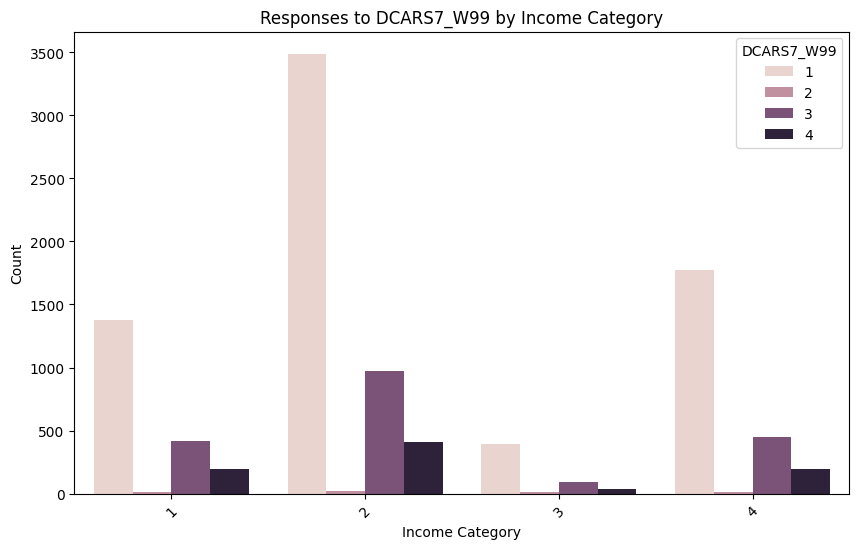

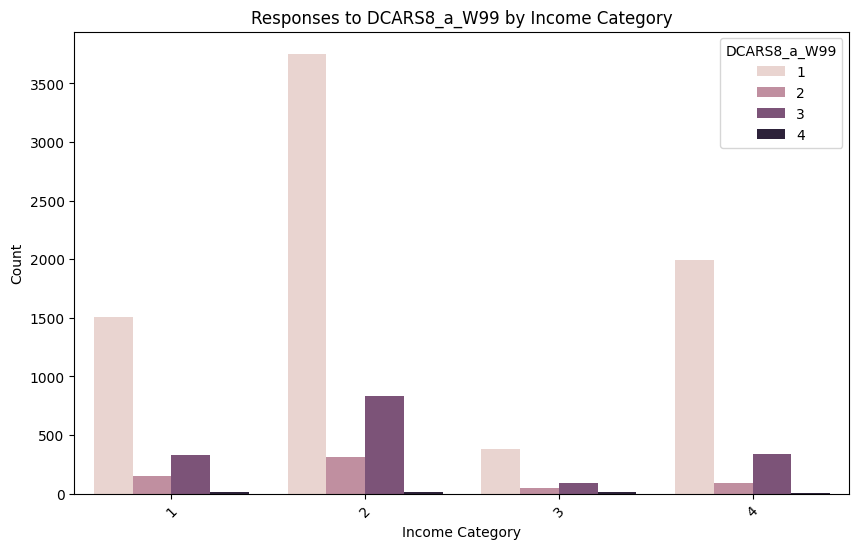

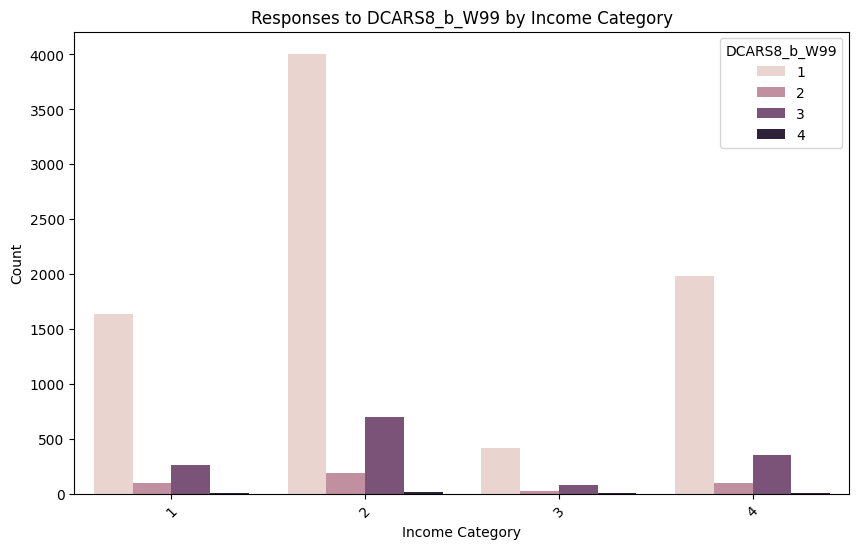

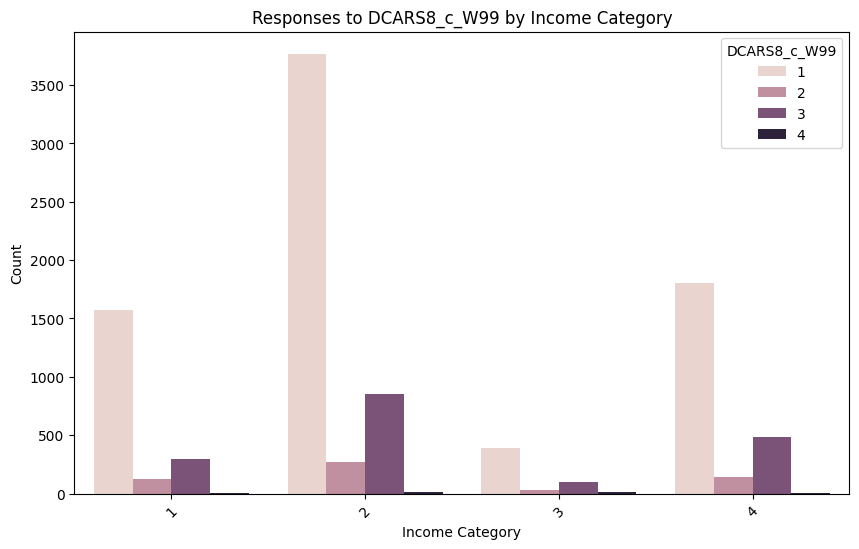

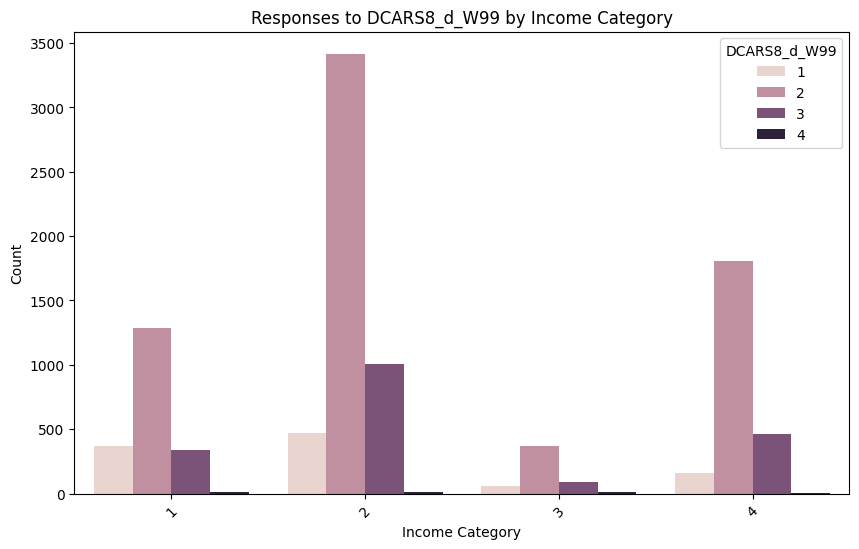

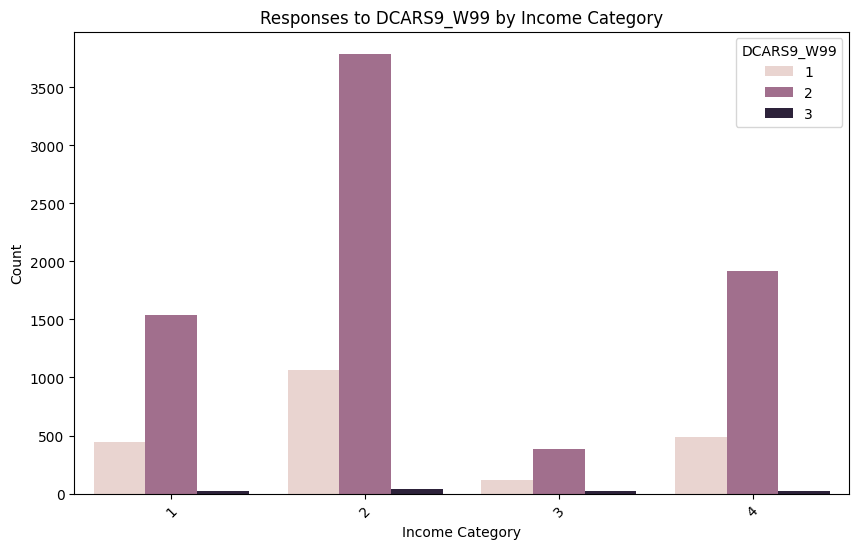

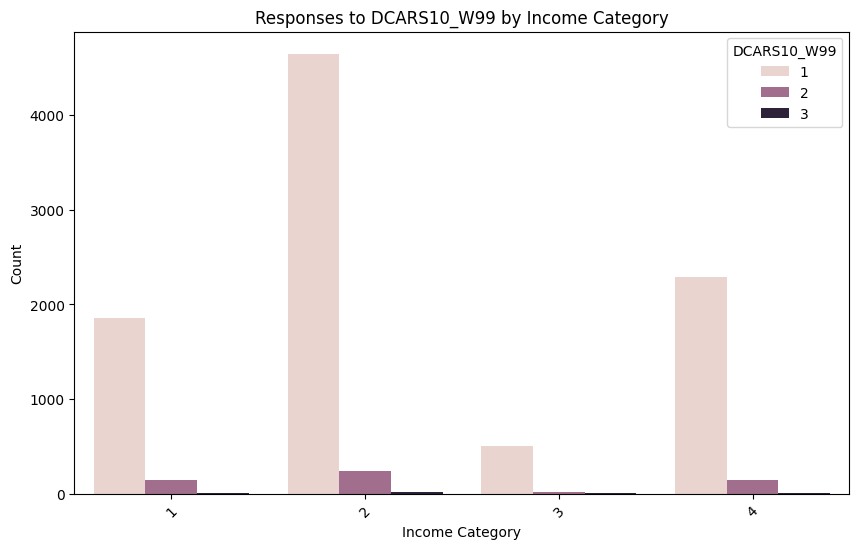

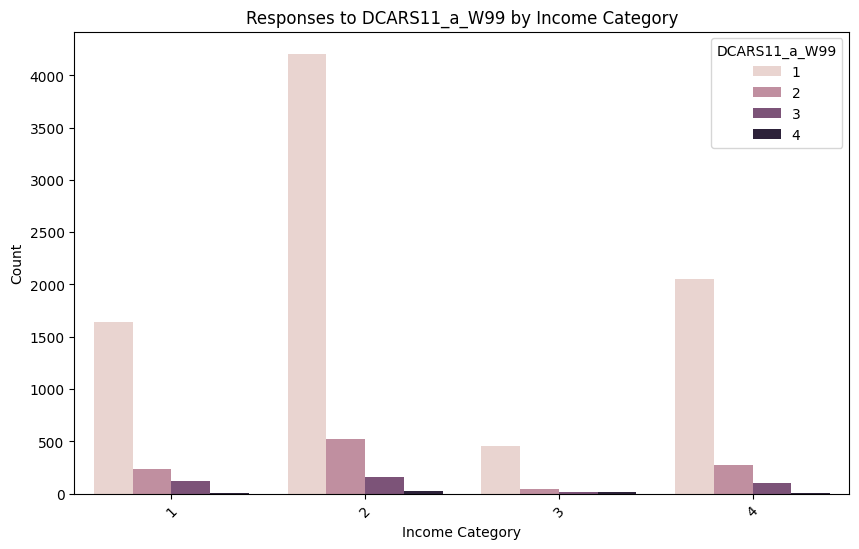

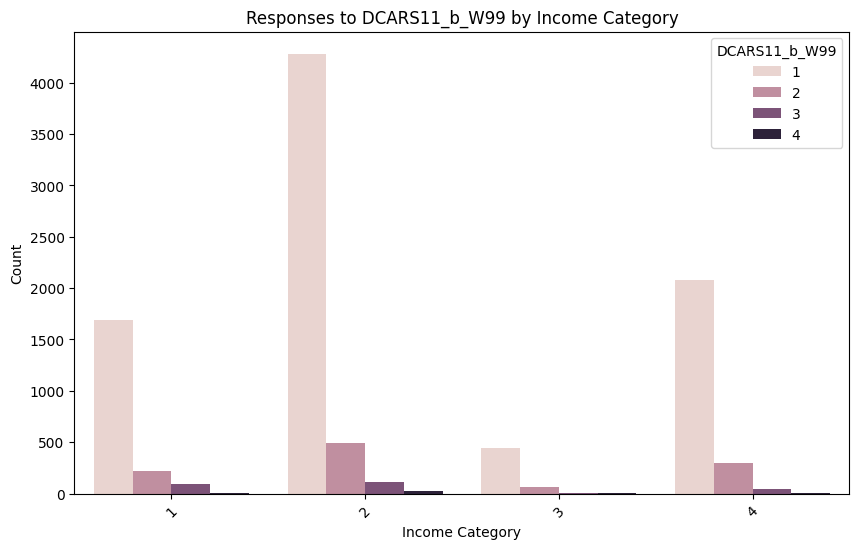

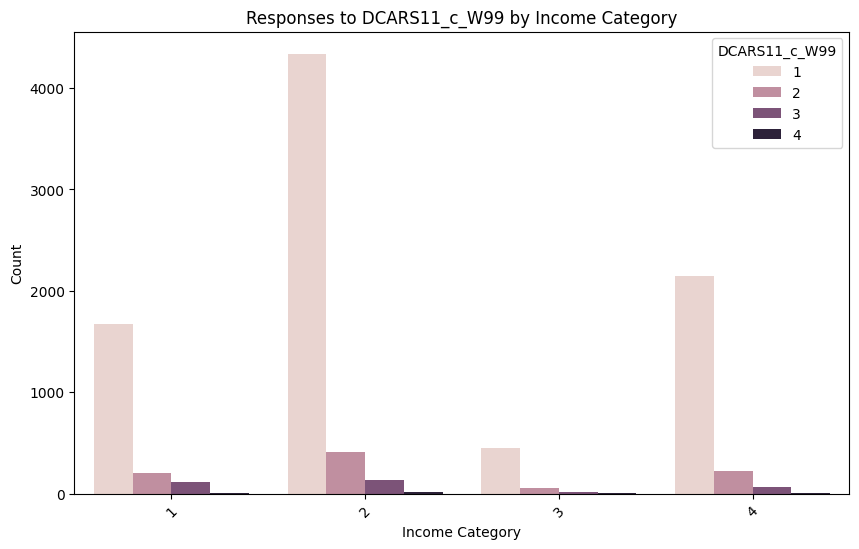

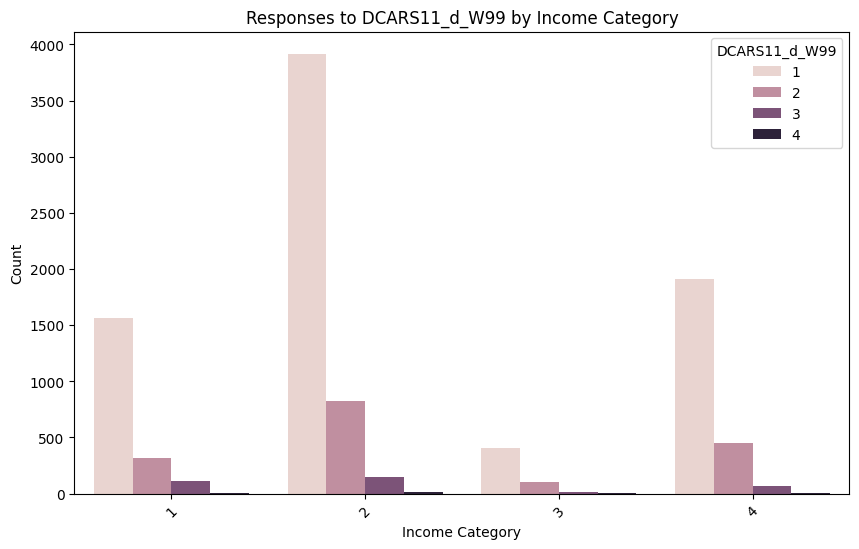

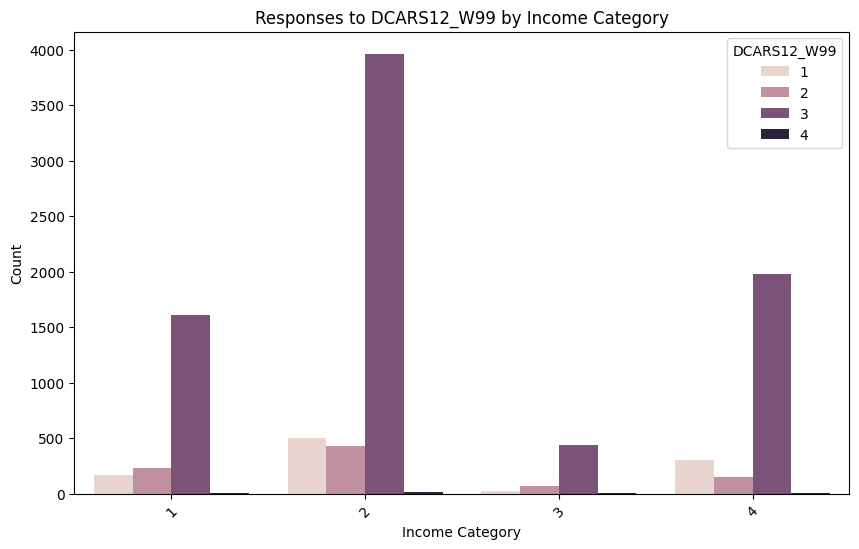

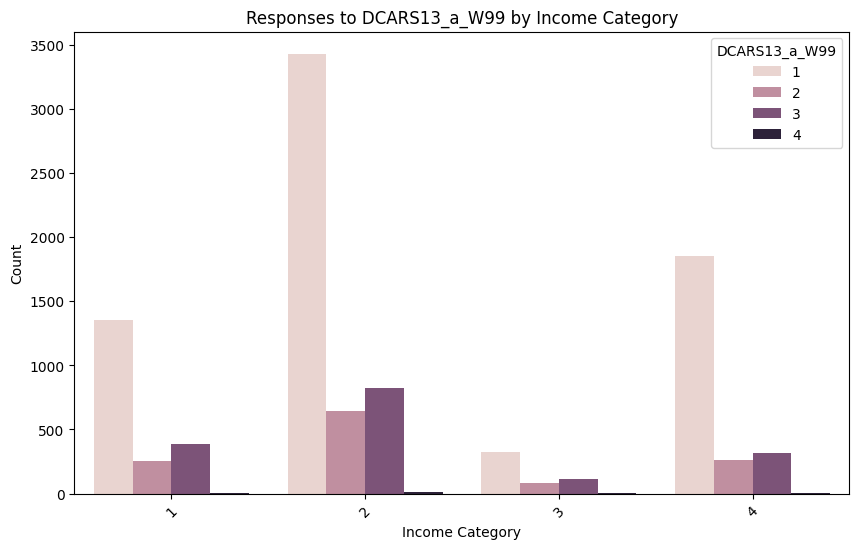

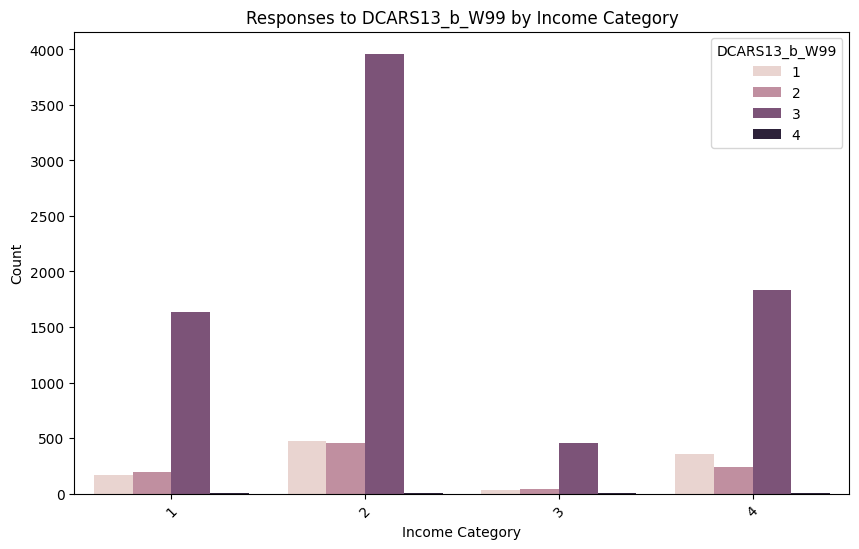

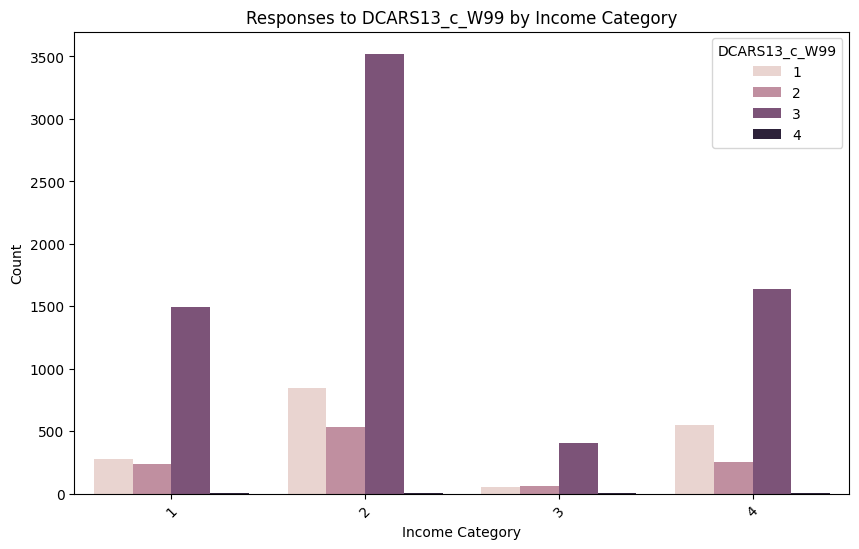

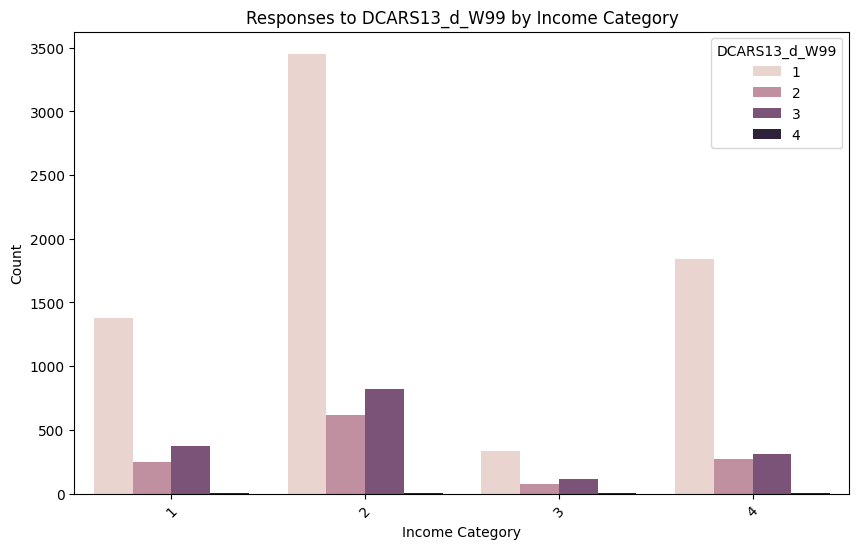

In [41]:
# List of columns to categorize
dcars_columns = [col for col in df_dropped.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_INC_TIER2', hue=col)
    plt.title(f'Responses to {col} by Income Category')
    plt.xlabel('Income Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


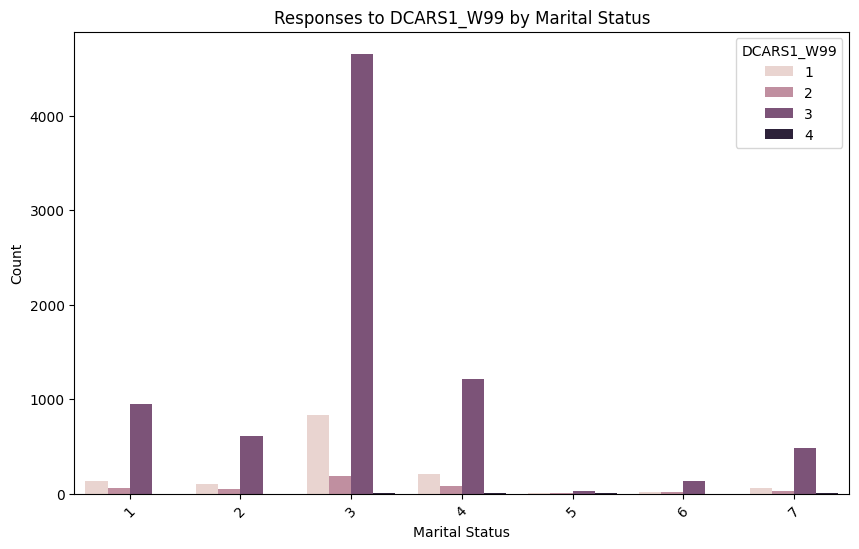

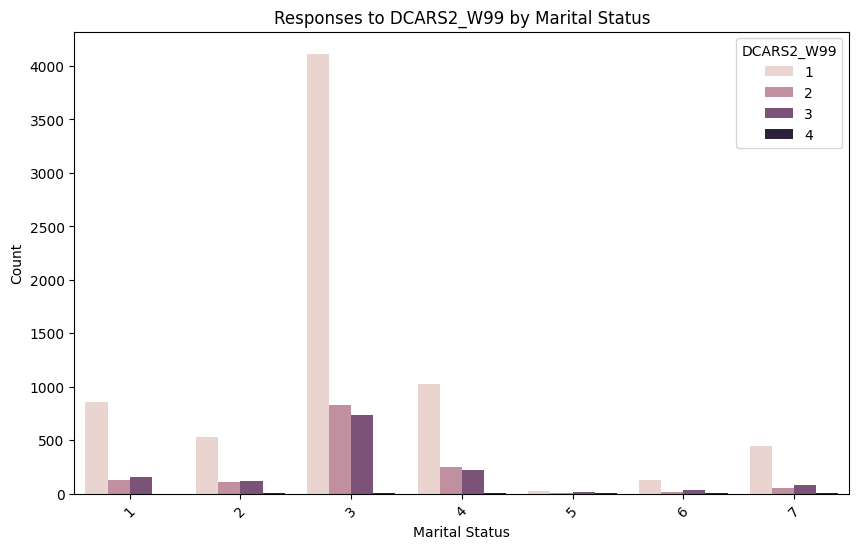

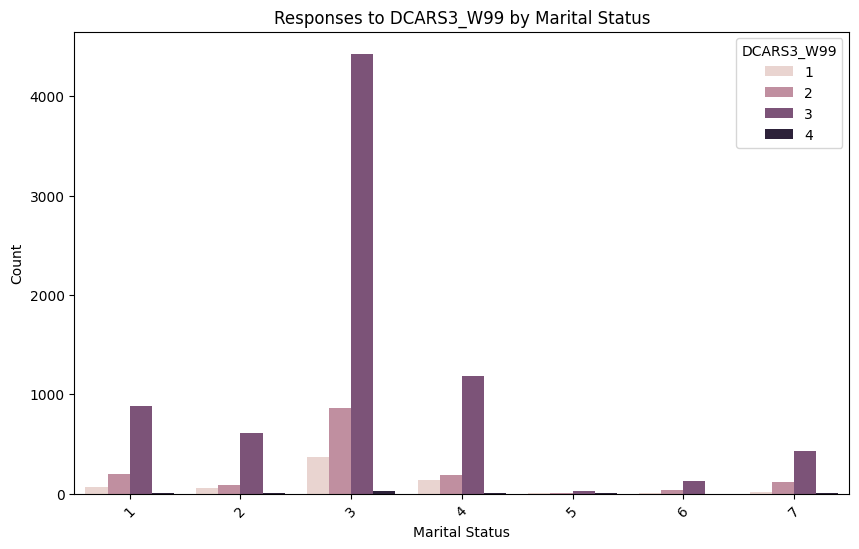

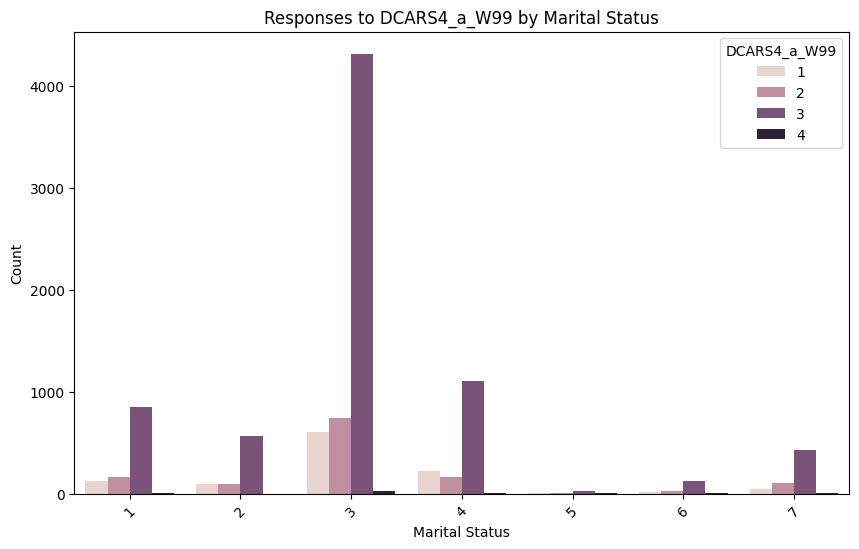

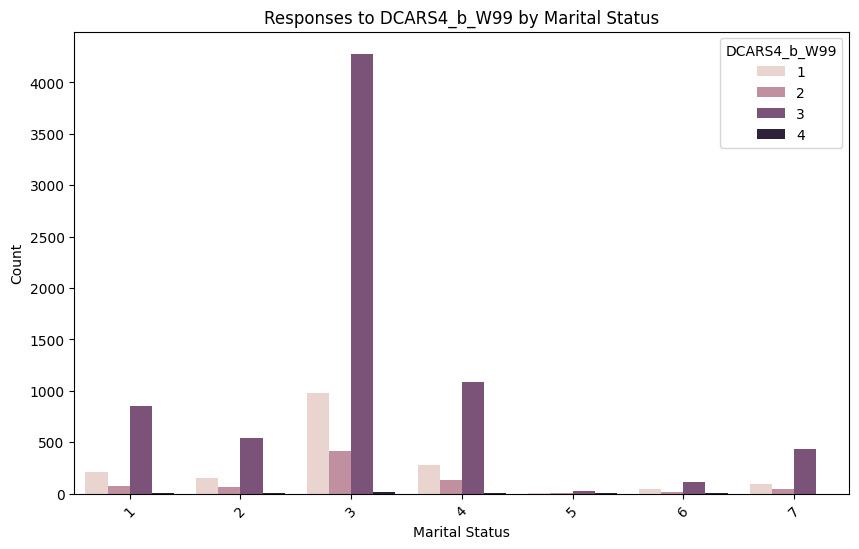

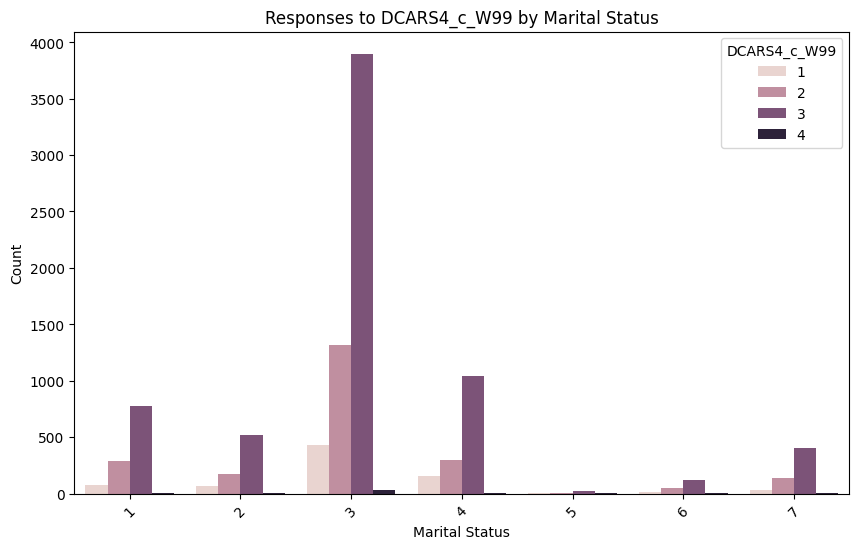

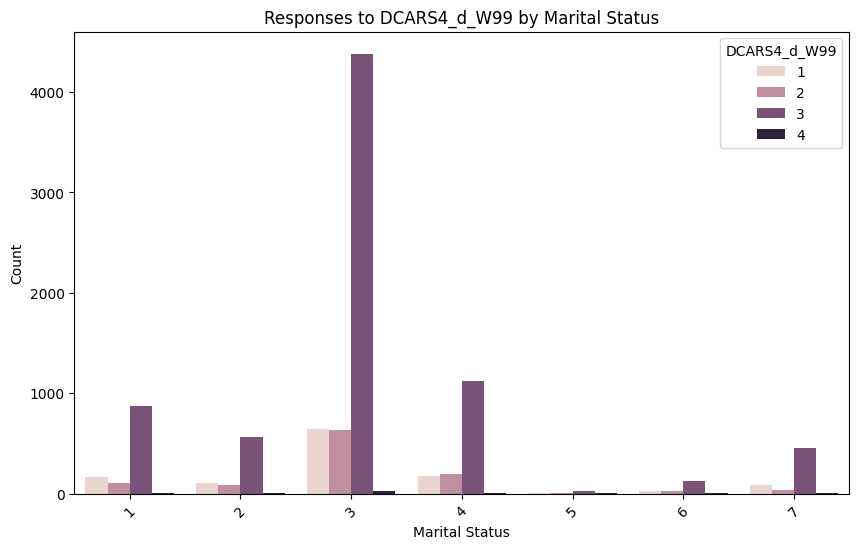

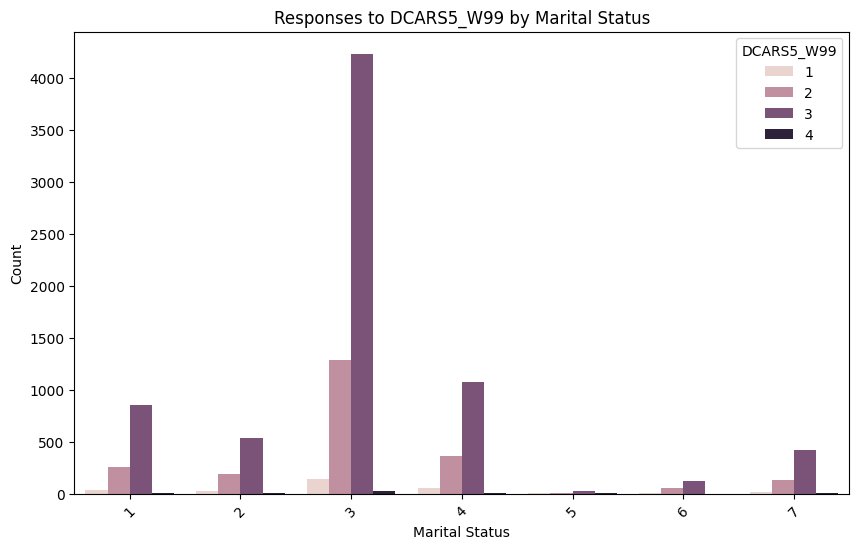

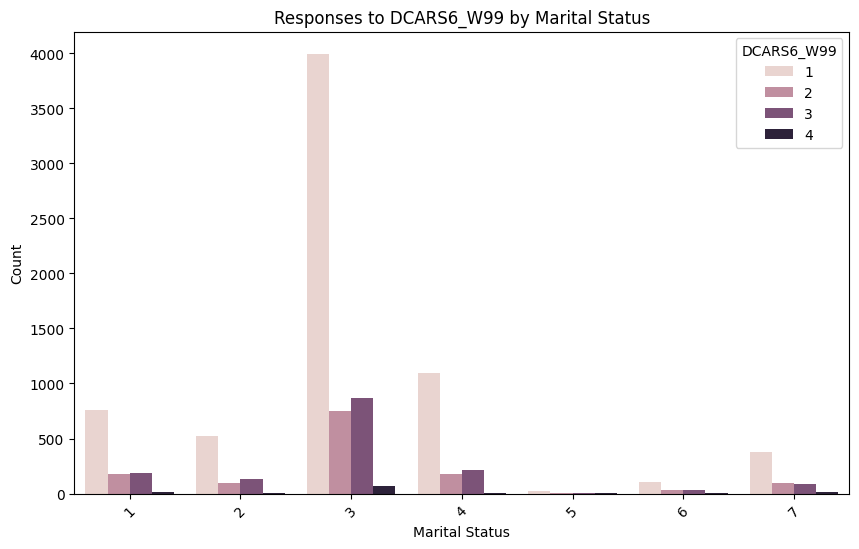

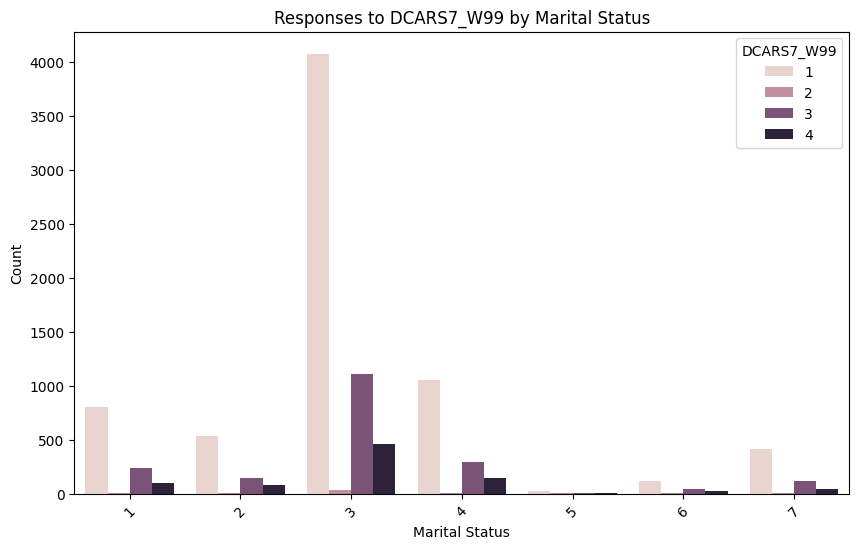

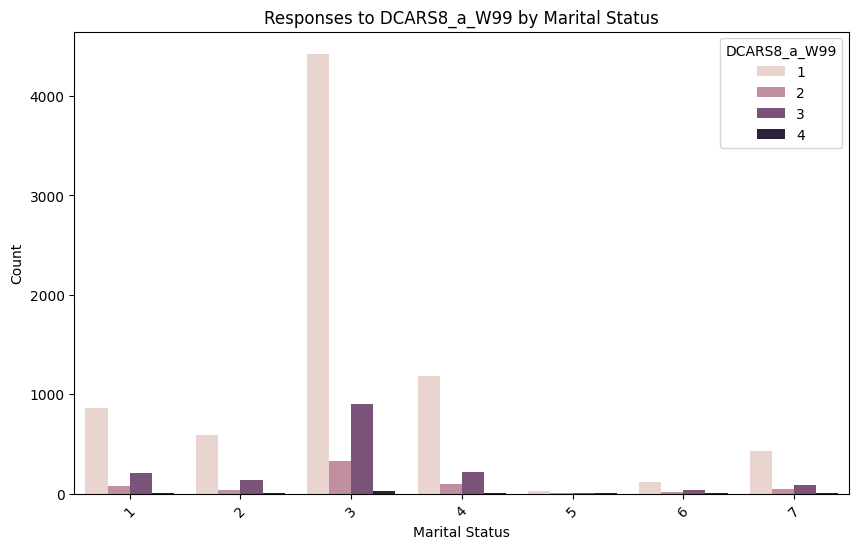

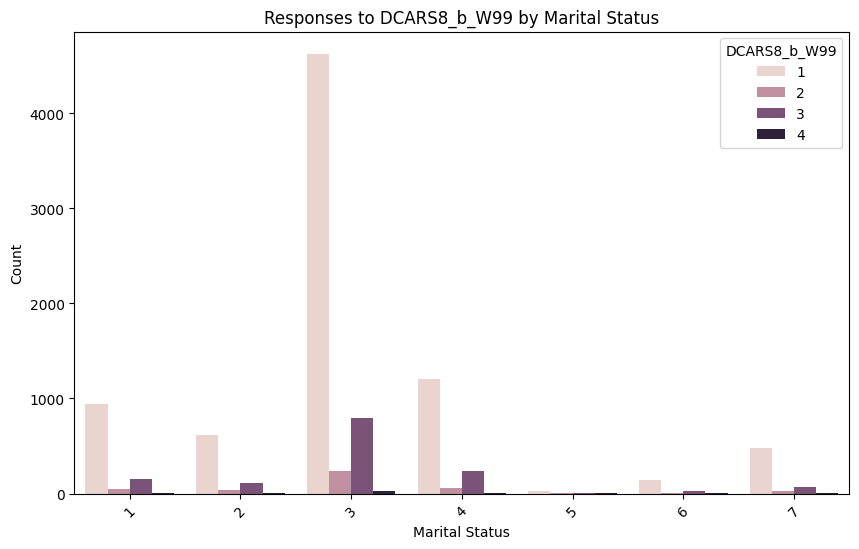

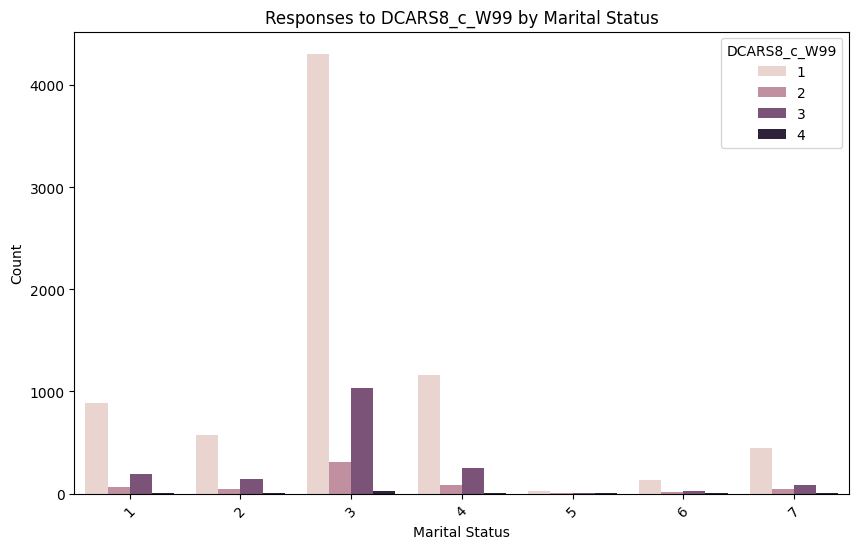

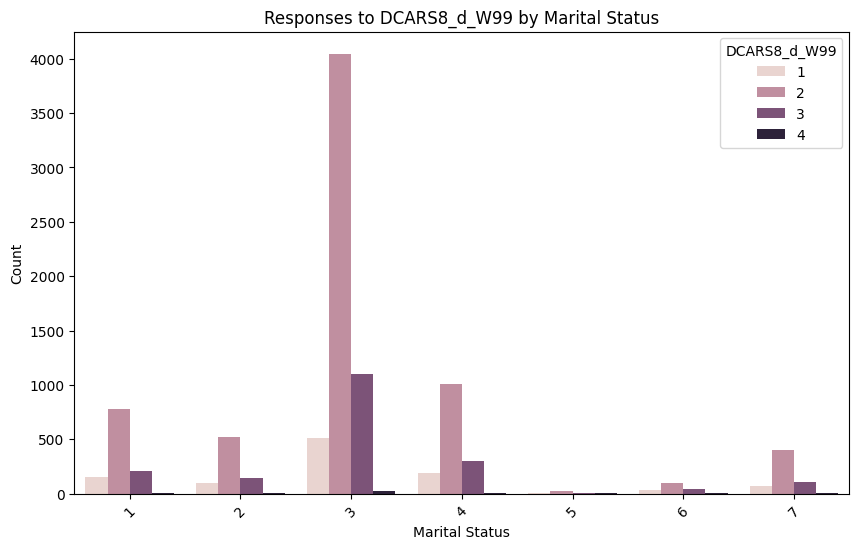

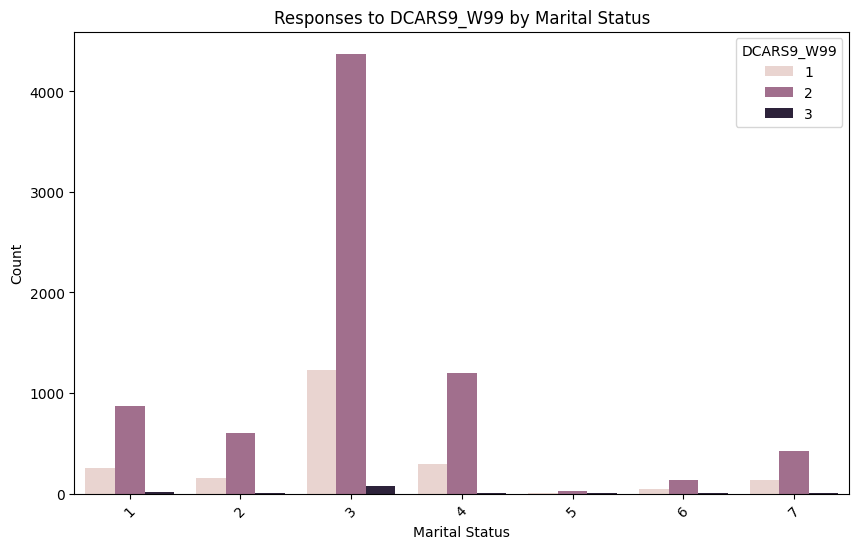

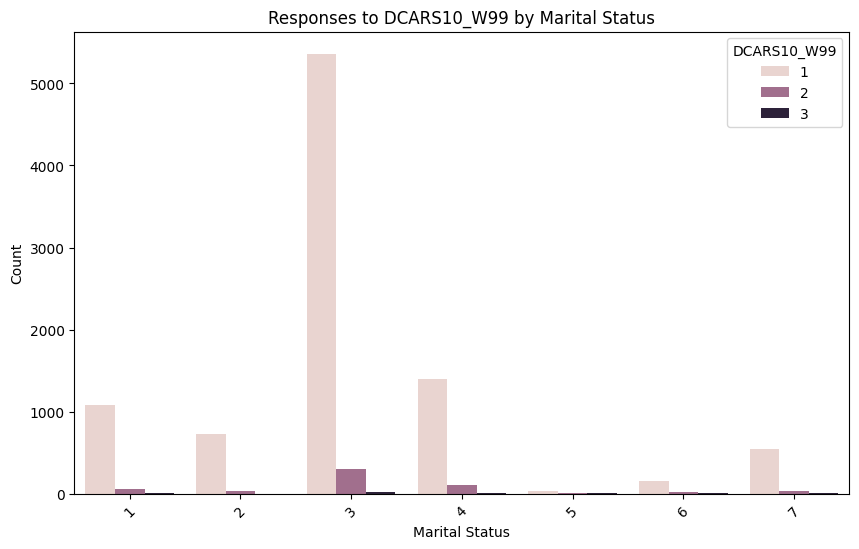

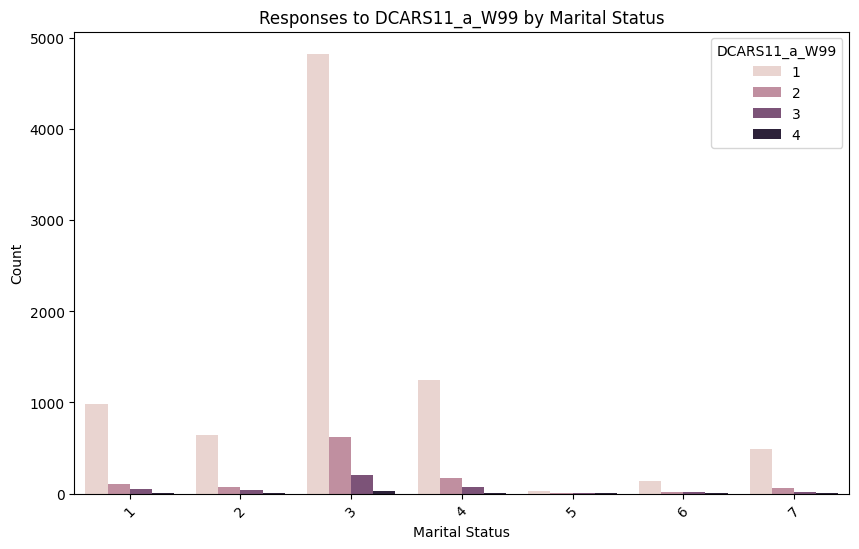

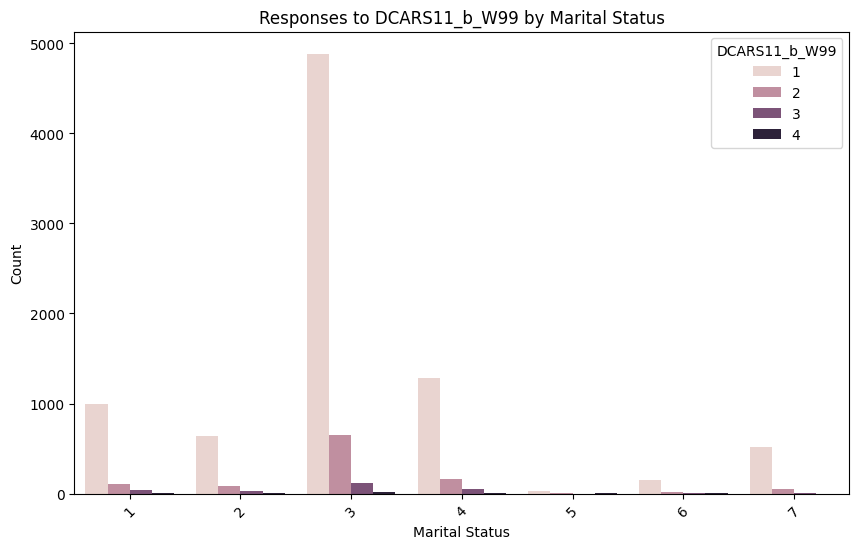

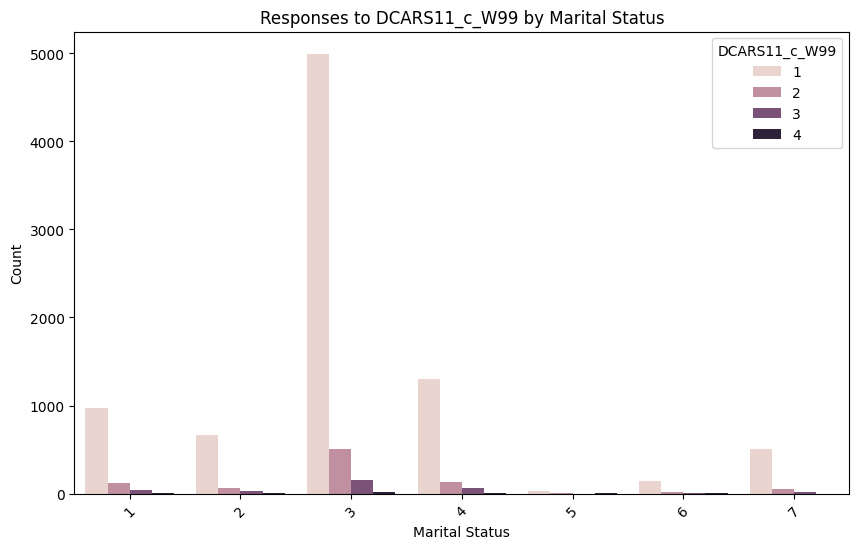

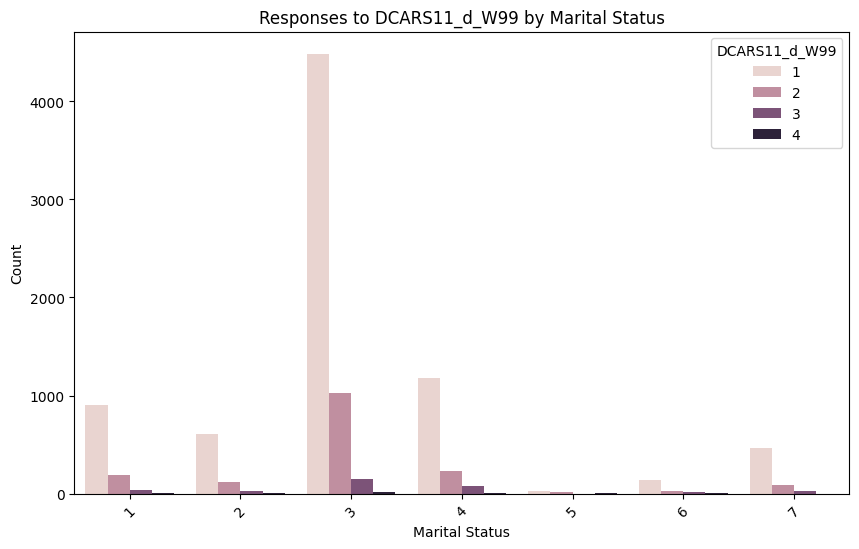

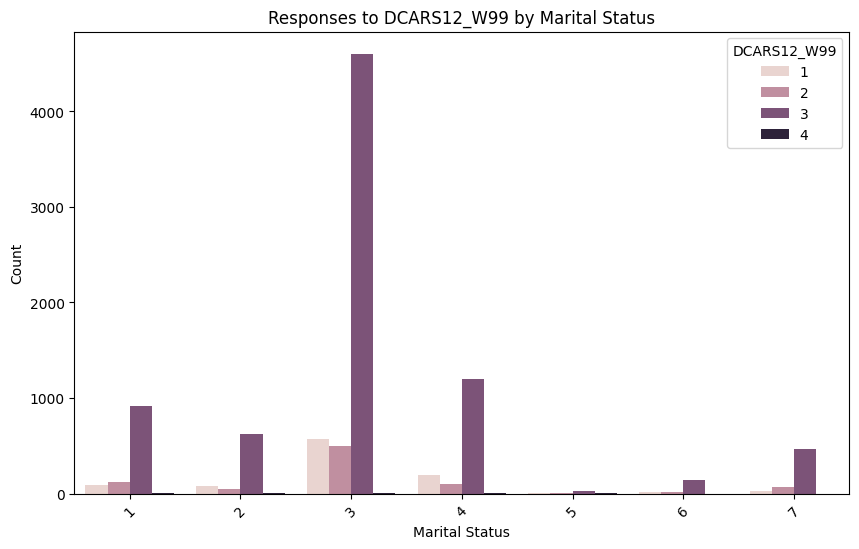

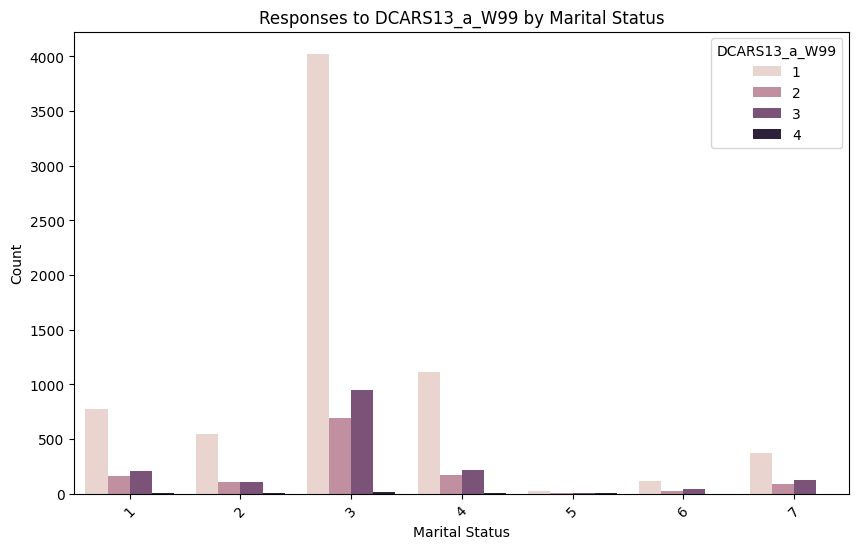

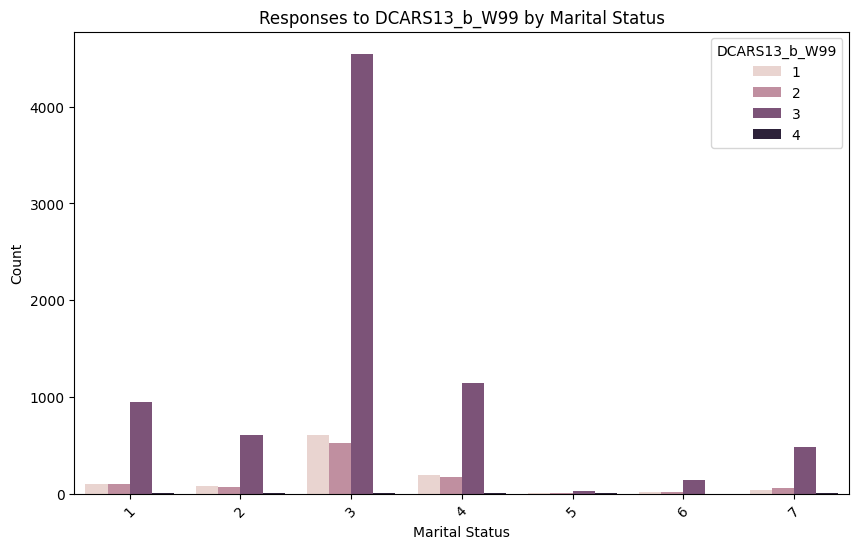

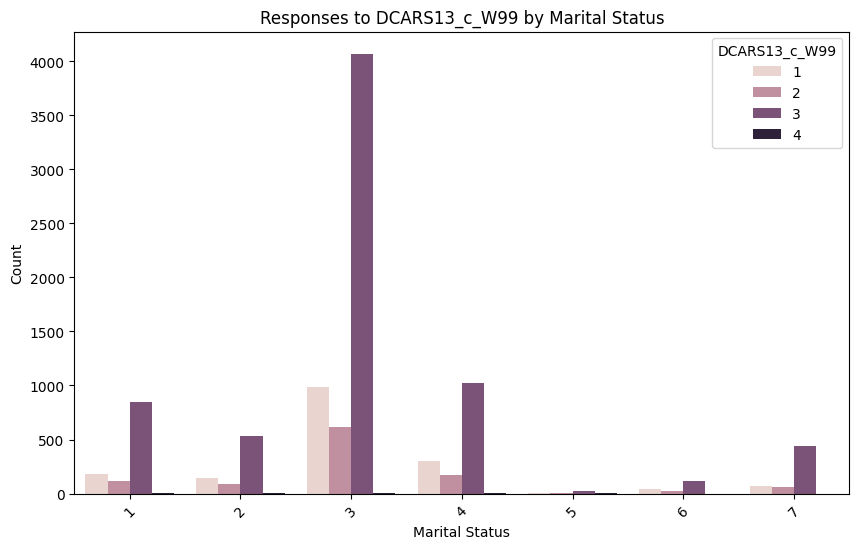

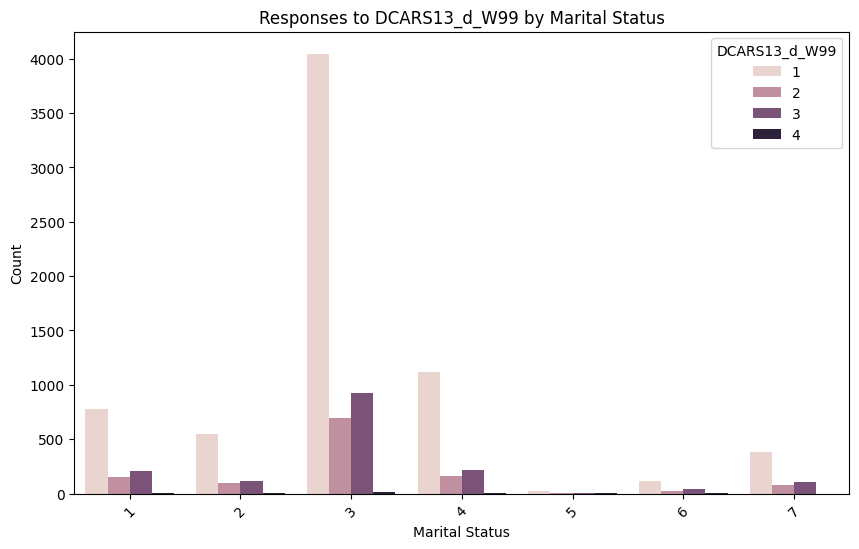

In [42]:
# List of columns to categorize
dcars_columns = [col for col in df_dropped.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_MARITAL', hue=col)
    plt.title(f'Responses to {col} by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


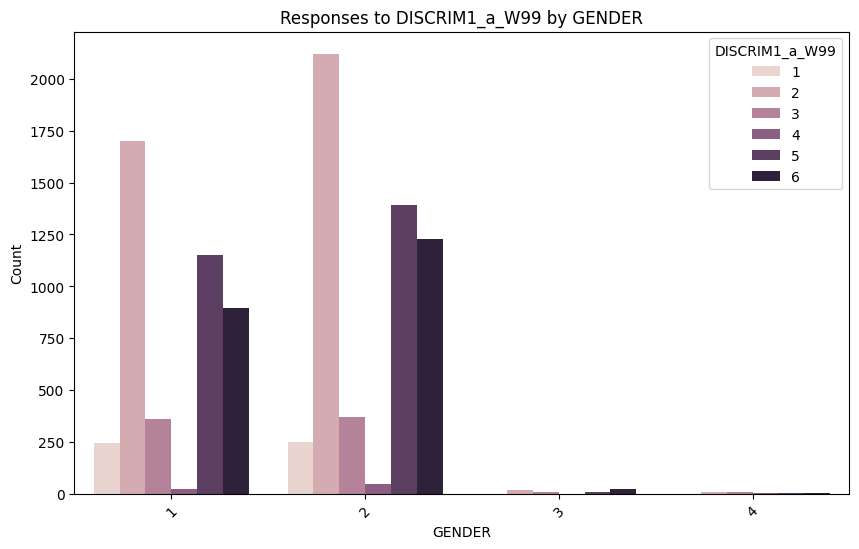

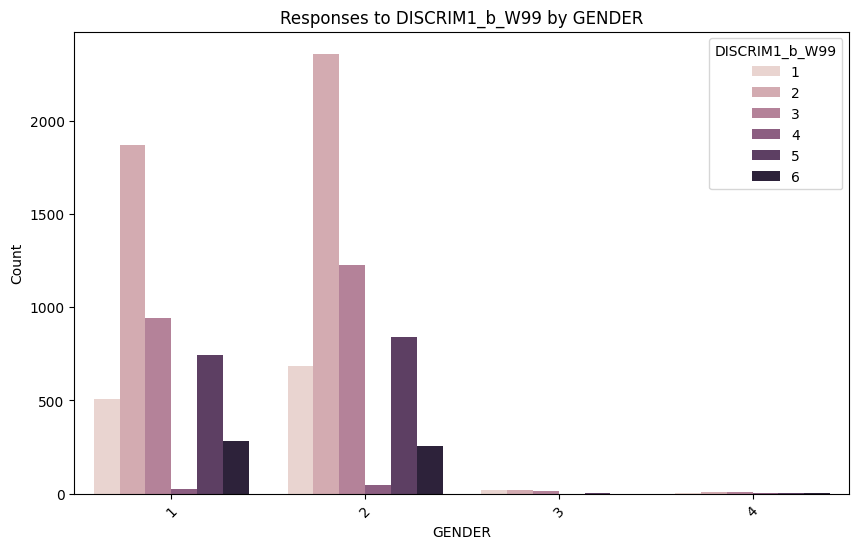

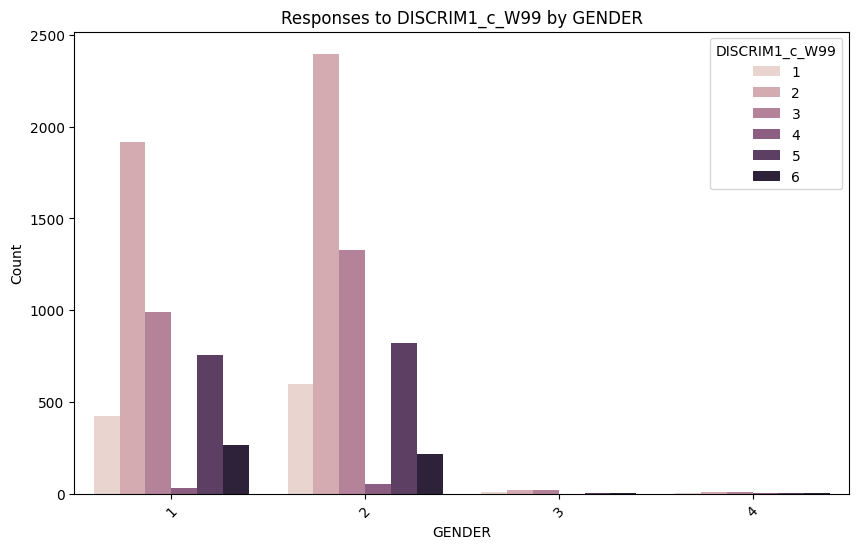

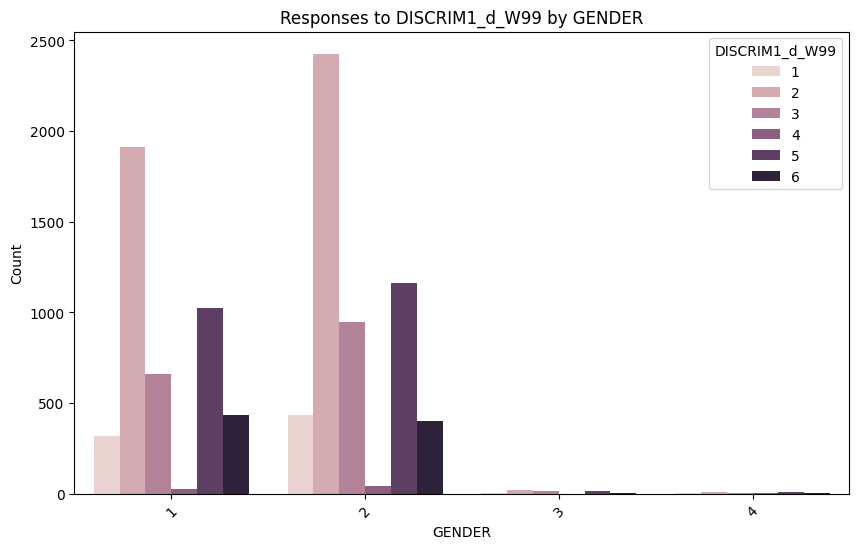

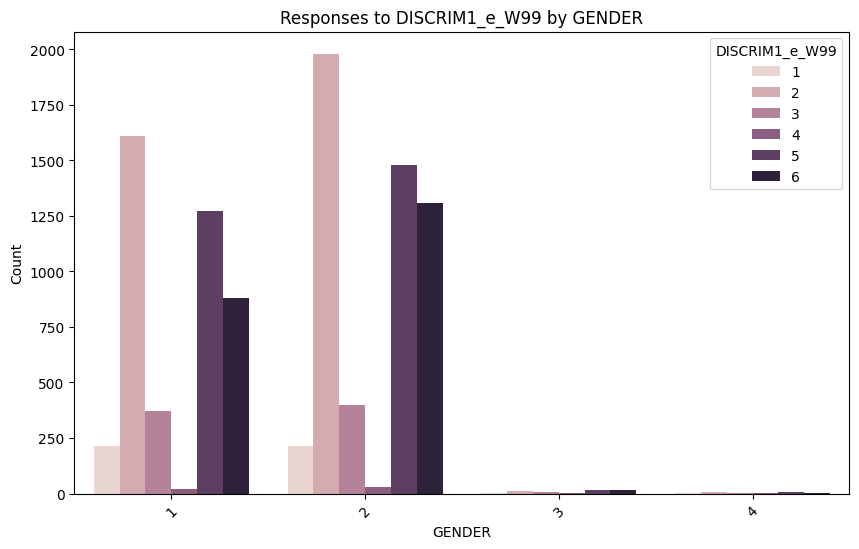

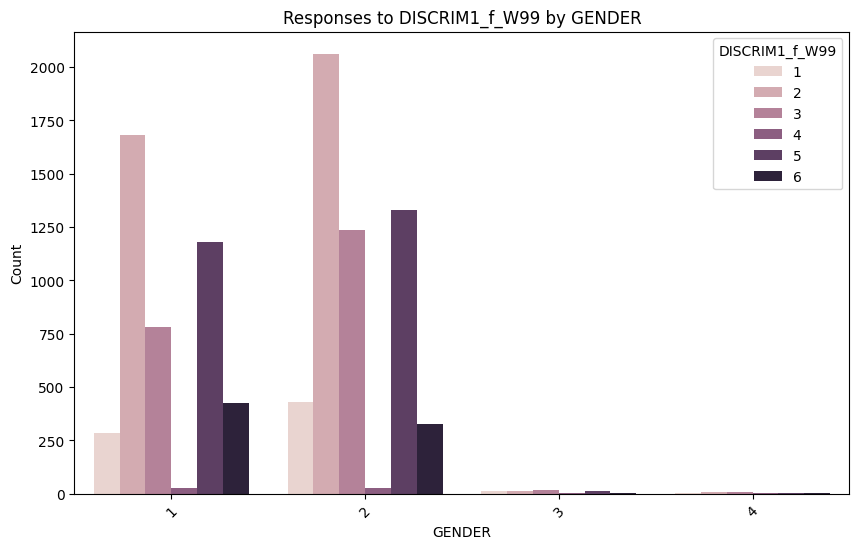

In [43]:
# List of columns to categorize
discrim_columns = [col for col in df_dropped.columns if col.startswith('DISCRIM')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in discrim_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_GENDER', hue=col)
    plt.title(f'Responses to {col} by GENDER')
    plt.xlabel('GENDER')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


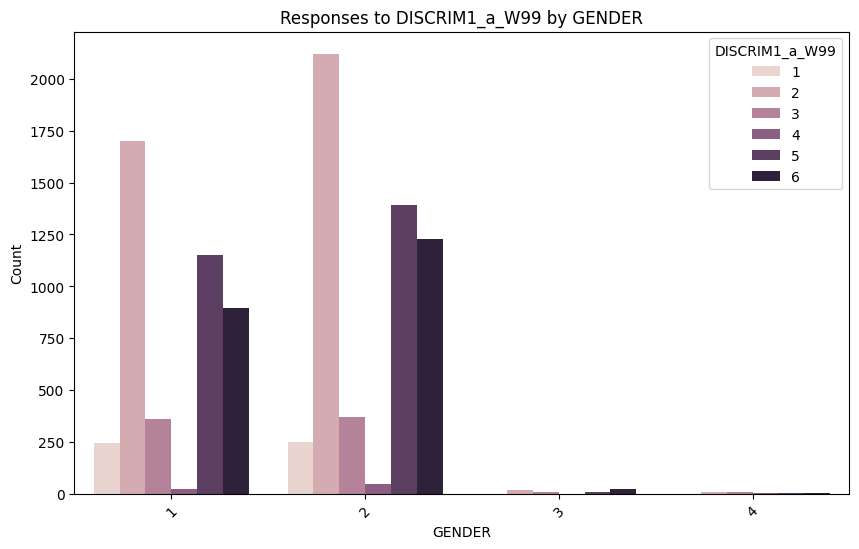

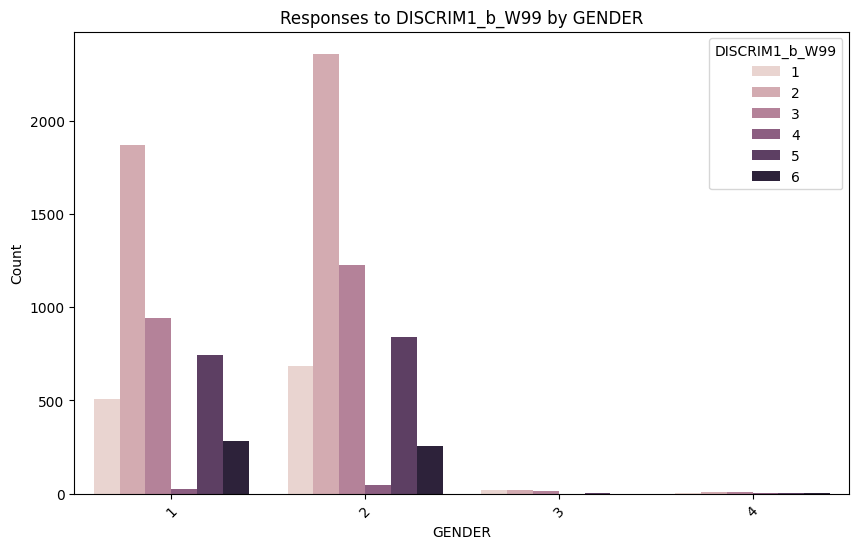

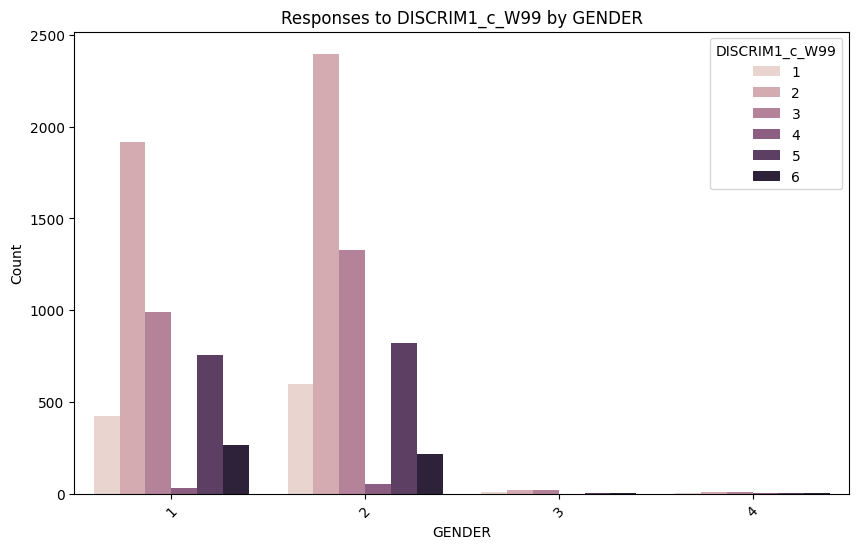

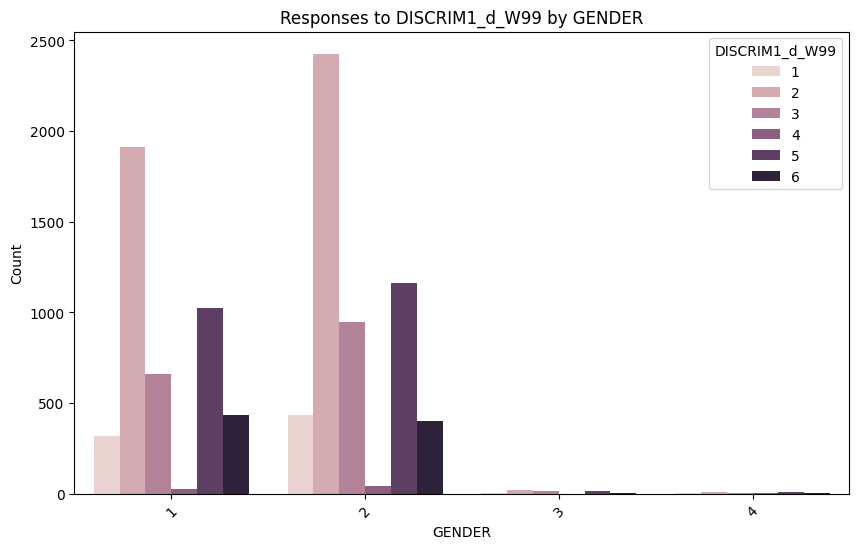

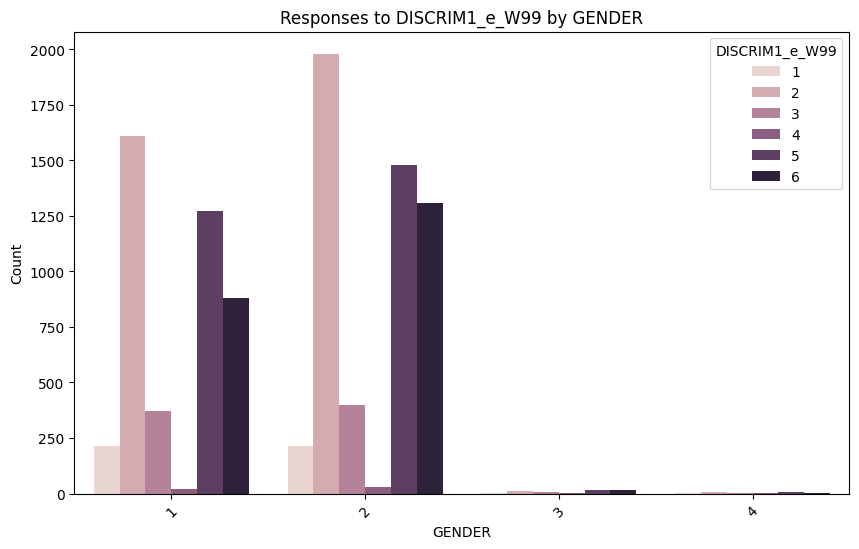

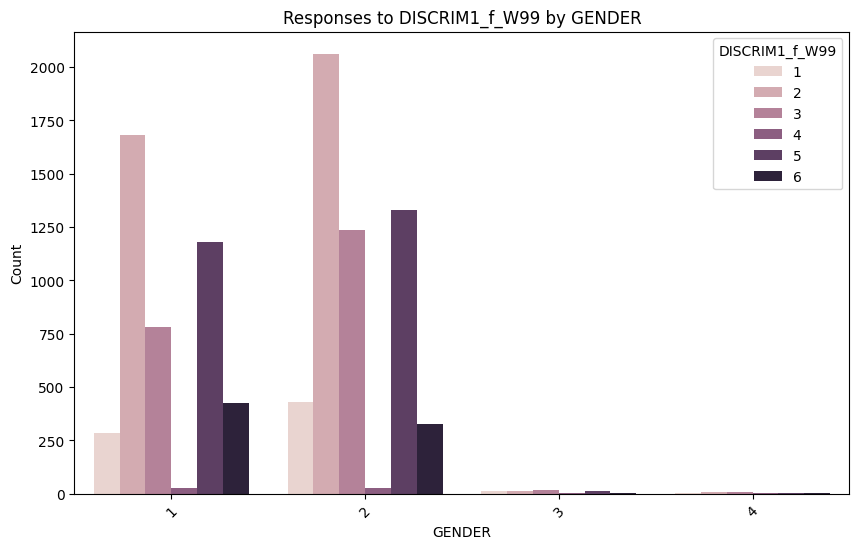

In [44]:
# List of columns to categorize
discrim_columns = [col for col in df_dropped.columns if col.startswith('DISCRIM')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in discrim_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_GENDER', hue=col)
    plt.title(f'Responses to {col} by GENDER')
    plt.xlabel('GENDER')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


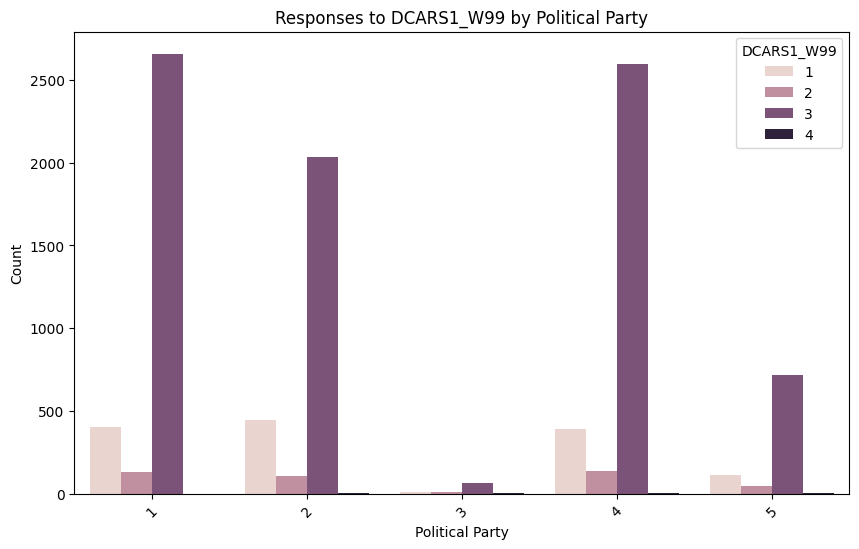

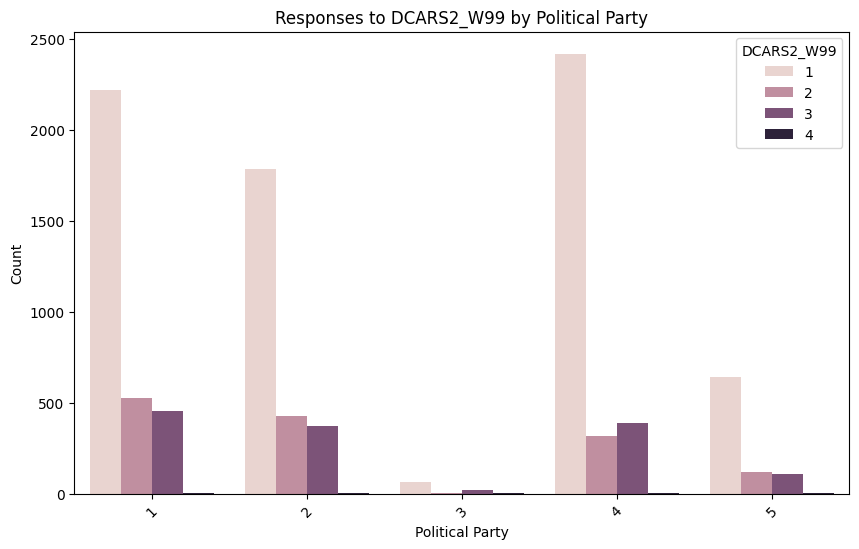

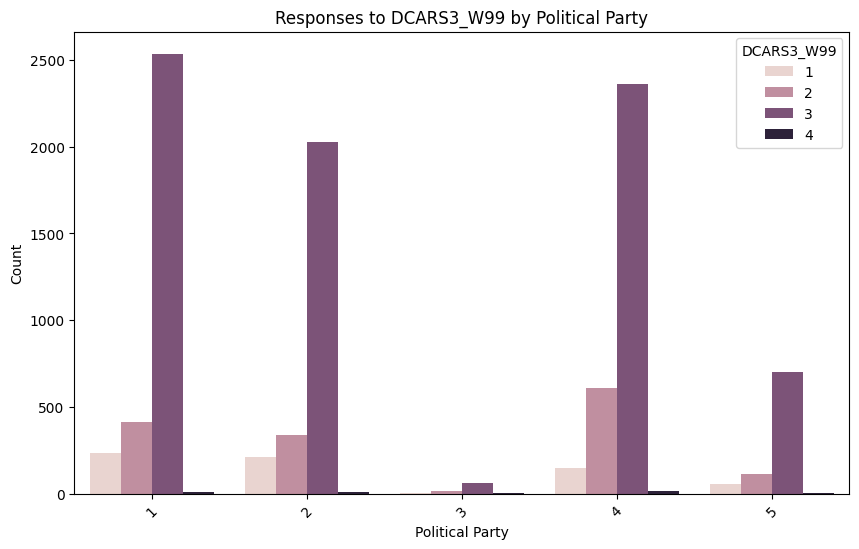

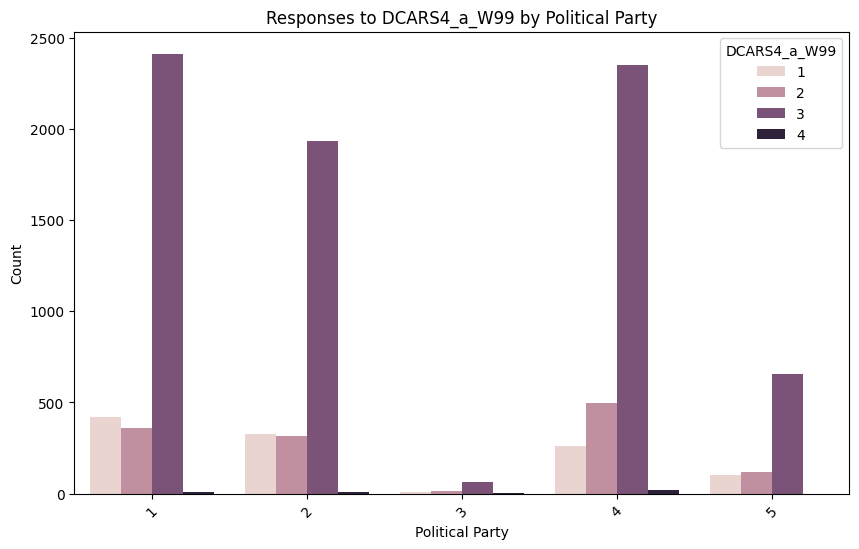

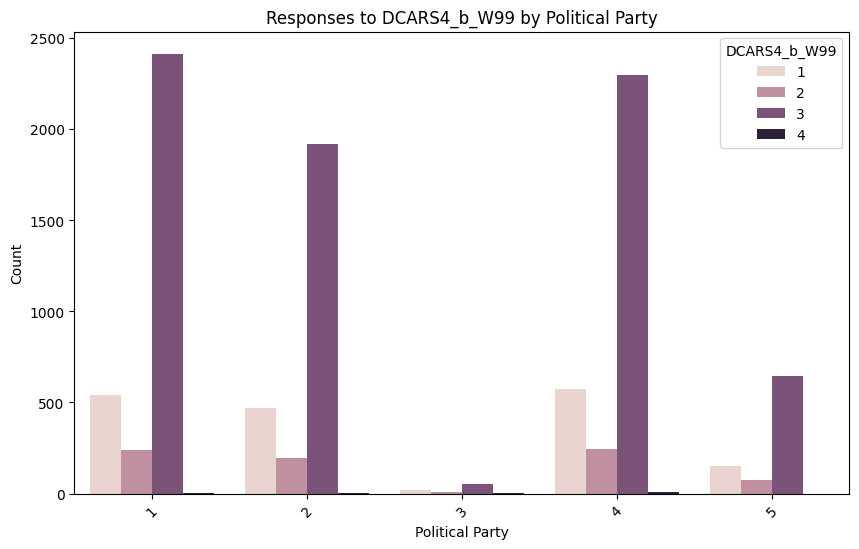

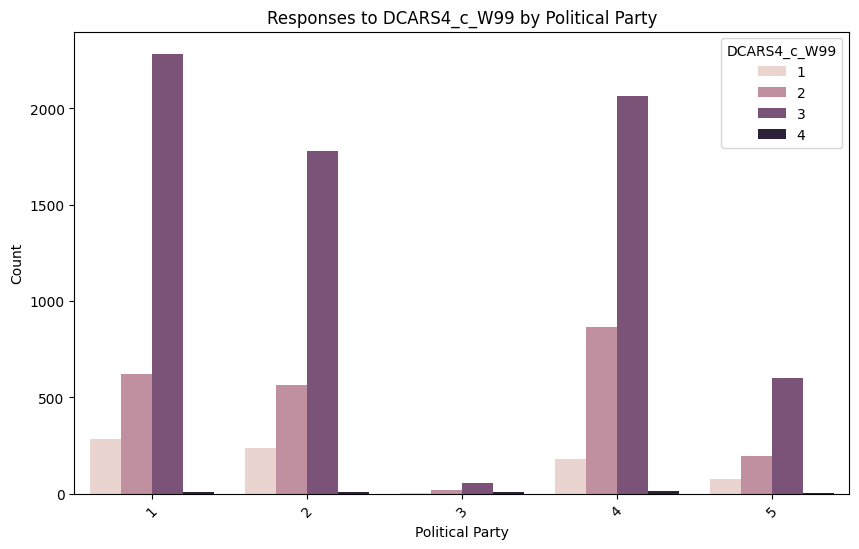

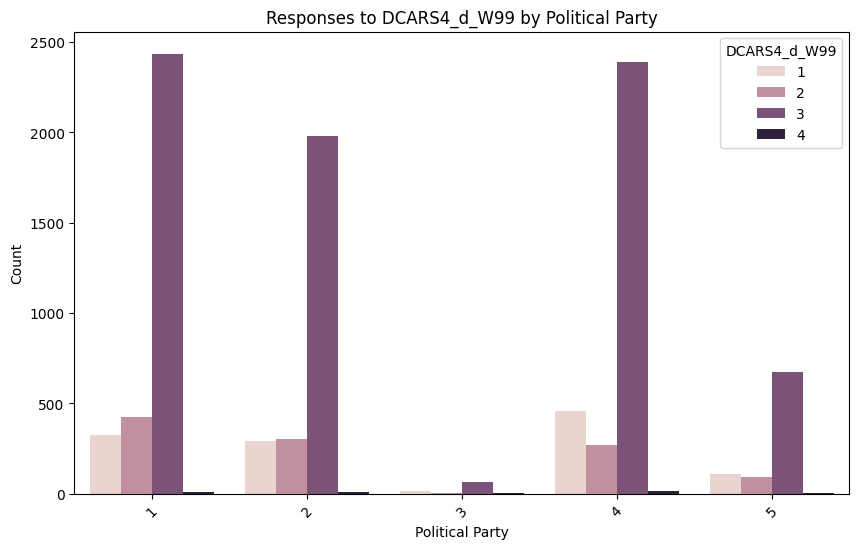

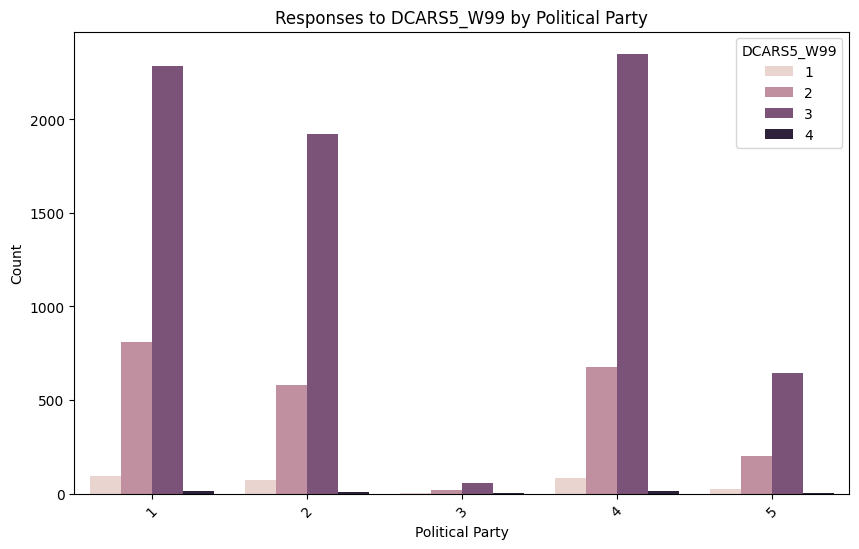

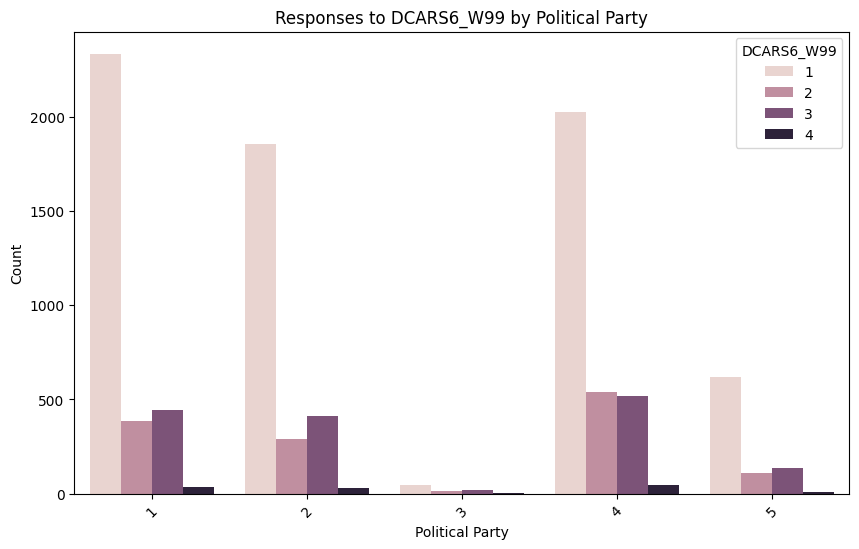

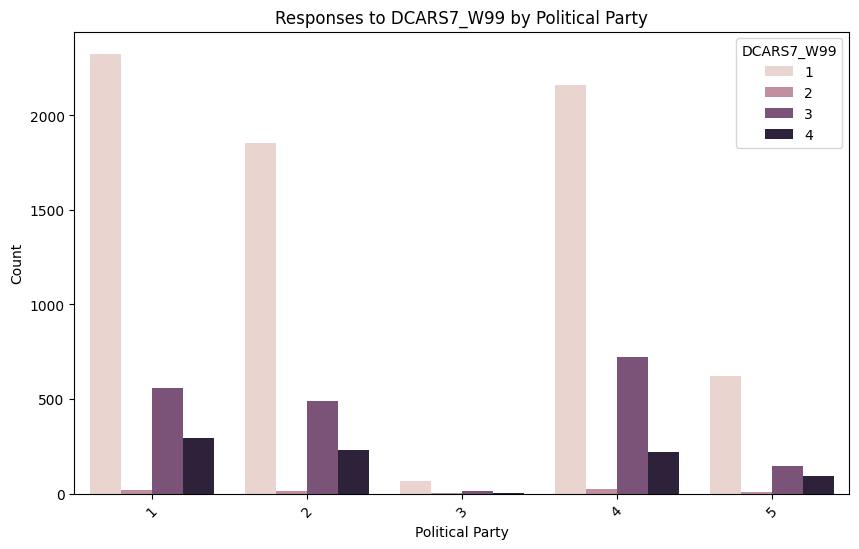

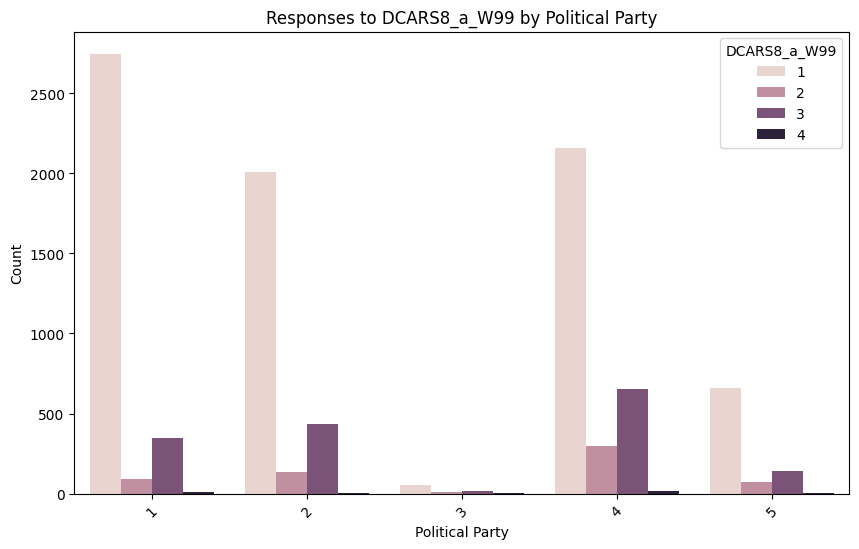

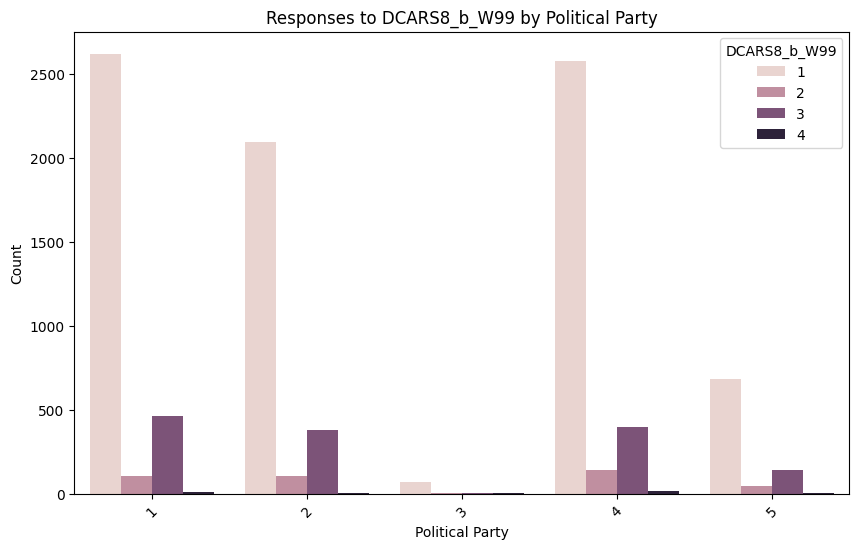

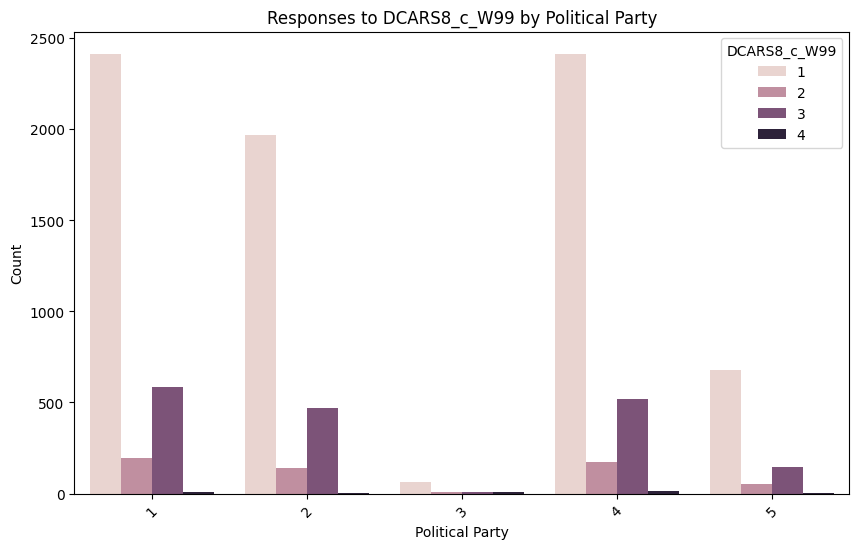

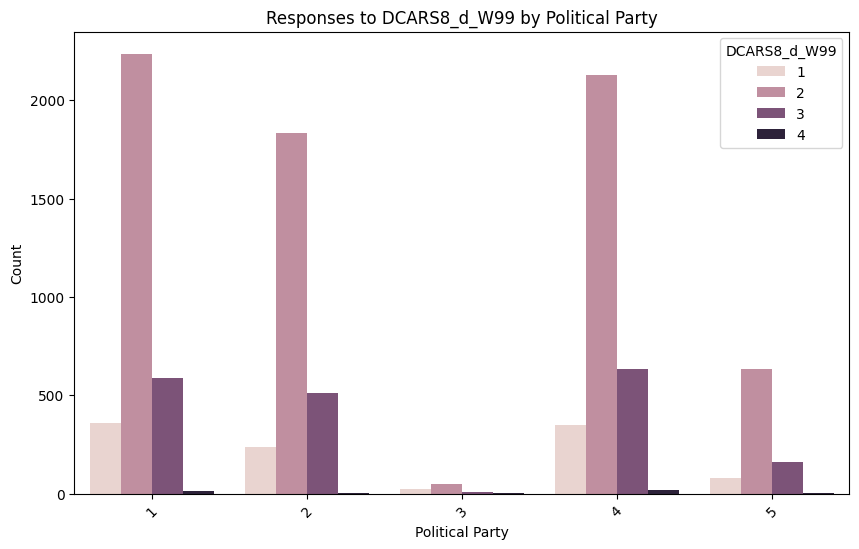

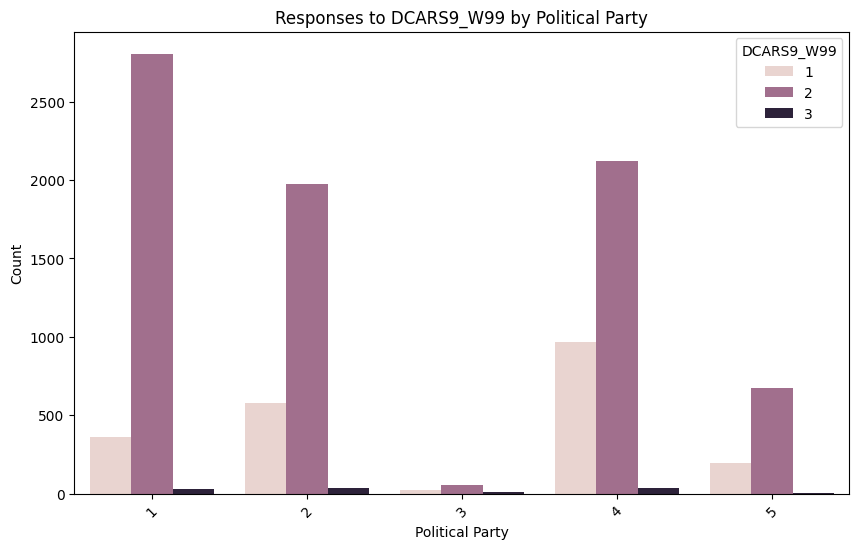

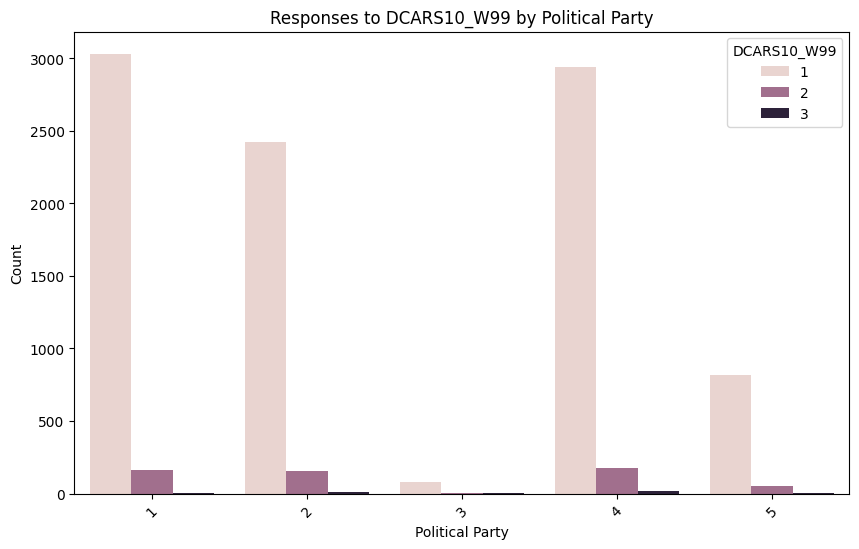

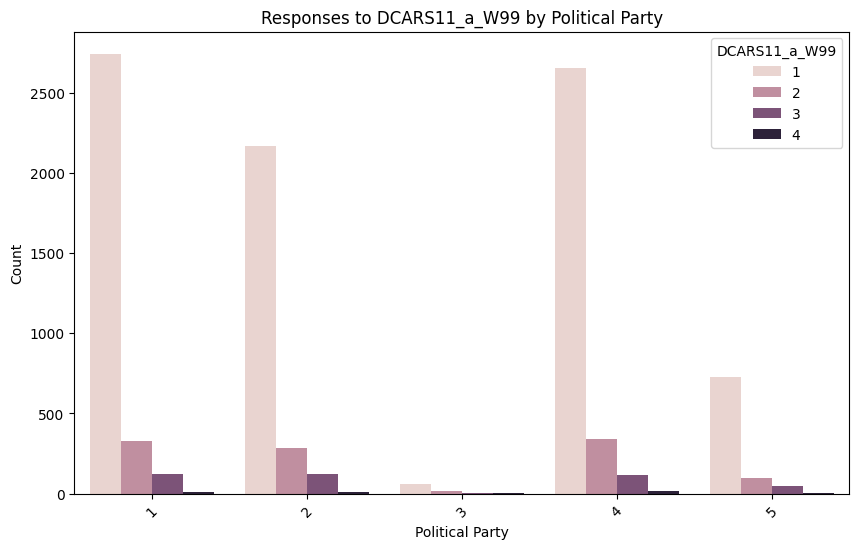

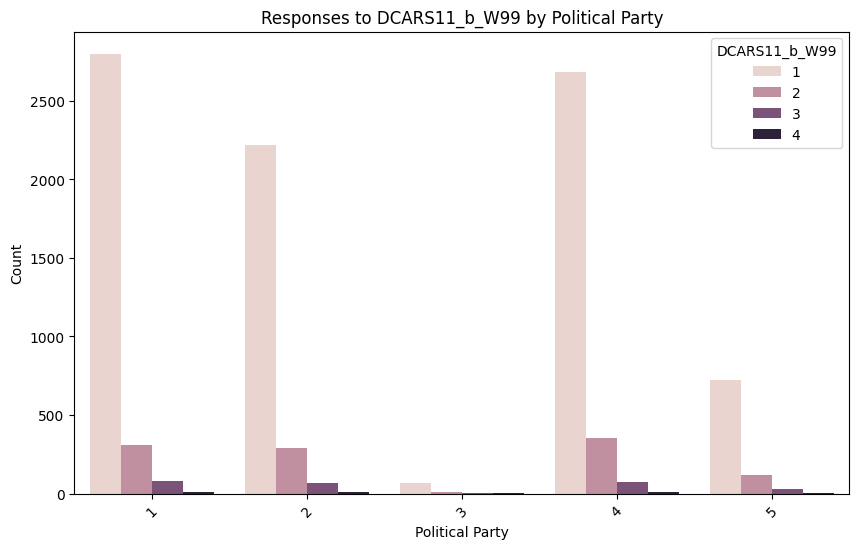

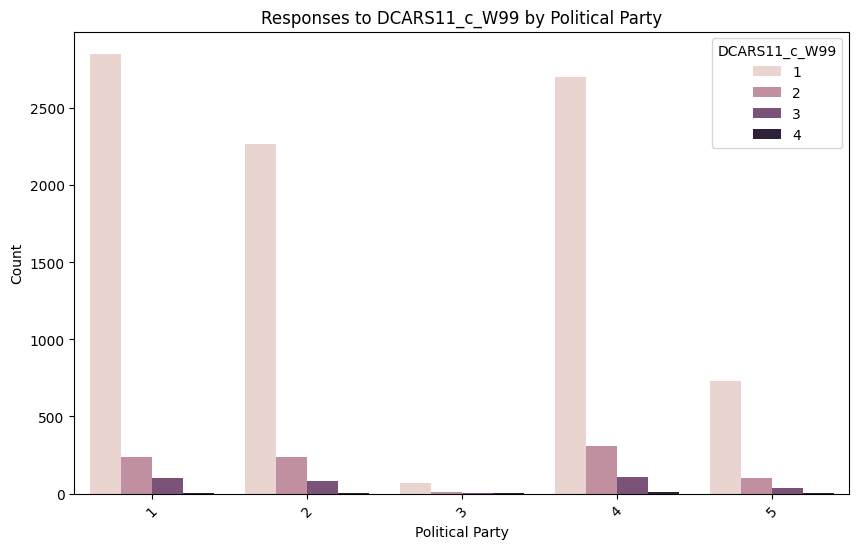

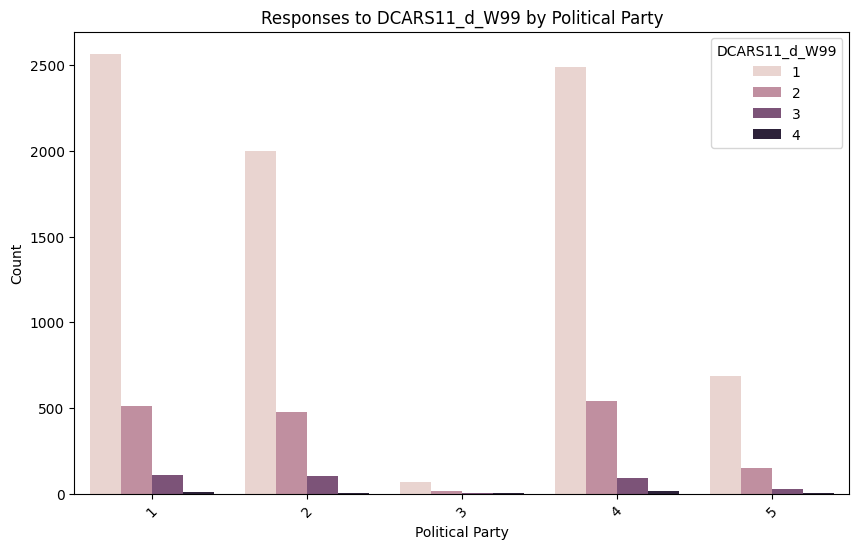

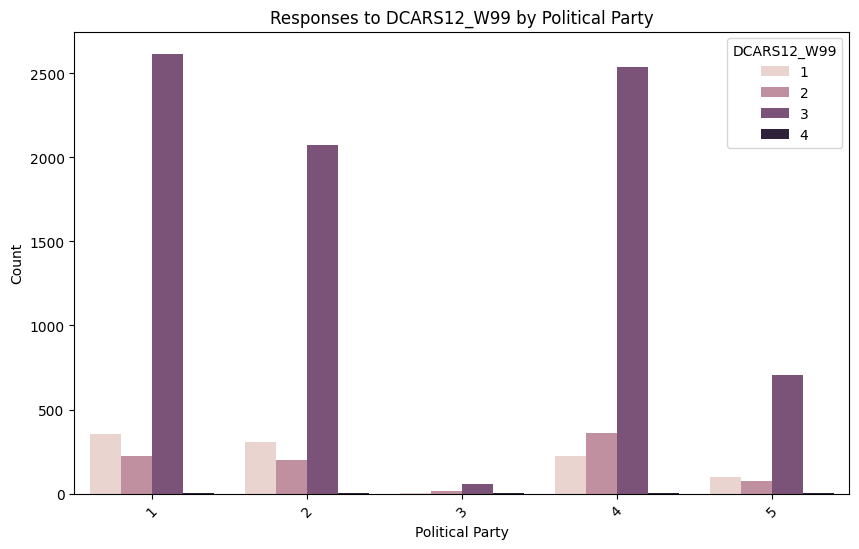

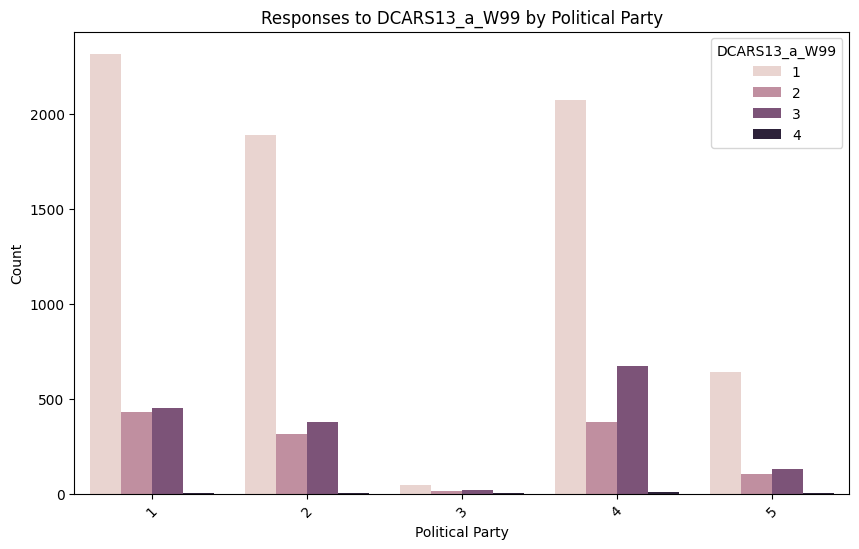

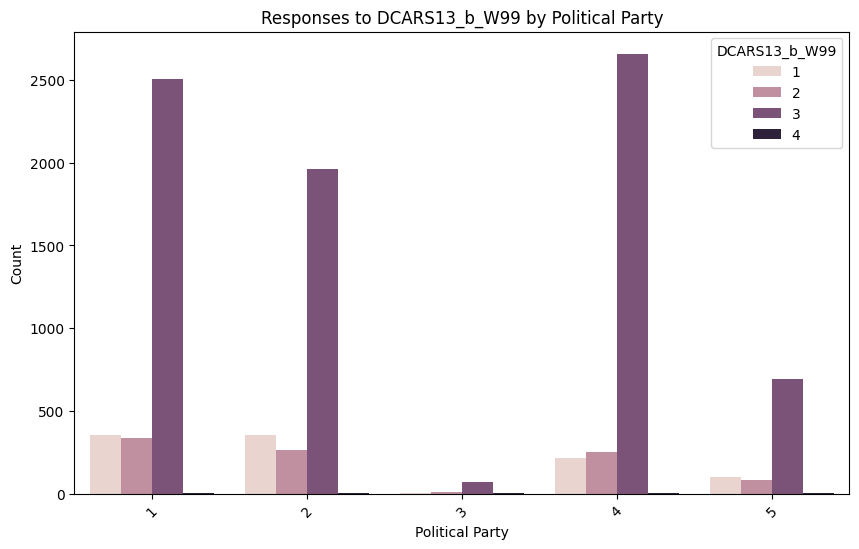

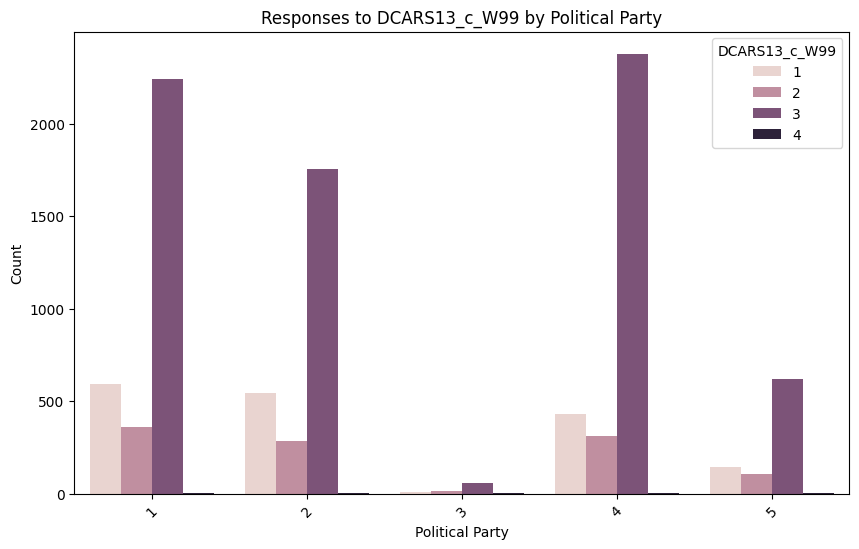

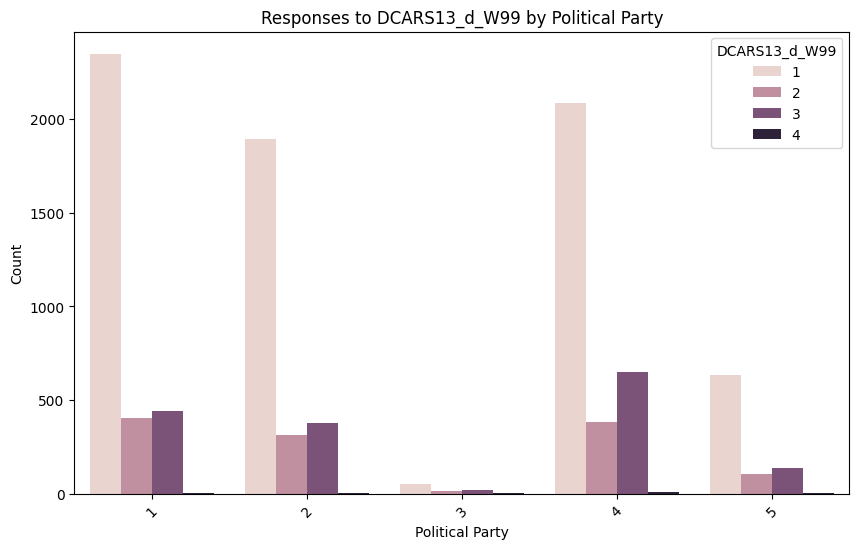

In [45]:

# List of columns to categorize
dcars_columns = [col for col in df_dropped.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_PARTY_FINAL', hue=col)
    plt.title(f'Responses to {col} by Political Party')
    plt.xlabel('Political Party')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles
